In [1]:
%load_ext autoreload
%autoreload 2
from labeling import dataload, show3D
from CO2_identify import *
from mynetwork import CO2mask
from torch.utils.data import DataLoader
from scipy.ndimage import gaussian_filter
from torchvision.transforms.functional import resize

import torchvision
import torch
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import pandas as pd
import json
from torchstat import stat

In [2]:
fn = '../define_path.txt'
with open(fn) as f:
    lines = f.readlines()
for idx, line in enumerate(lines):
    if idx == 1:
        dir_co2 = line.split('=')[1][:-1]
    if idx == 3:
        dir_grid = line.split('=')[1][:-1]
    if idx == 13:
        root = line.split('=')[1][:-1]

# NN for CO2 mask identification

## Load datasets

In [3]:
# dataset information file names
pmf = 'pm_info.json'
pdf = 'patch_info'
pdfap = '.csv'

In [4]:
# load training dataset
train = dataset_patch(root,pmf,f'{pdf}_train{pdfap}')
Ntrain = len(train)
print(f'Training dataset size: {Ntrain}')

Training dataset size: 1500


In [5]:
# load validating dataset
valid = dataset_patch(root,pmf,f'{pdf}_valid{pdfap}')
Nvalid = len(valid)
print(f'Validating dataset size: {Nvalid}')

Validating dataset size: 772


In [6]:
# network path
path_net = f'../resources/NNpred2D/co2_identify.pt'
path_bestnet = f'../resources/NNpred2D/co2_identify_best.pt'

## Display sampled patches in training and validating dataset

In [7]:
# define the sampled patches in training dataset for display
ndis_tr = 5
train_id_list = np.random.choice(len(train),size=ndis_tr,replace=False)
#train_id_list = np.linspace(0,Ntrain,ndis_tr+2,dtype=np.int16)[1:-1]
pst = patch_show(train,train_id_list)
print(f'train_id_list: {train_id_list}')
# define the sampled patches in valid dataset for display
ndis_va = 3
valid_id_list = np.random.choice(len(valid),size=ndis_va,replace=False)
#valid_id_list = np.linspace(0,Nvalid,ndis_va+2,dtype=np.int16)[1:-1]
psv = patch_show(valid,valid_id_list)
print(f'valid_id_list: {valid_id_list}')
# data patch resize shape
rs = valid.nsz
# sampling rate of epoch for display
epoch_itv = 20
# sampling rate of batch number for display
batch_itv = 10

train_id_list: [ 238  897 1201   52 1362]
valid_id_list: [561 137 499]


<Figure size 640x480 with 0 Axes>

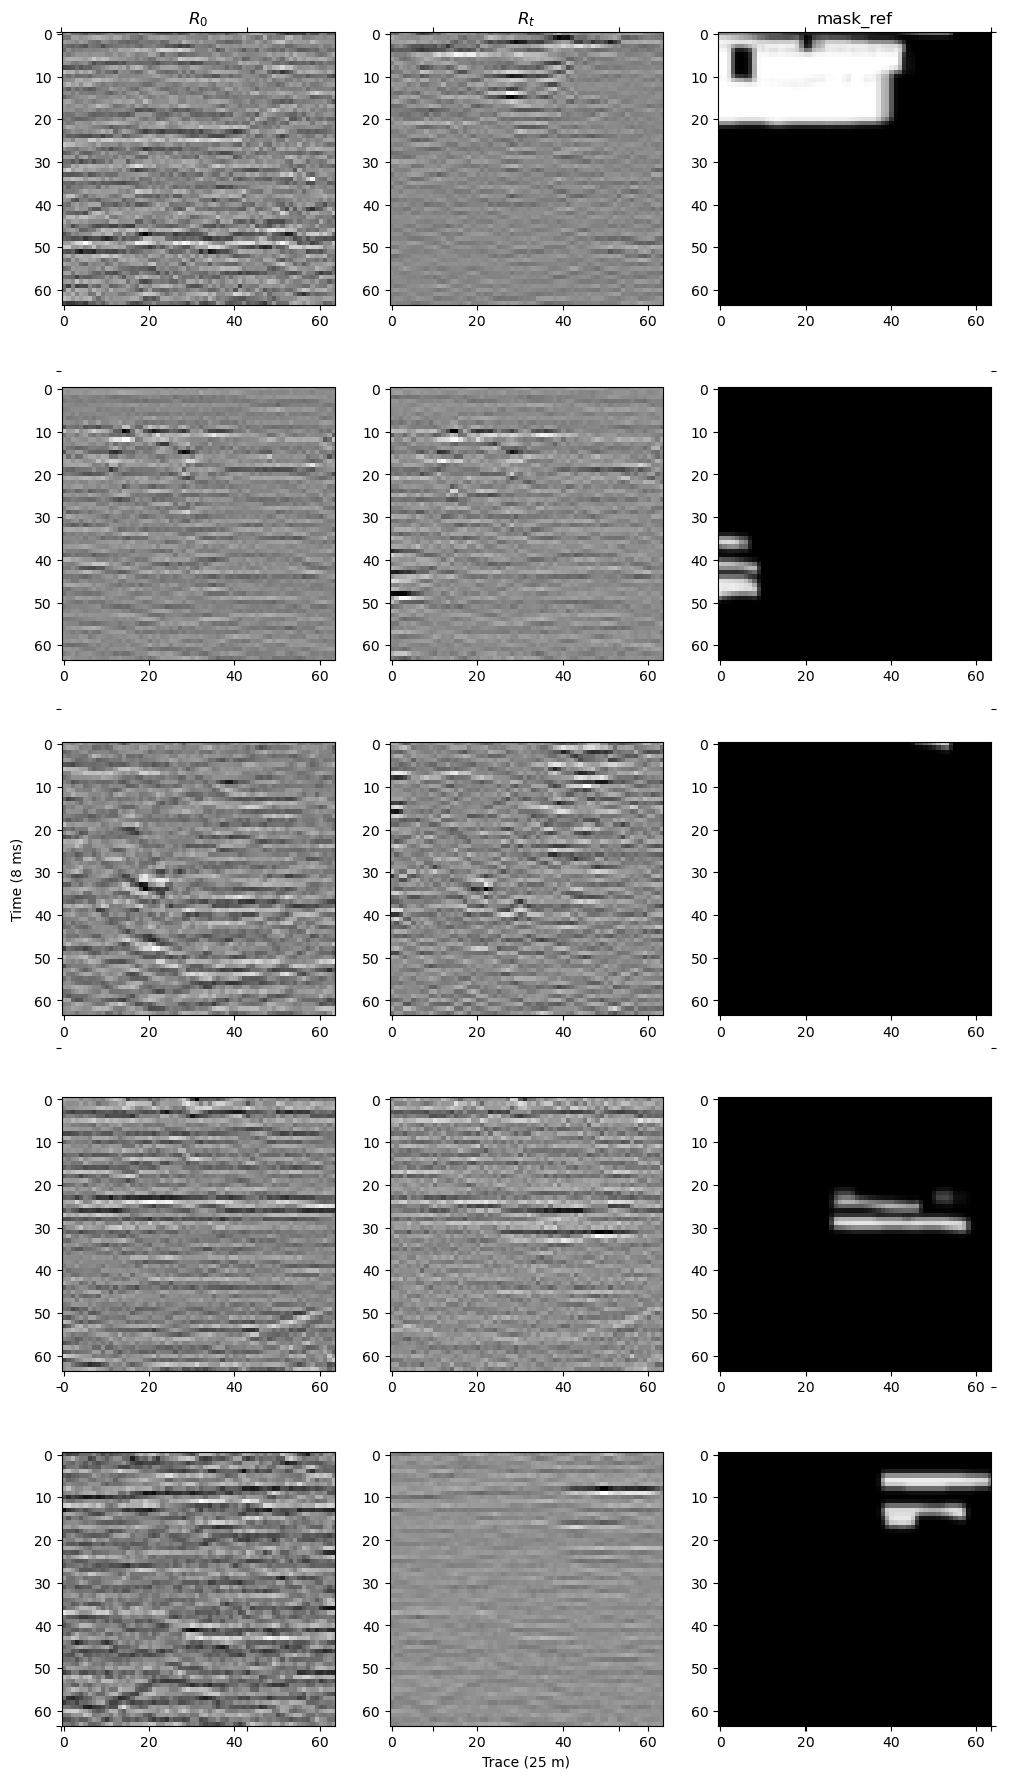

In [8]:
pst.view2d()

<Figure size 640x480 with 0 Axes>

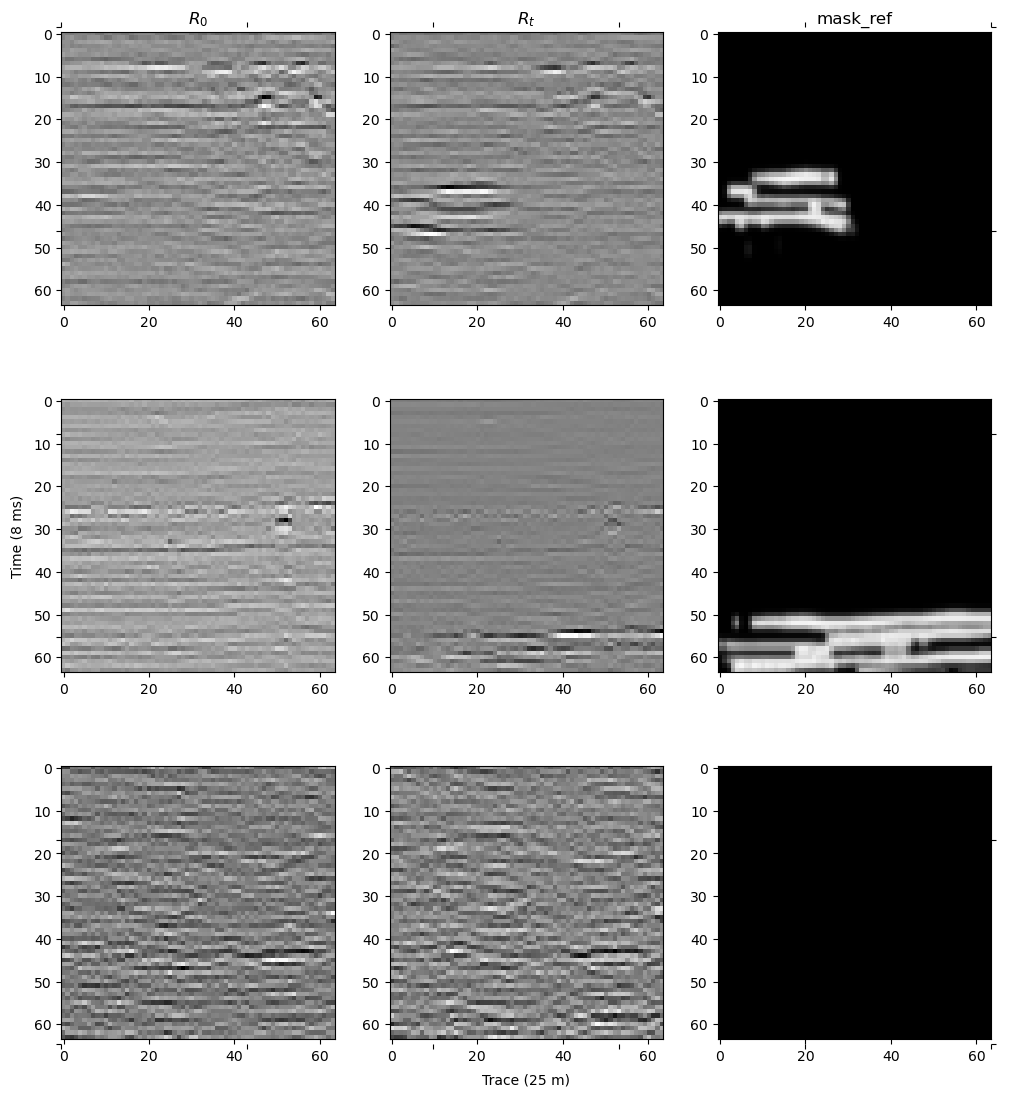

In [9]:
psv.view2d()

## Training and validating

### Define training parameters

In [10]:
params = OrderedDict(
    lr = [.0002]
    ,batch_size = [30]
    ,shuffle = [True]
    ,epoch_num = [200]
    ,adadelta_num = [0]
)
cuda_gpu = True
gpus = [0]

In [11]:
# initilize run
M = RunManager(cuda_gpu)

In [12]:
# define sampler for loading valid_set
#valid_sampler = SubsetSampler(valid_id_list)
cpu_device = torch.device('cpu')

### Start training and validation

In [13]:
ts = time.time()

Epoch No.: 0
Batch No. 0--------------------
Batch No. 10--------------------
Batch No. 20--------------------
Batch No. 30--------------------
Batch No. 40--------------------
Mean training loss for epoch No. 0: 0.5027695238590241
Training patch samples display at epoch No. 0


<Figure size 640x480 with 0 Axes>

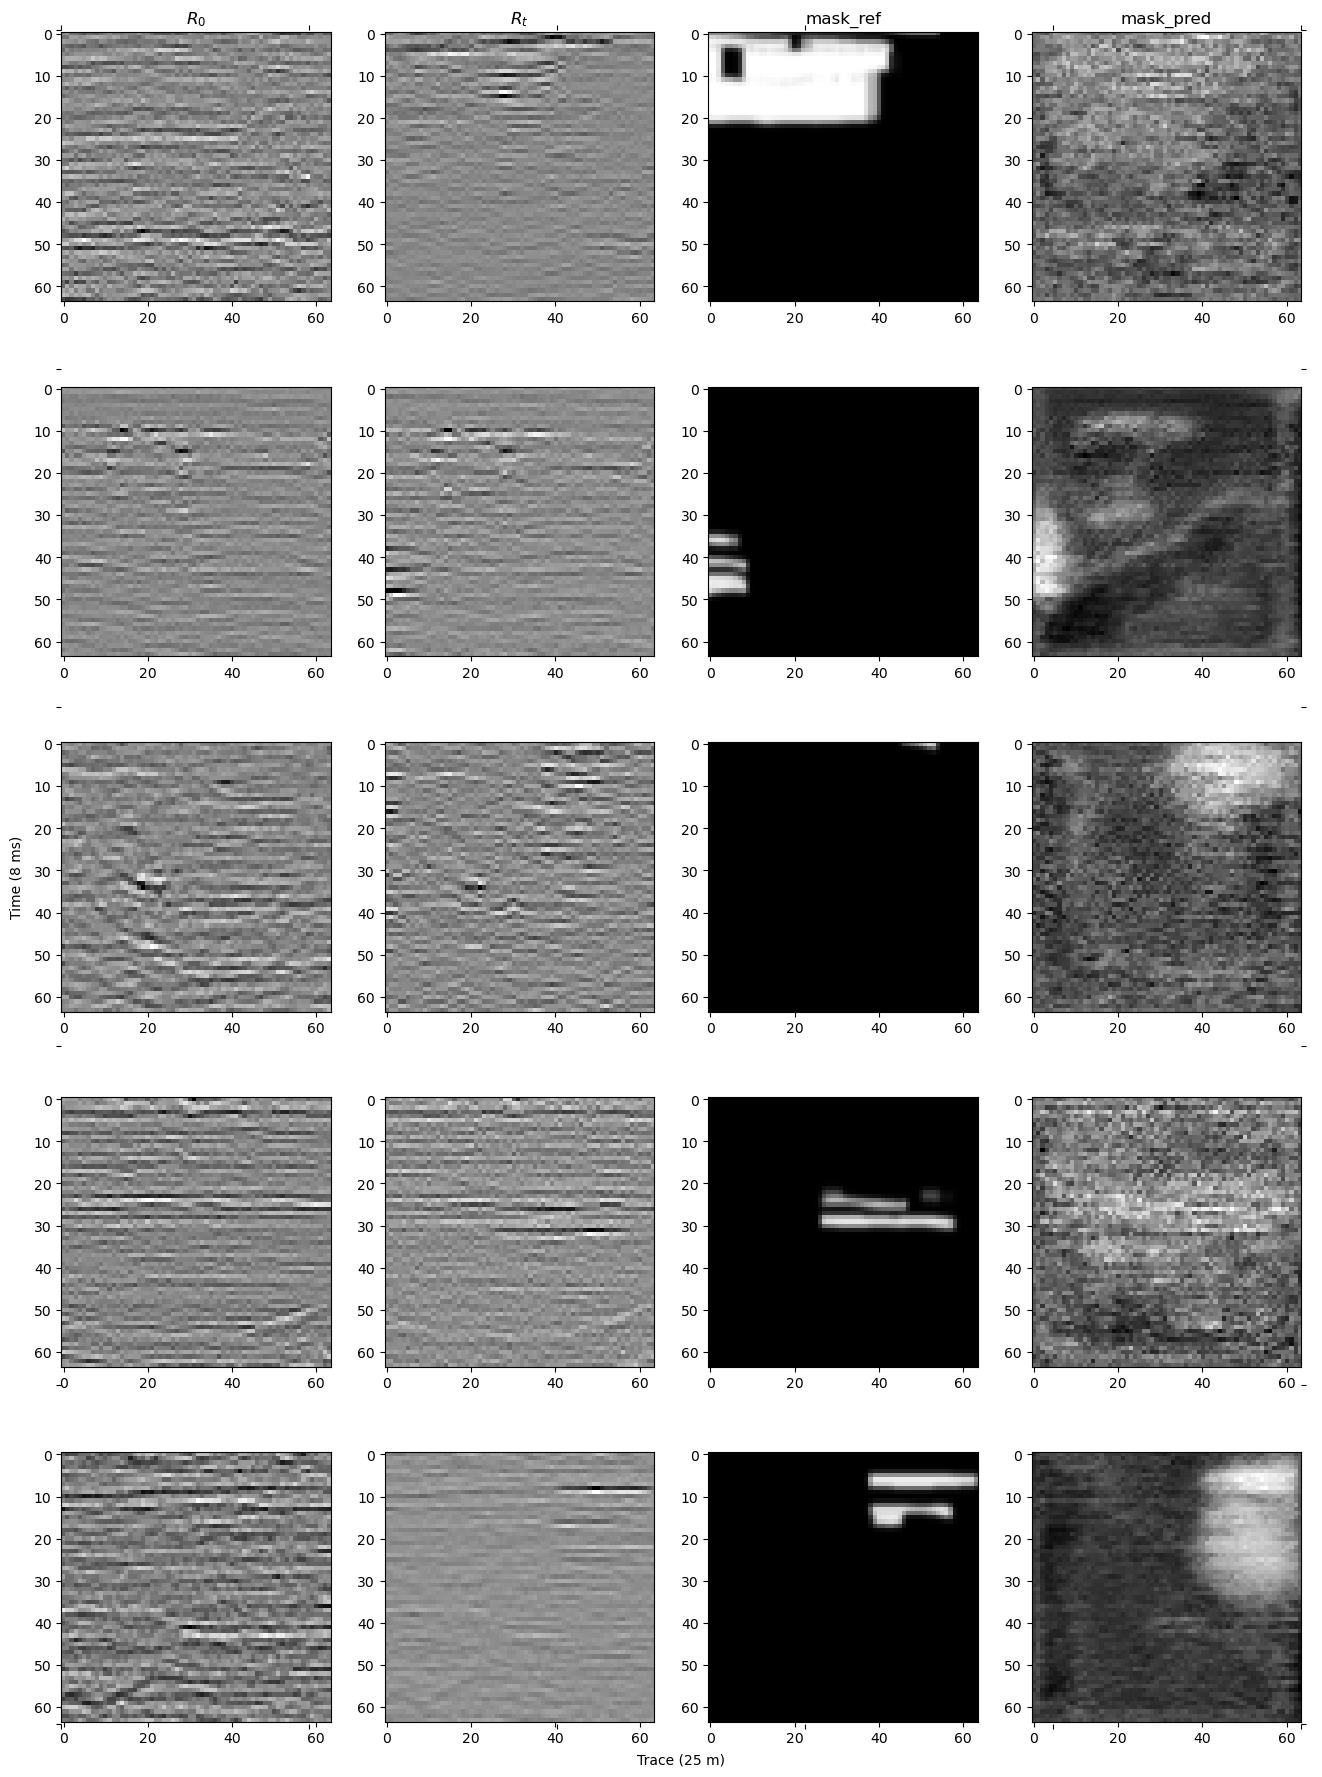

Start validating for epoch No. 0
Mean validating loss for epoch No. 0: 0.44563525915145874
Validating patch samples display at epoch No. 0


<Figure size 640x480 with 0 Axes>

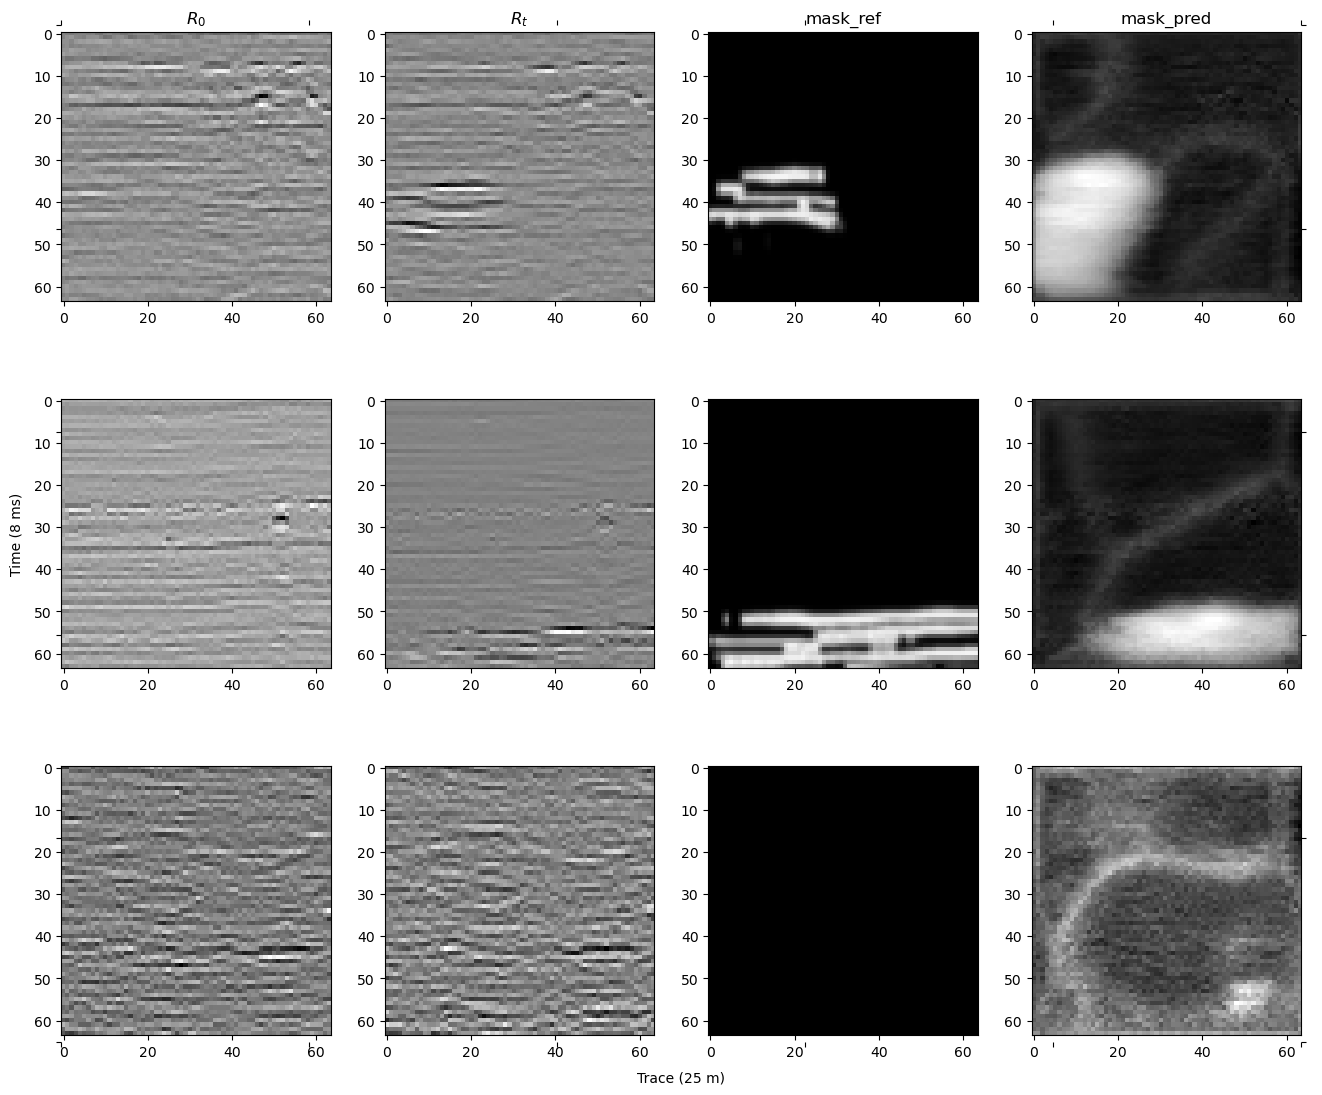

Epoch No.: 1
Batch No. 0--------------------
Batch No. 10--------------------
Batch No. 20--------------------
Batch No. 30--------------------
Batch No. 40--------------------
Mean training loss for epoch No. 1: 0.15307797998189926
Start validating for epoch No. 1
Mean validating loss for epoch No. 1: 0.10947851091623306
Epoch No.: 2
Batch No. 0--------------------
Batch No. 10--------------------
Batch No. 20--------------------
Batch No. 30--------------------
Batch No. 40--------------------
Mean training loss for epoch No. 2: 0.08650610074400902
Start validating for epoch No. 2
Mean validating loss for epoch No. 2: 0.09529593586921692
Epoch No.: 3
Batch No. 0--------------------
Batch No. 10--------------------
Batch No. 20--------------------
Batch No. 30--------------------
Batch No. 40--------------------
Mean training loss for epoch No. 3: 0.07757362626492977
Start validating for epoch No. 3
Mean validating loss for epoch No. 3: 0.09238212555646896
Epoch No.: 4
Batch No. 0----

<Figure size 640x480 with 0 Axes>

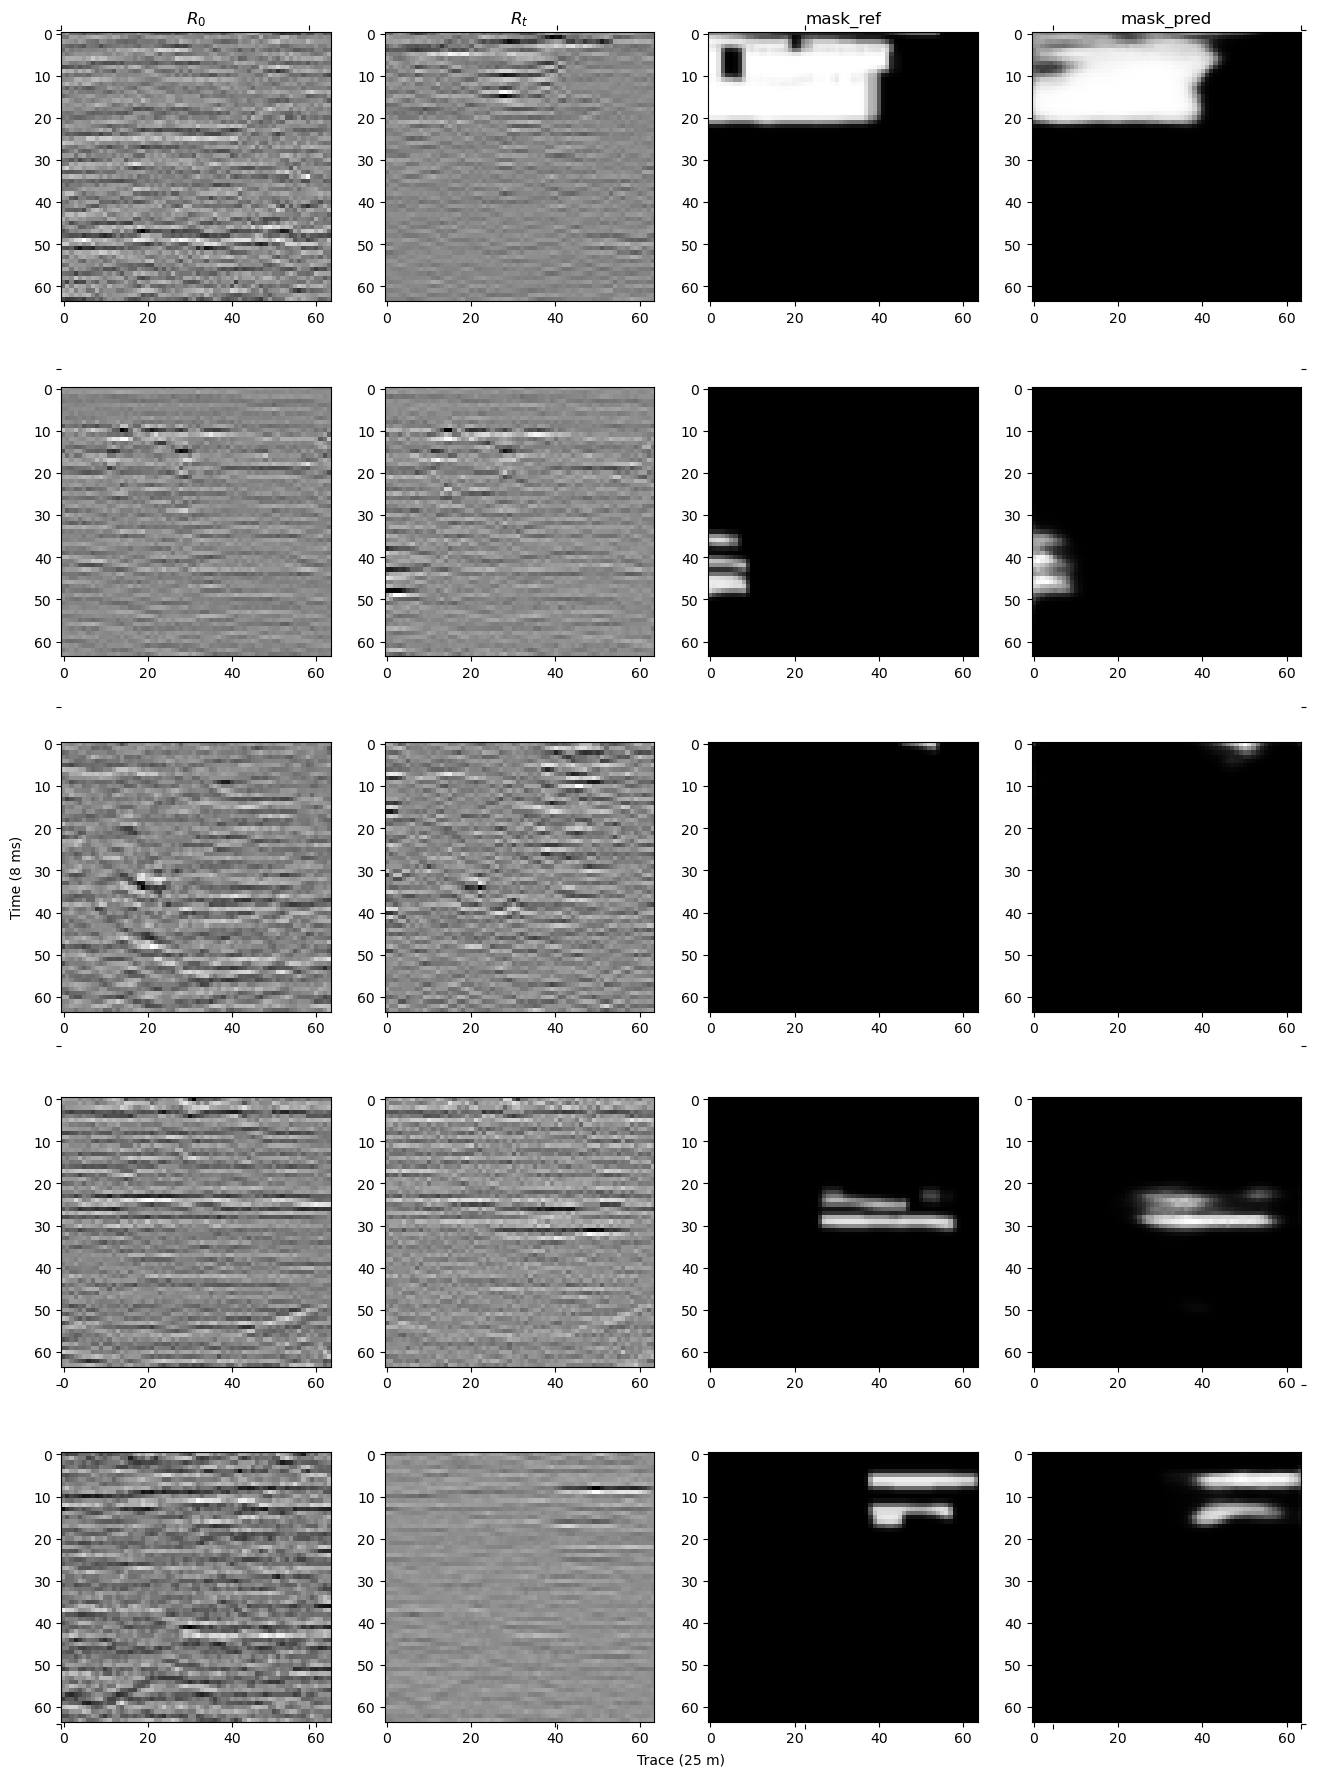

Start validating for epoch No. 20
Mean validating loss for epoch No. 20: 0.06156843155622482
Validating patch samples display at epoch No. 20


<Figure size 640x480 with 0 Axes>

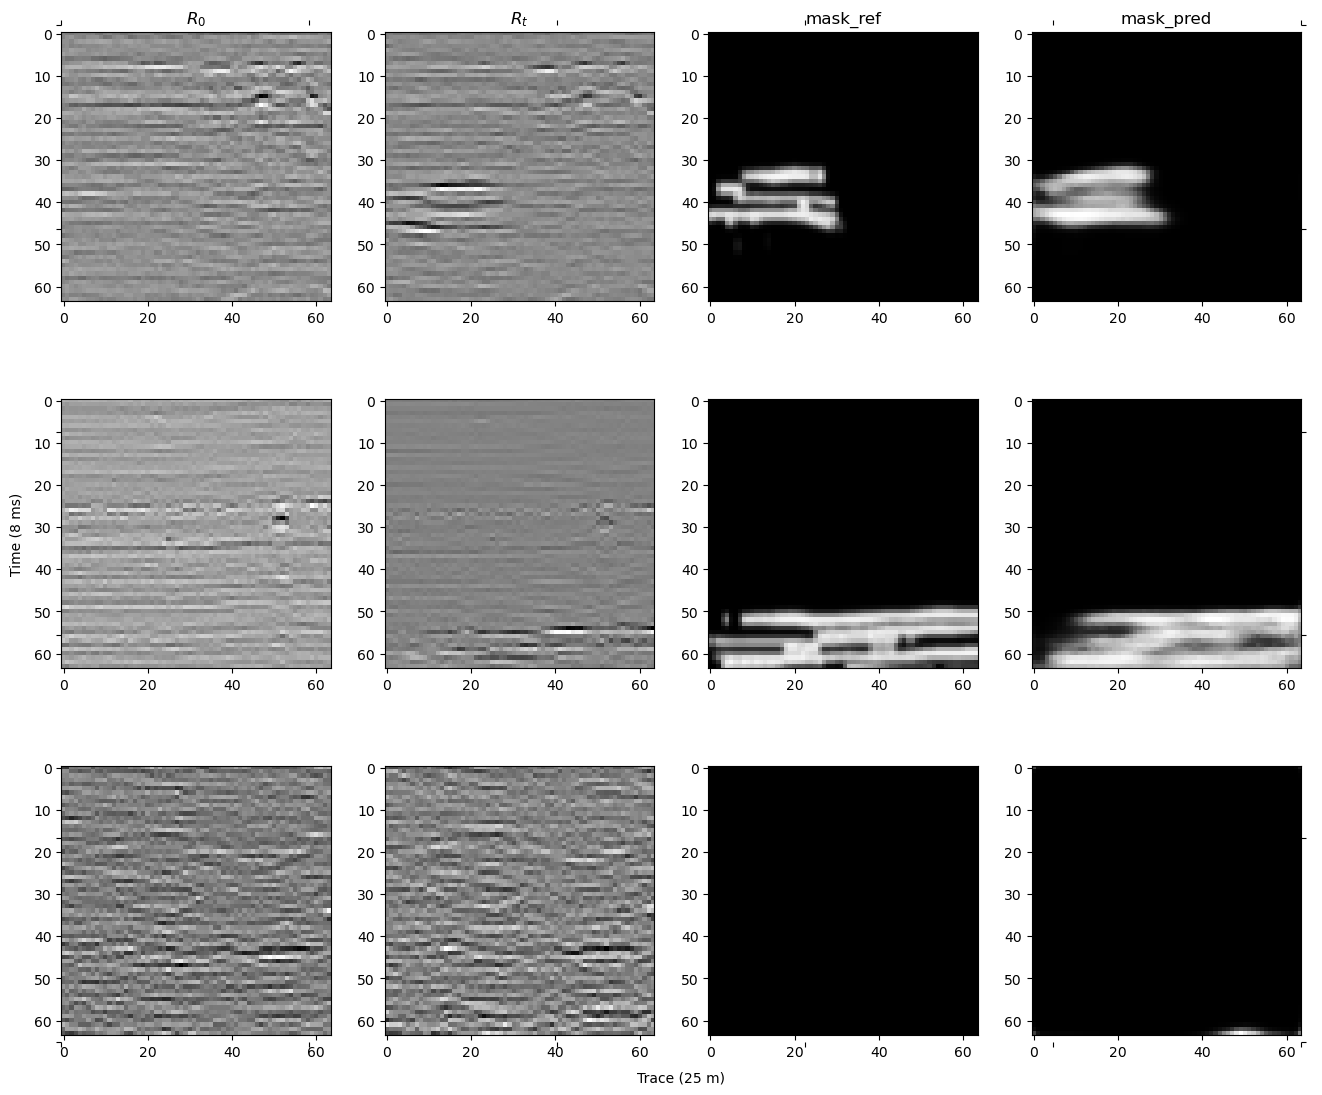

Epoch No.: 21
Batch No. 0--------------------
Batch No. 10--------------------
Batch No. 20--------------------
Batch No. 30--------------------
Batch No. 40--------------------
Mean training loss for epoch No. 21: 0.038334578946232795
Start validating for epoch No. 21
Mean validating loss for epoch No. 21: 0.06090768799185753
Epoch No.: 22
Batch No. 0--------------------
Batch No. 10--------------------
Batch No. 20--------------------
Batch No. 30--------------------
Batch No. 40--------------------
Mean training loss for epoch No. 22: 0.03797807246446609
Start validating for epoch No. 22
Mean validating loss for epoch No. 22: 0.06145406514406204
Epoch No.: 23
Batch No. 0--------------------
Batch No. 10--------------------
Batch No. 20--------------------
Batch No. 30--------------------
Batch No. 40--------------------
Mean training loss for epoch No. 23: 0.03795398898422718
Start validating for epoch No. 23
Mean validating loss for epoch No. 23: 0.06098313629627228
Epoch No.: 24
B

<Figure size 640x480 with 0 Axes>

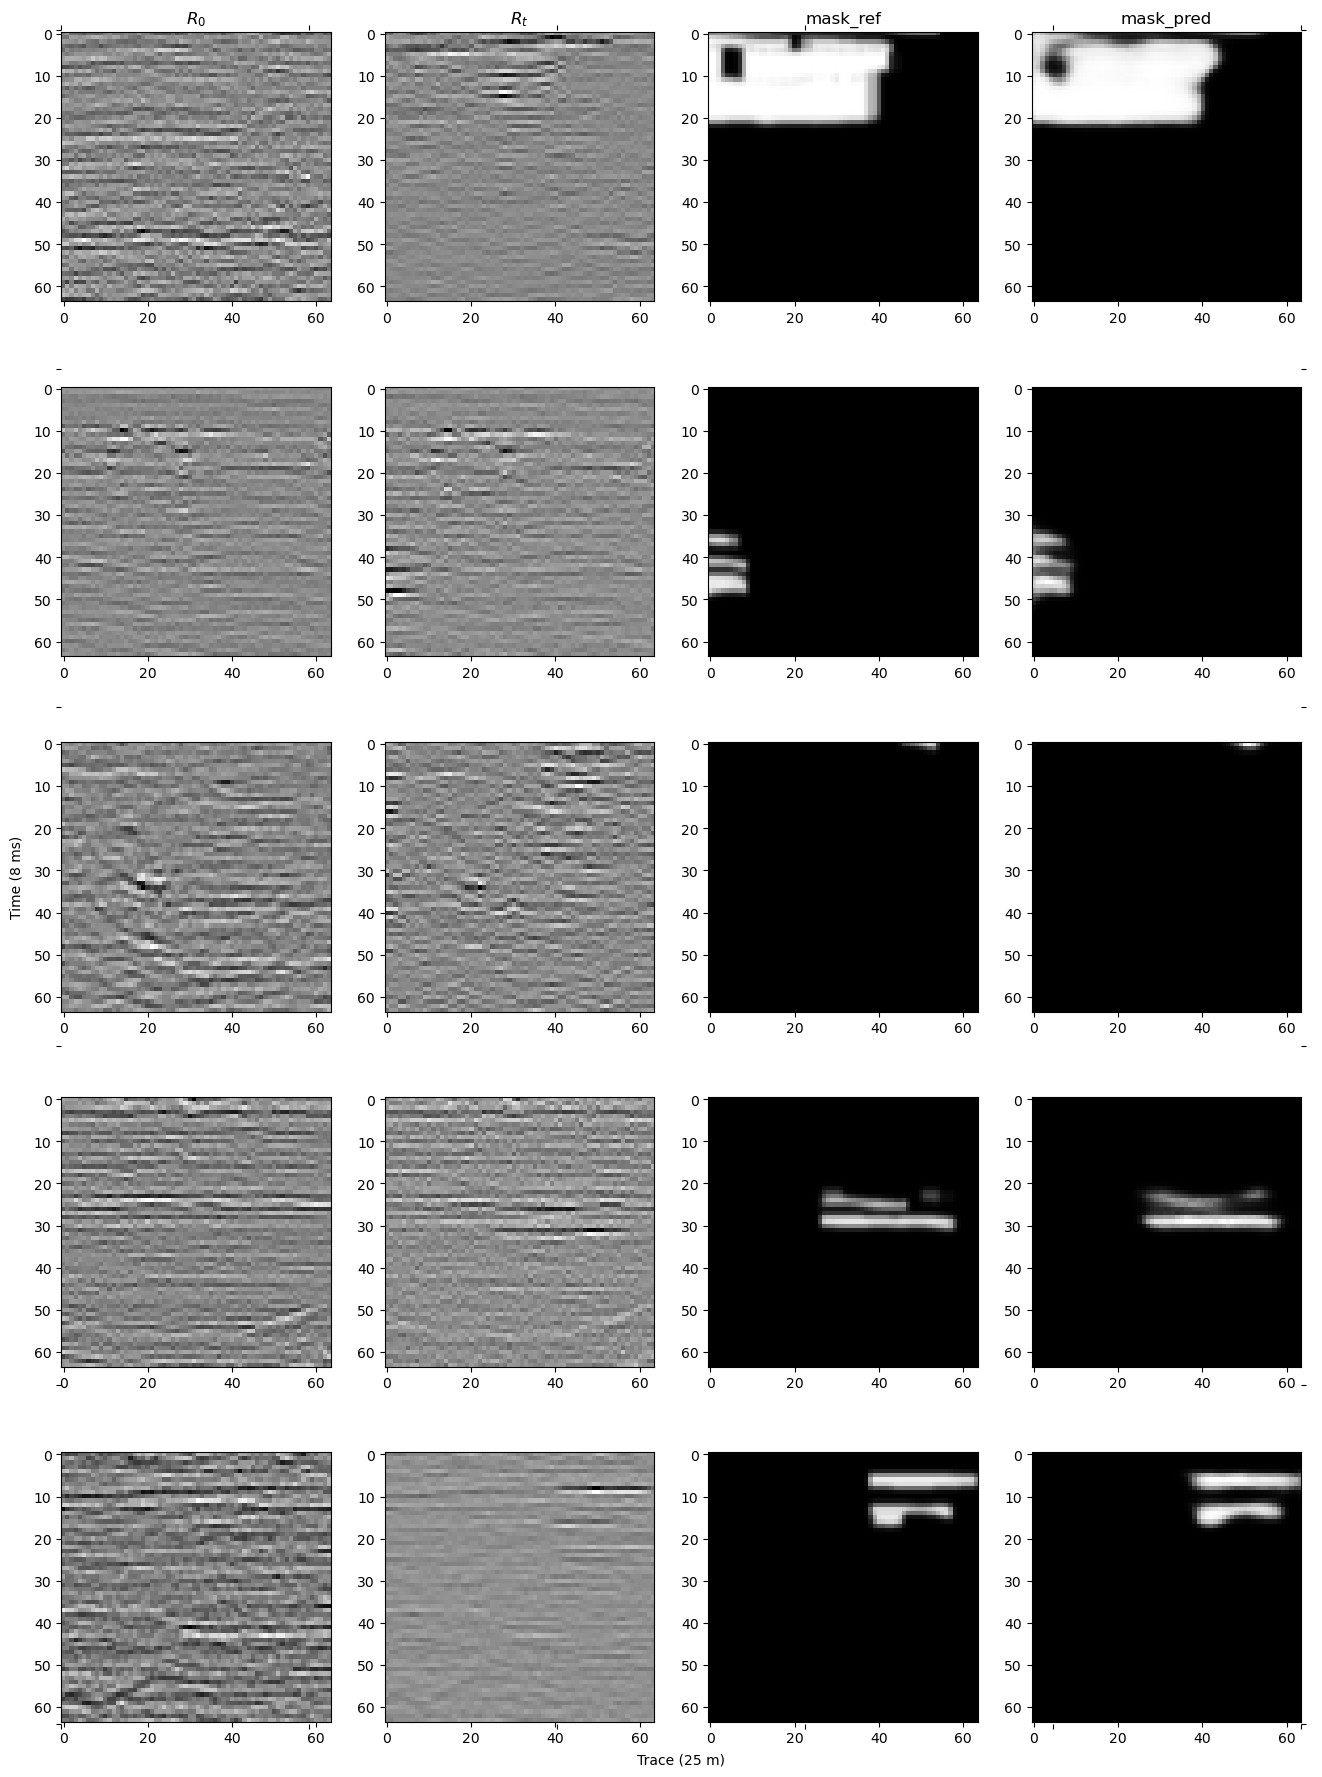

Start validating for epoch No. 40
Mean validating loss for epoch No. 40: 0.0573677197098732
Validating patch samples display at epoch No. 40


<Figure size 640x480 with 0 Axes>

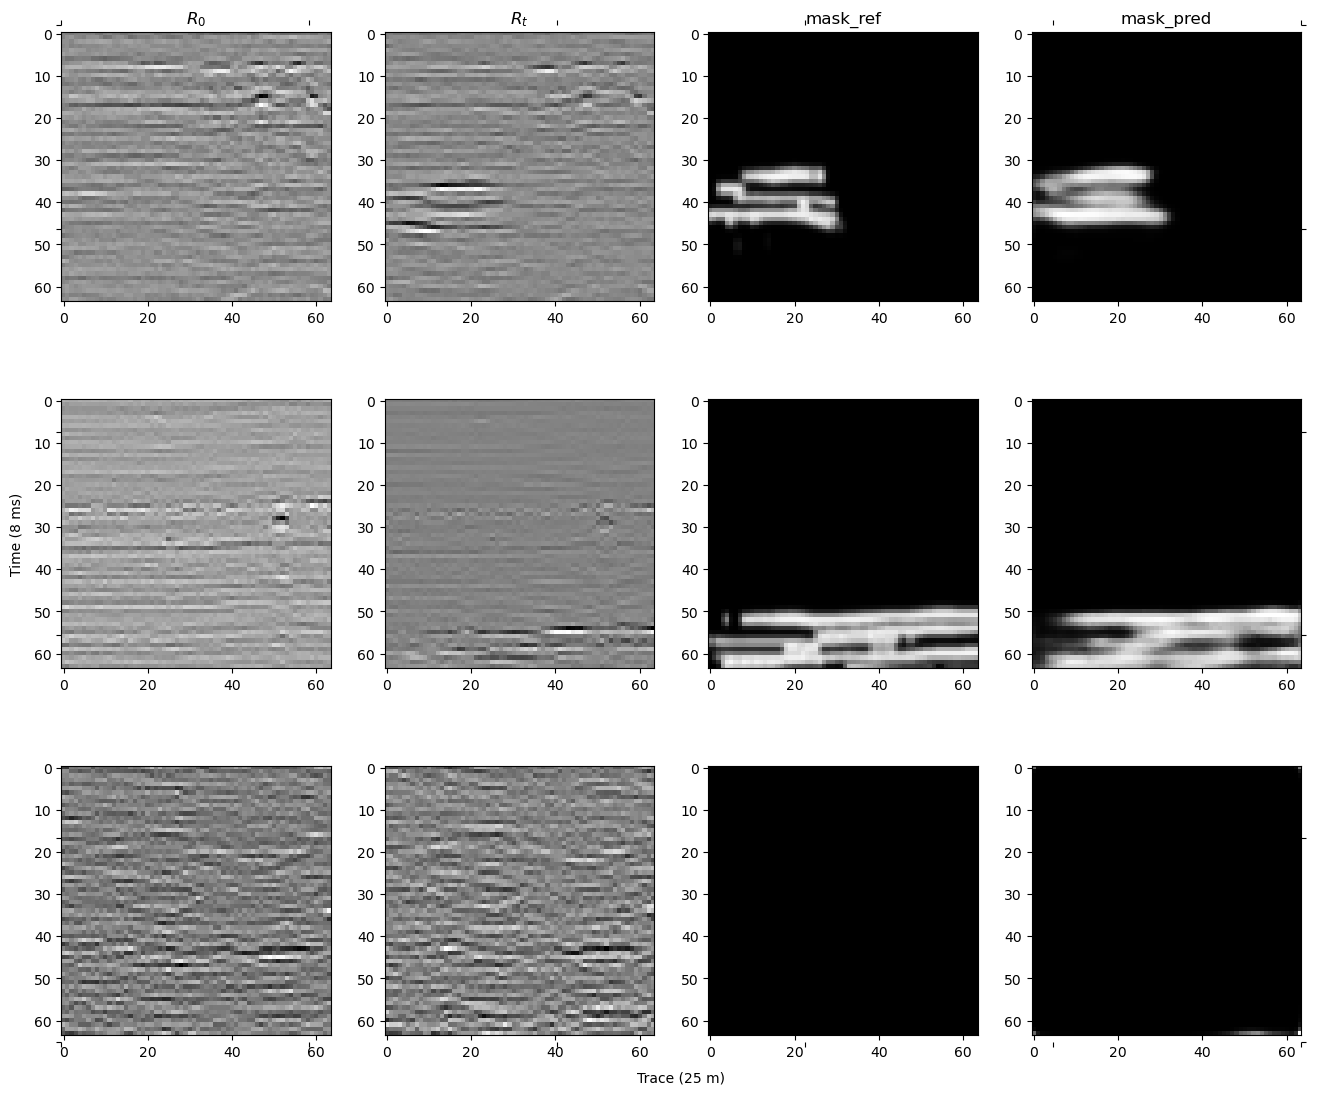

Epoch No.: 41
Batch No. 0--------------------
Batch No. 10--------------------
Batch No. 20--------------------
Batch No. 30--------------------
Batch No. 40--------------------
Mean training loss for epoch No. 41: 0.03417507044970989
Start validating for epoch No. 41
Mean validating loss for epoch No. 41: 0.05740302428603172
Epoch No.: 42
Batch No. 0--------------------
Batch No. 10--------------------
Batch No. 20--------------------
Batch No. 30--------------------
Batch No. 40--------------------
Mean training loss for epoch No. 42: 0.03399607442319393
Start validating for epoch No. 42
Mean validating loss for epoch No. 42: 0.05703108757734299
Epoch No.: 43
Batch No. 0--------------------
Batch No. 10--------------------
Batch No. 20--------------------
Batch No. 30--------------------
Batch No. 40--------------------
Mean training loss for epoch No. 43: 0.0338887907192111
Start validating for epoch No. 43
Mean validating loss for epoch No. 43: 0.05713113024830818
Epoch No.: 44
Bat

<Figure size 640x480 with 0 Axes>

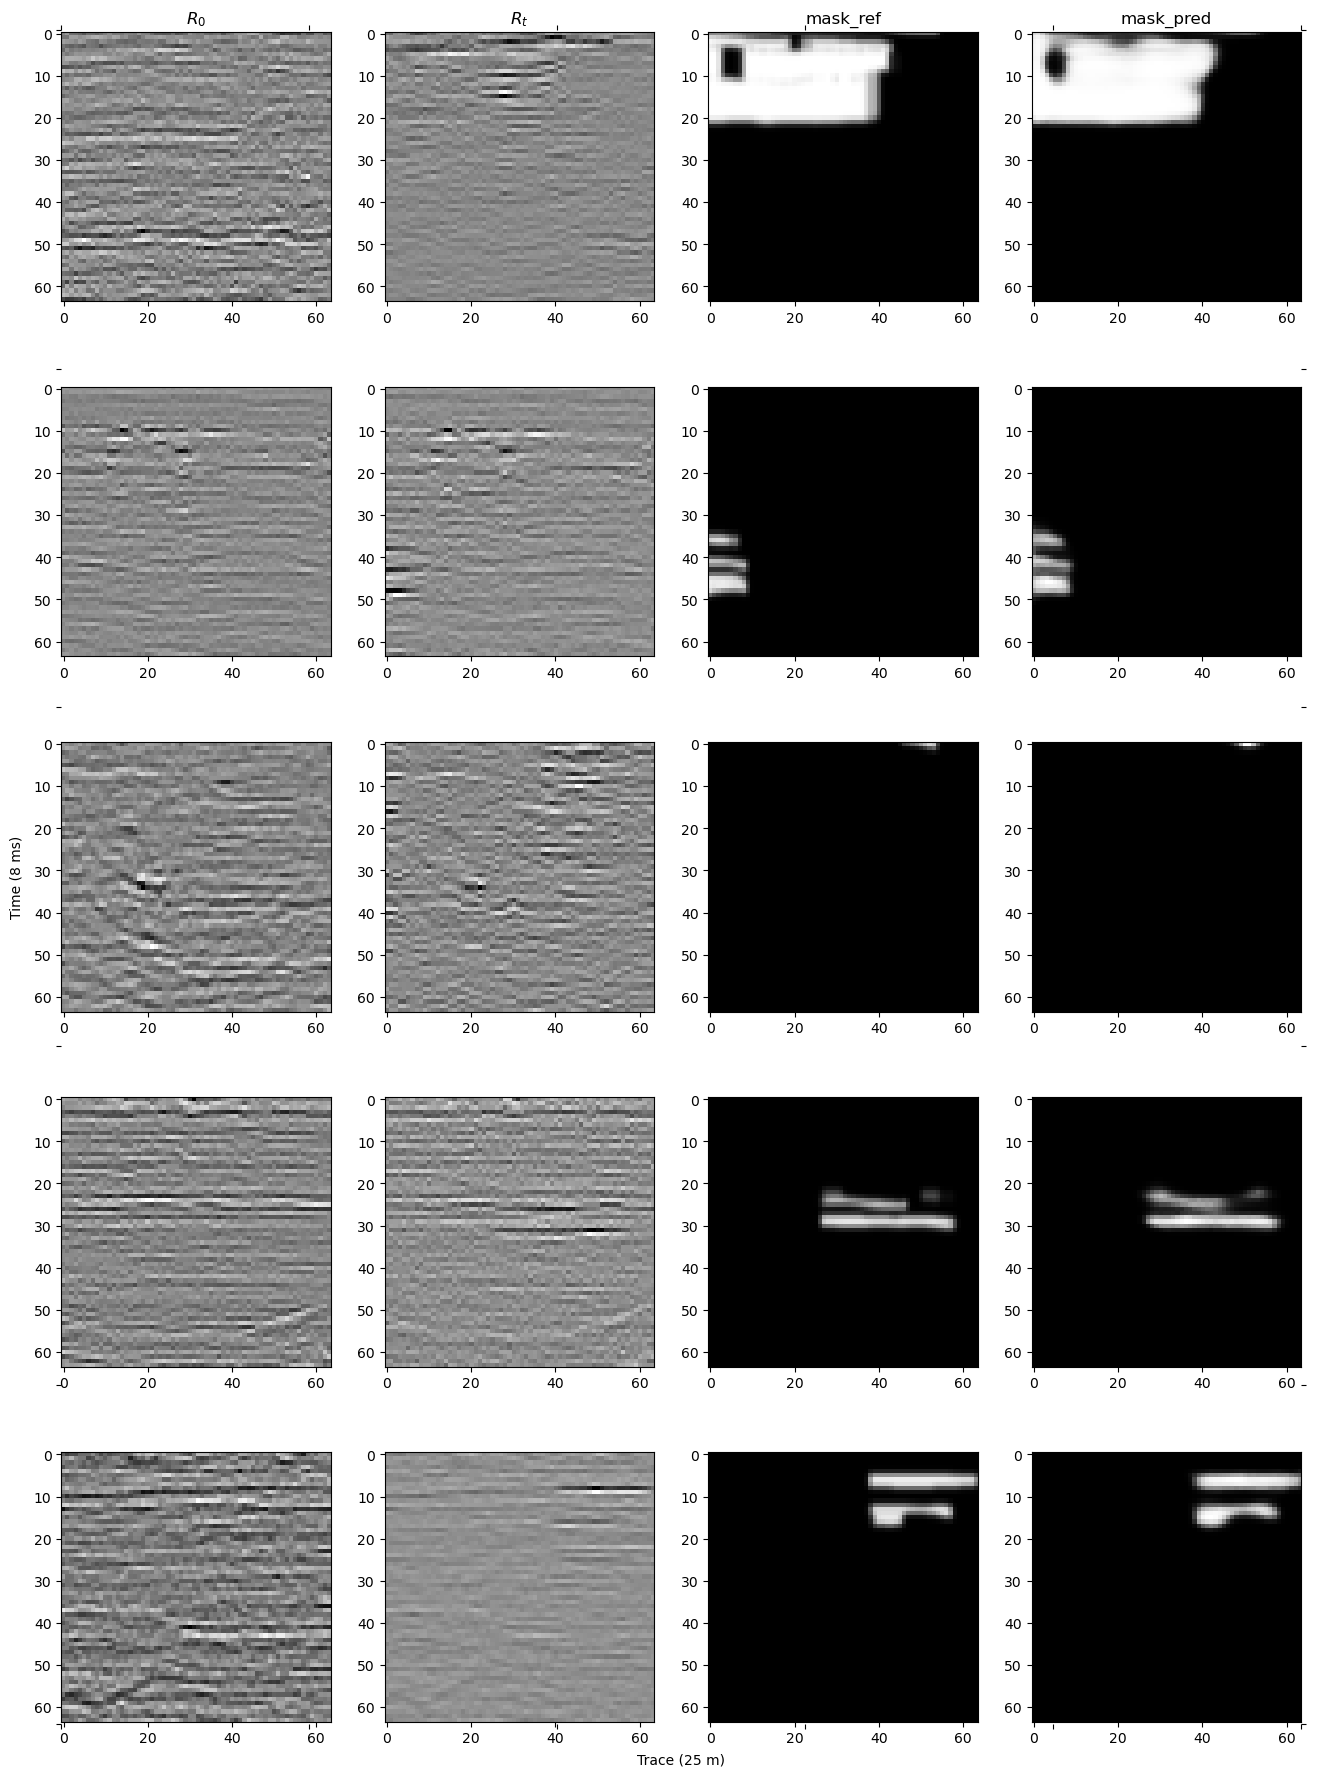

Start validating for epoch No. 60
Mean validating loss for epoch No. 60: 0.05578997731208801
Validating patch samples display at epoch No. 60


<Figure size 640x480 with 0 Axes>

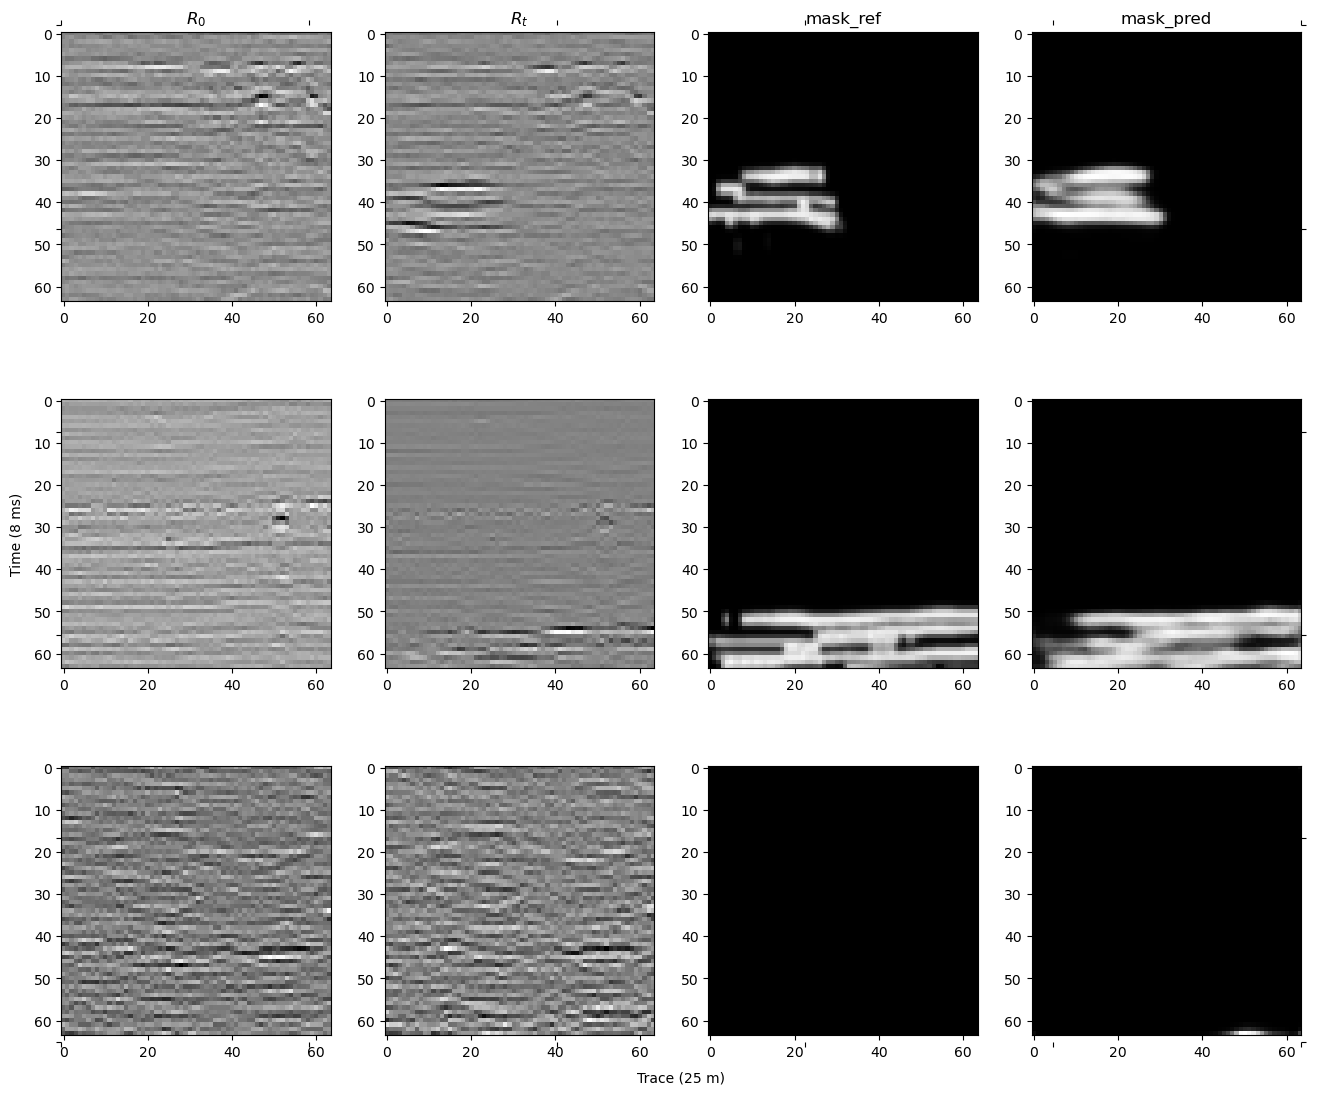

Epoch No.: 61
Batch No. 0--------------------
Batch No. 10--------------------
Batch No. 20--------------------
Batch No. 30--------------------
Batch No. 40--------------------
Mean training loss for epoch No. 61: 0.03307913906872272
Start validating for epoch No. 61
Mean validating loss for epoch No. 61: 0.058128874748945236
Epoch No.: 62
Batch No. 0--------------------
Batch No. 10--------------------
Batch No. 20--------------------
Batch No. 30--------------------
Batch No. 40--------------------
Mean training loss for epoch No. 62: 0.03300041969865561
Start validating for epoch No. 62
Mean validating loss for epoch No. 62: 0.05678417906165123
Epoch No.: 63
Batch No. 0--------------------
Batch No. 10--------------------
Batch No. 20--------------------
Batch No. 30--------------------
Batch No. 40--------------------
Mean training loss for epoch No. 63: 0.032945311069488524
Start validating for epoch No. 63
Mean validating loss for epoch No. 63: 0.05576884001493454
Epoch No.: 64


<Figure size 640x480 with 0 Axes>

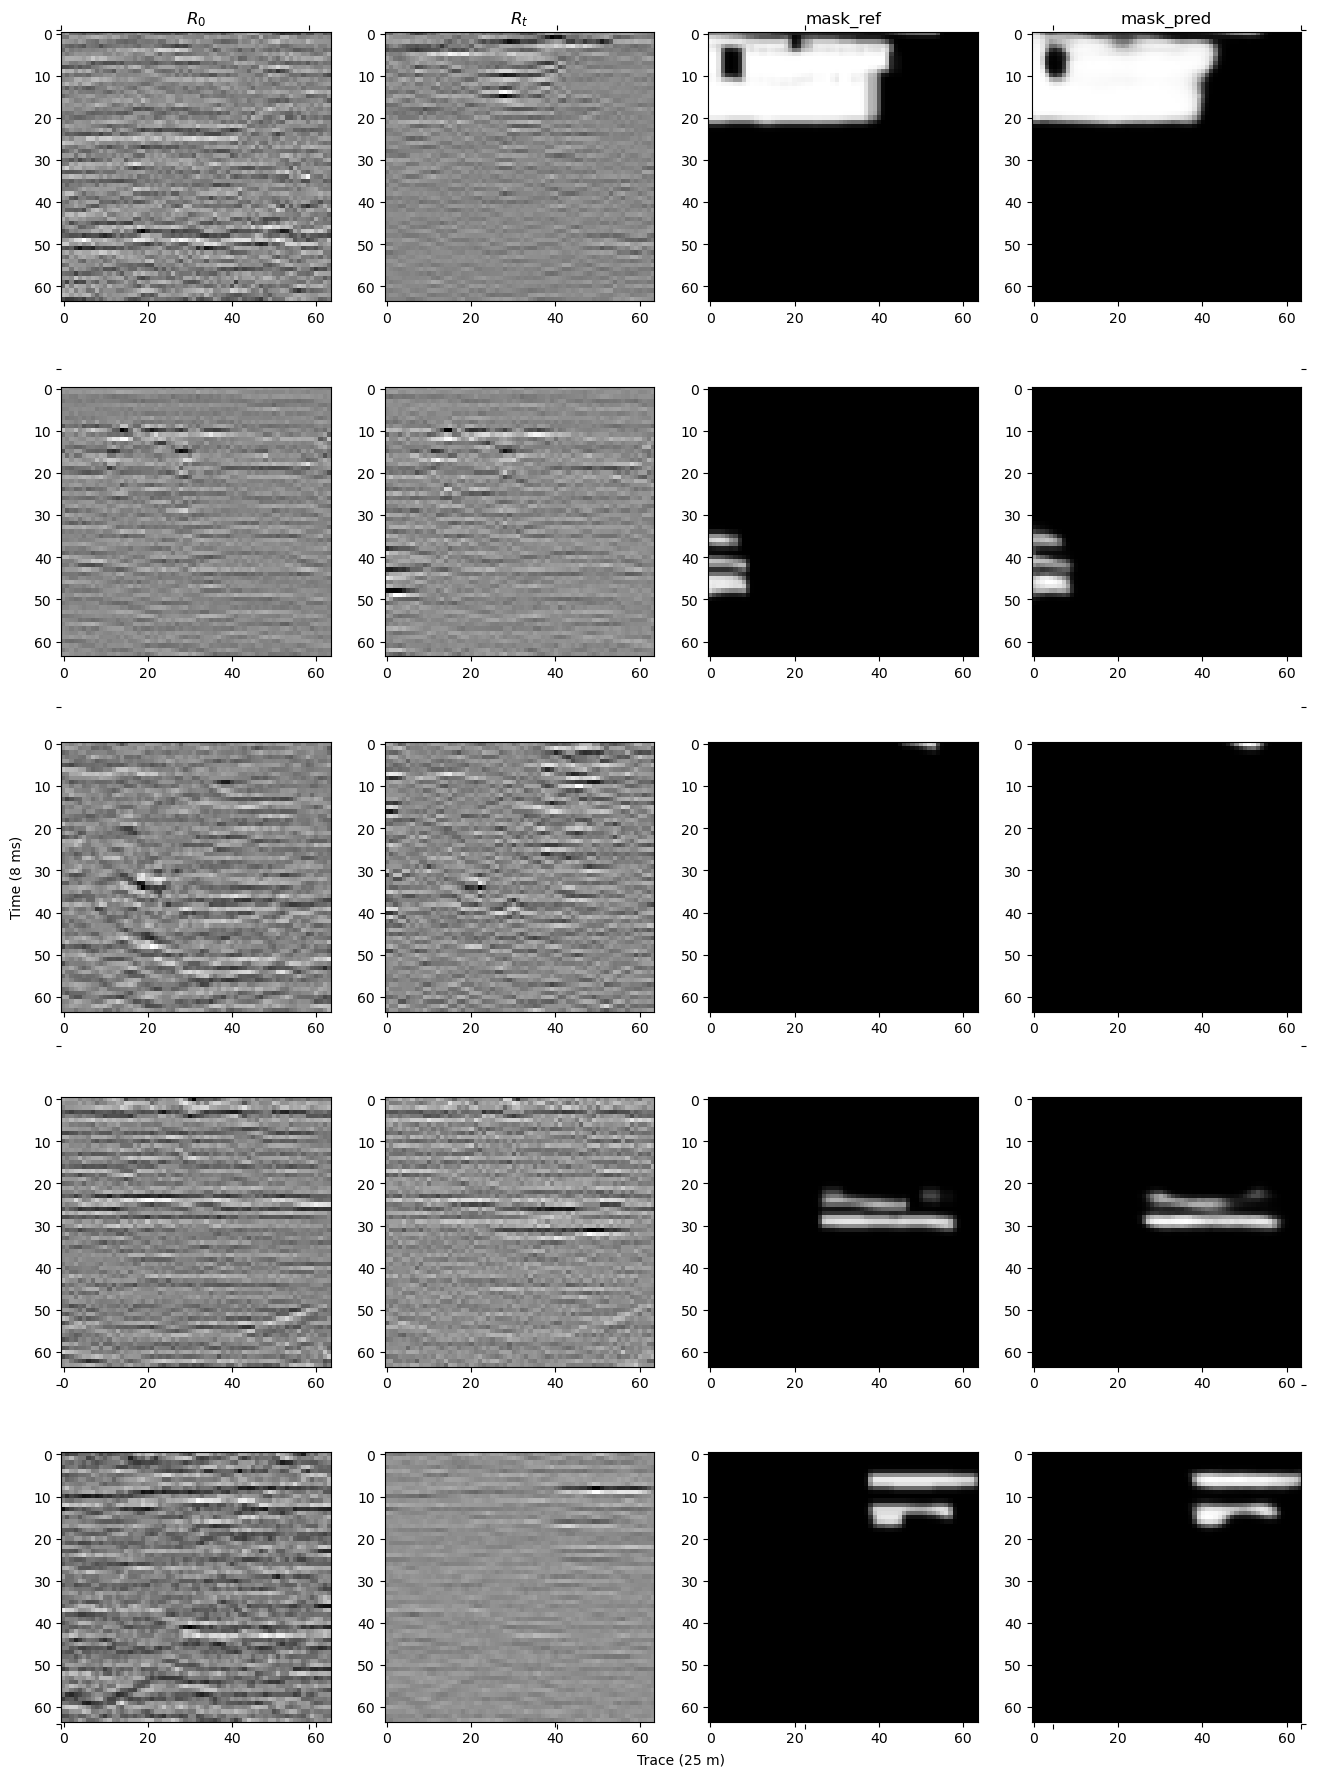

Start validating for epoch No. 80
Mean validating loss for epoch No. 80: 0.054555367678403854
Validating patch samples display at epoch No. 80


<Figure size 640x480 with 0 Axes>

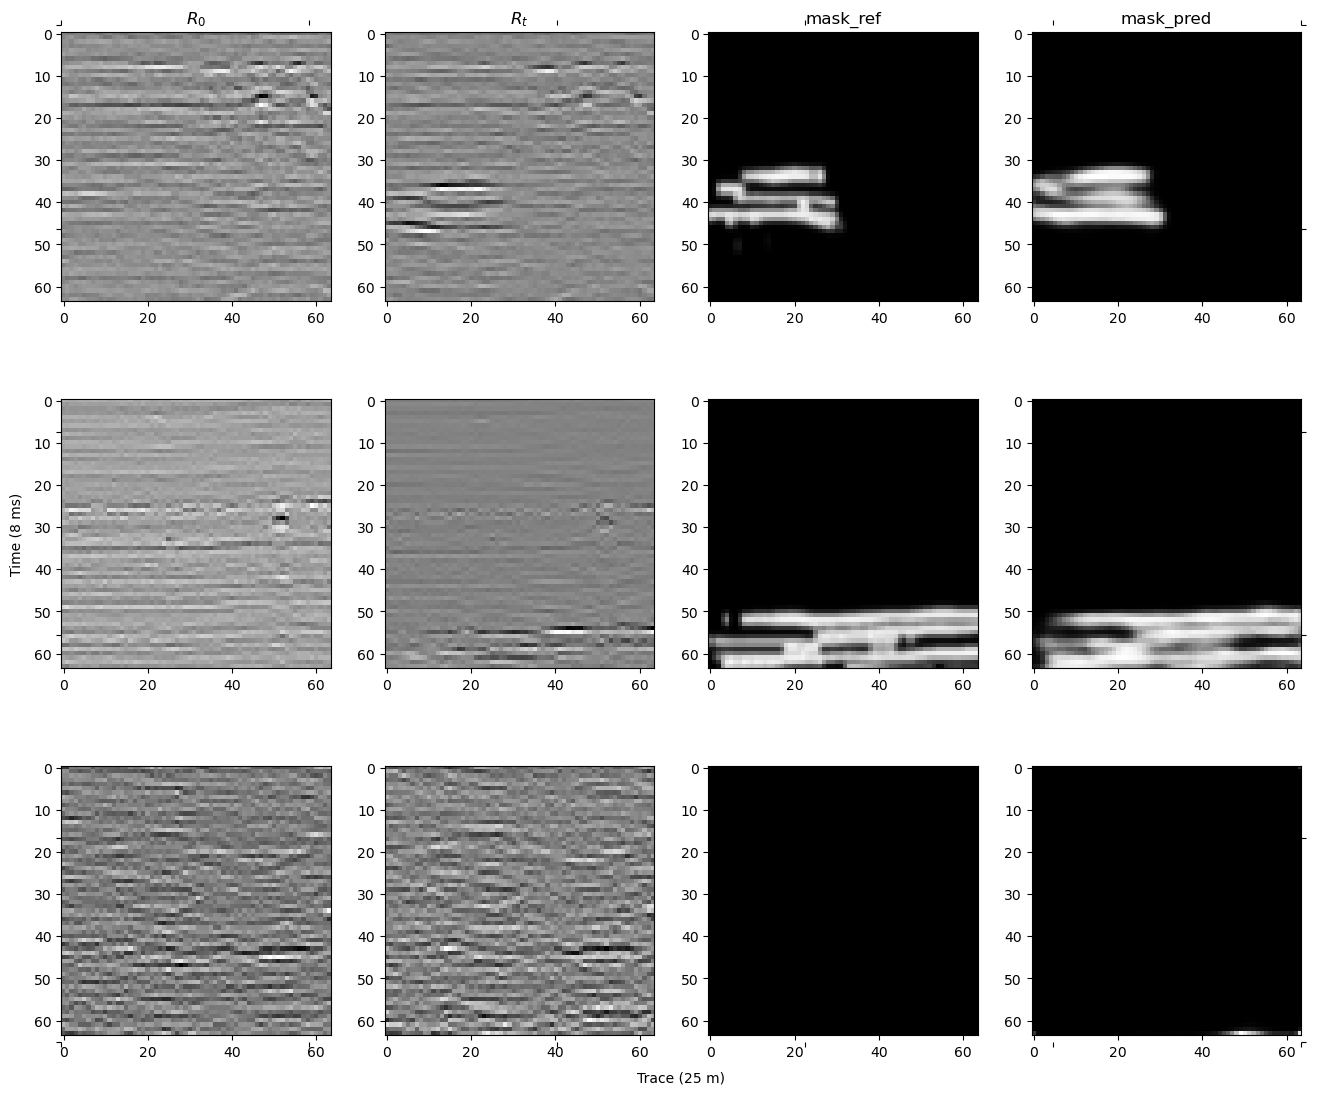

Epoch No.: 81
Batch No. 0--------------------
Batch No. 10--------------------
Batch No. 20--------------------
Batch No. 30--------------------
Batch No. 40--------------------
Mean training loss for epoch No. 81: 0.03207358255982399
Start validating for epoch No. 81
Mean validating loss for epoch No. 81: 0.05387556180357933
Epoch No.: 82
Batch No. 0--------------------
Batch No. 10--------------------
Batch No. 20--------------------
Batch No. 30--------------------
Batch No. 40--------------------
Mean training loss for epoch No. 82: 0.03202701378613711
Start validating for epoch No. 82
Mean validating loss for epoch No. 82: 0.05426023155450821
Epoch No.: 83
Batch No. 0--------------------
Batch No. 10--------------------
Batch No. 20--------------------
Batch No. 30--------------------
Batch No. 40--------------------
Mean training loss for epoch No. 83: 0.031989795081317426
Start validating for epoch No. 83
Mean validating loss for epoch No. 83: 0.05436878278851509
Epoch No.: 84
B

<Figure size 640x480 with 0 Axes>

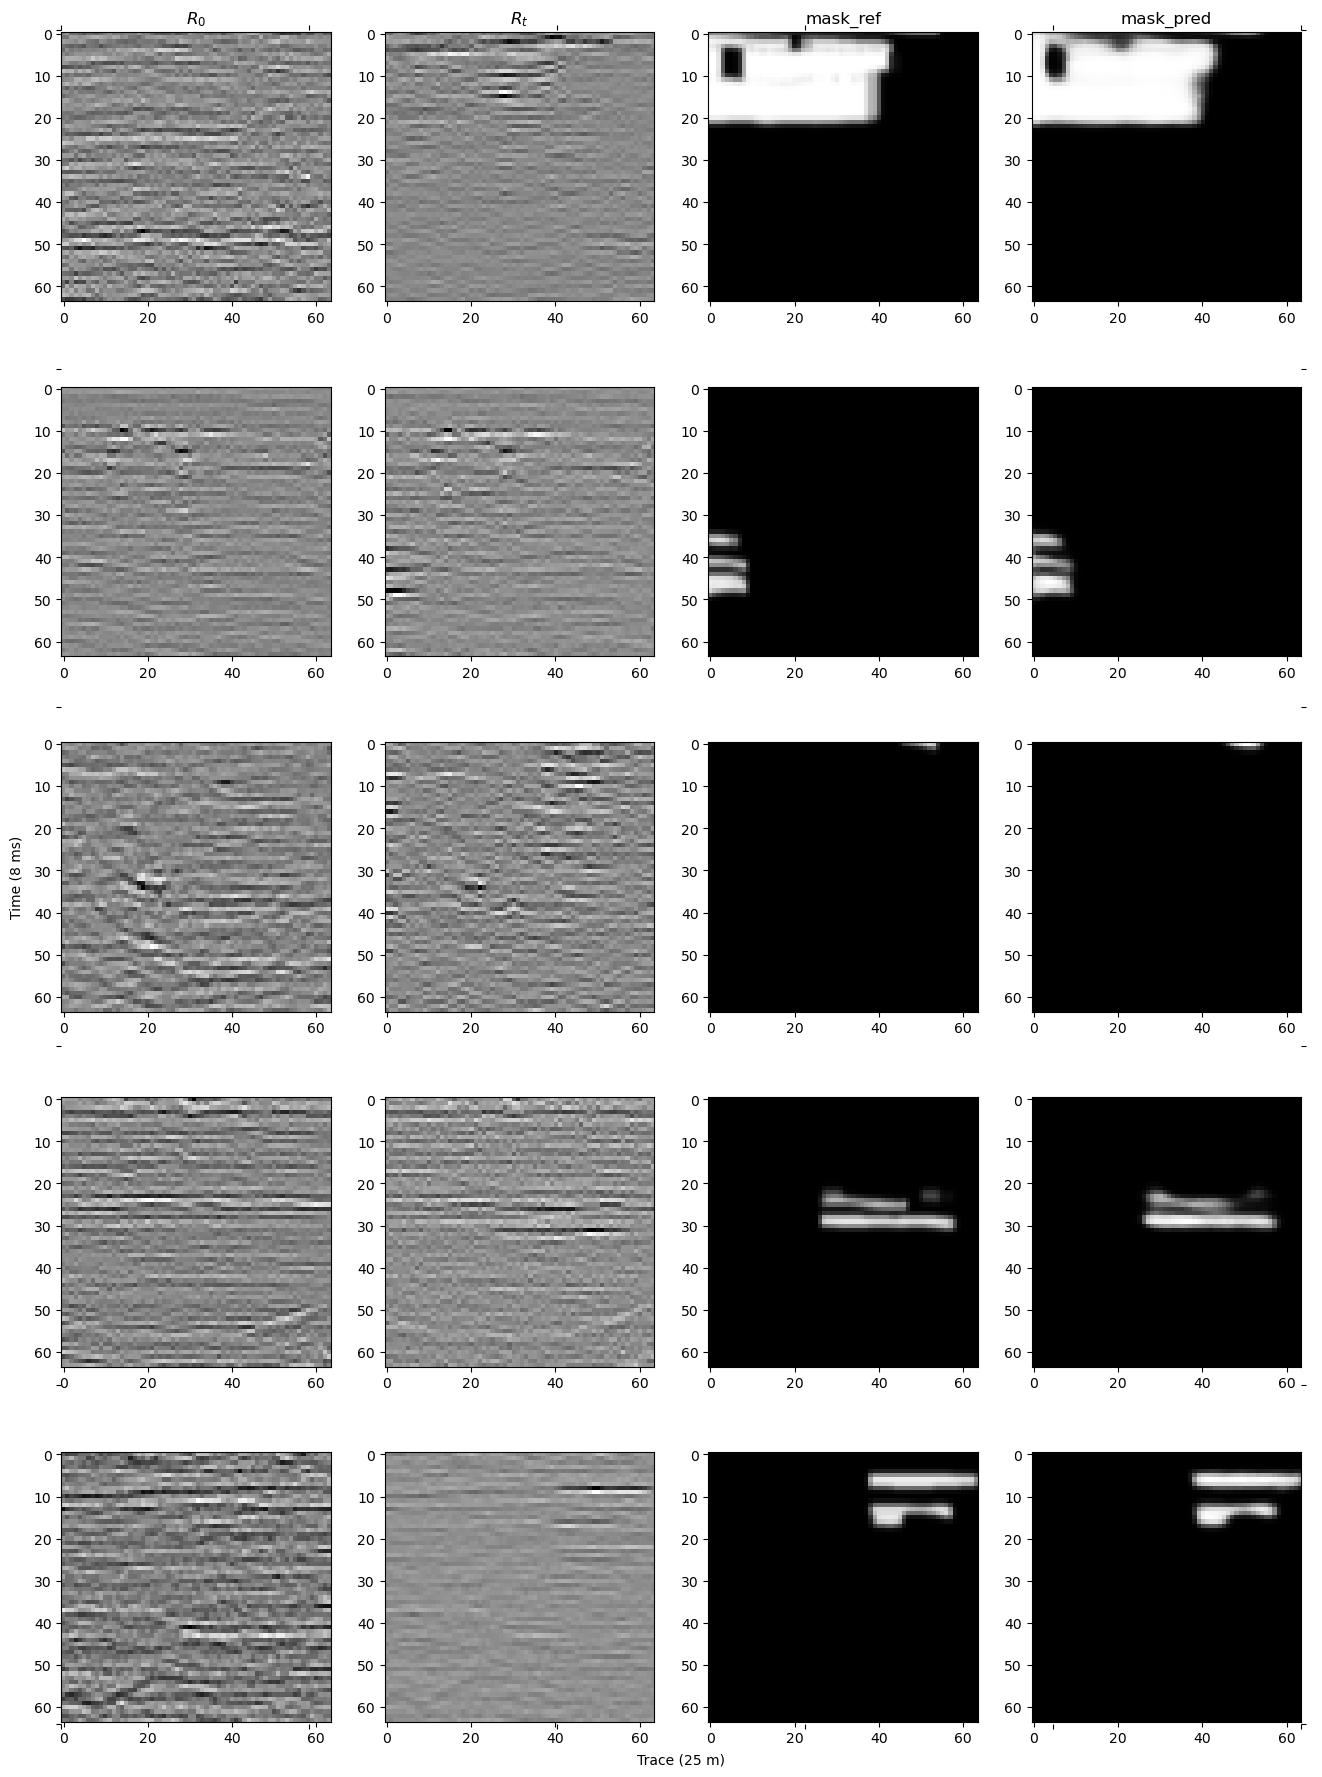

Start validating for epoch No. 100
Mean validating loss for epoch No. 100: 0.052479978650808334
Validating patch samples display at epoch No. 100


<Figure size 640x480 with 0 Axes>

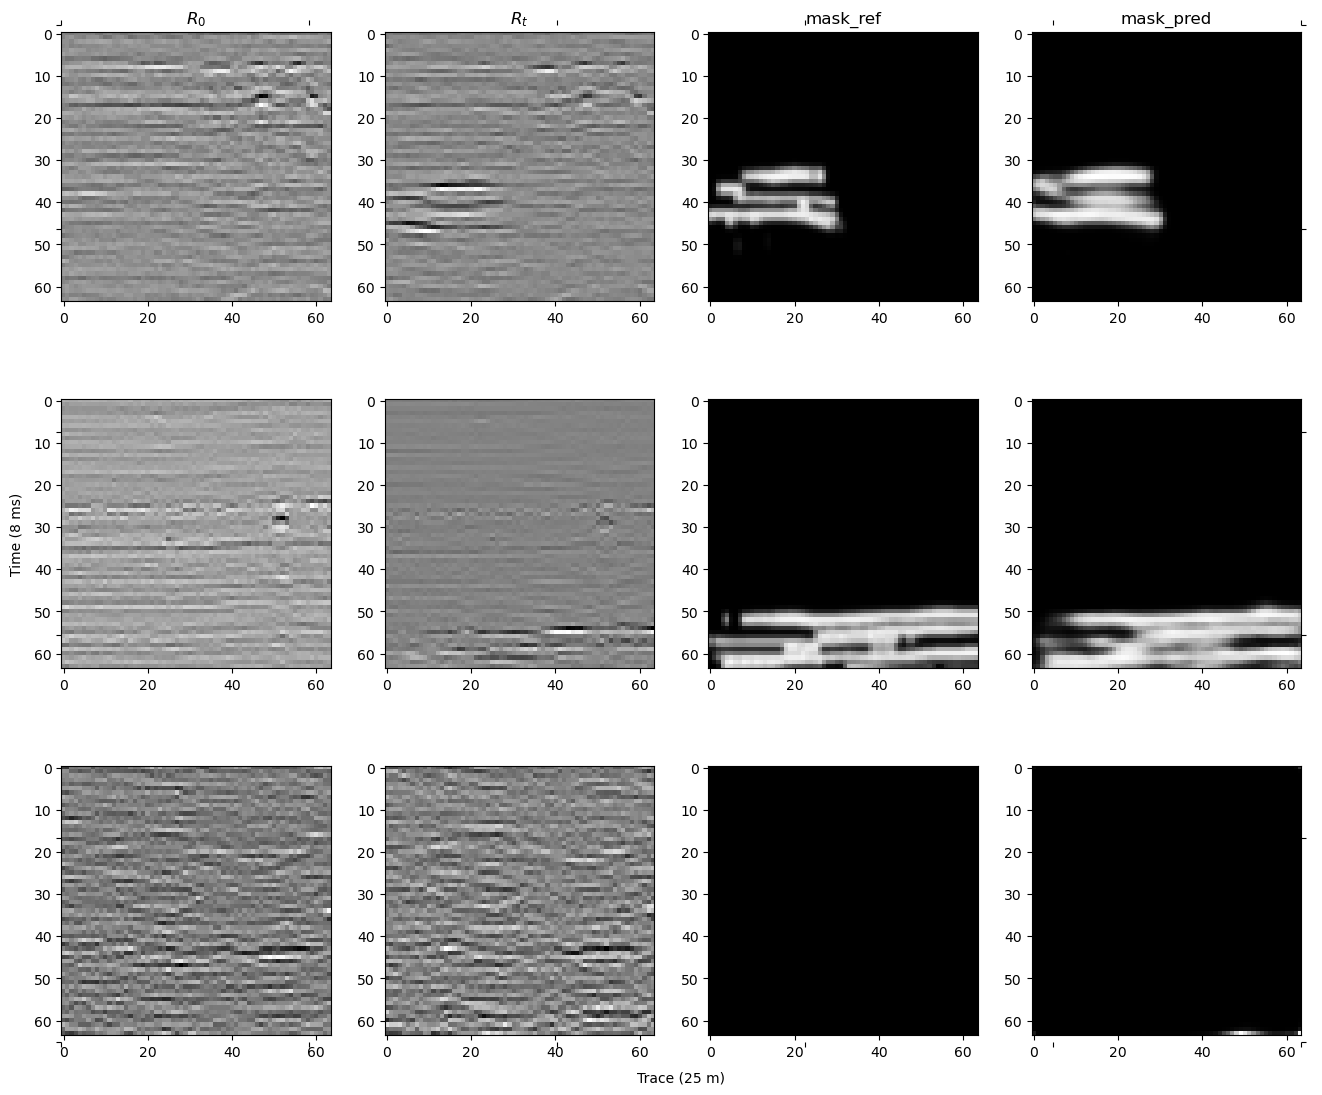

Epoch No.: 101
Batch No. 0--------------------
Batch No. 10--------------------
Batch No. 20--------------------
Batch No. 30--------------------
Batch No. 40--------------------
Mean training loss for epoch No. 101: 0.031936523281037806
Start validating for epoch No. 101
Mean validating loss for epoch No. 101: 0.05306804180145264
Epoch No.: 102
Batch No. 0--------------------
Batch No. 10--------------------
Batch No. 20--------------------
Batch No. 30--------------------
Batch No. 40--------------------
Mean training loss for epoch No. 102: 0.03174116153270006
Start validating for epoch No. 102
Mean validating loss for epoch No. 102: 0.05405450239777565
Epoch No.: 103
Batch No. 0--------------------
Batch No. 10--------------------
Batch No. 20--------------------
Batch No. 30--------------------
Batch No. 40--------------------
Mean training loss for epoch No. 103: 0.031664329543709756
Start validating for epoch No. 103
Mean validating loss for epoch No. 103: 0.052604179829359055
E

<Figure size 640x480 with 0 Axes>

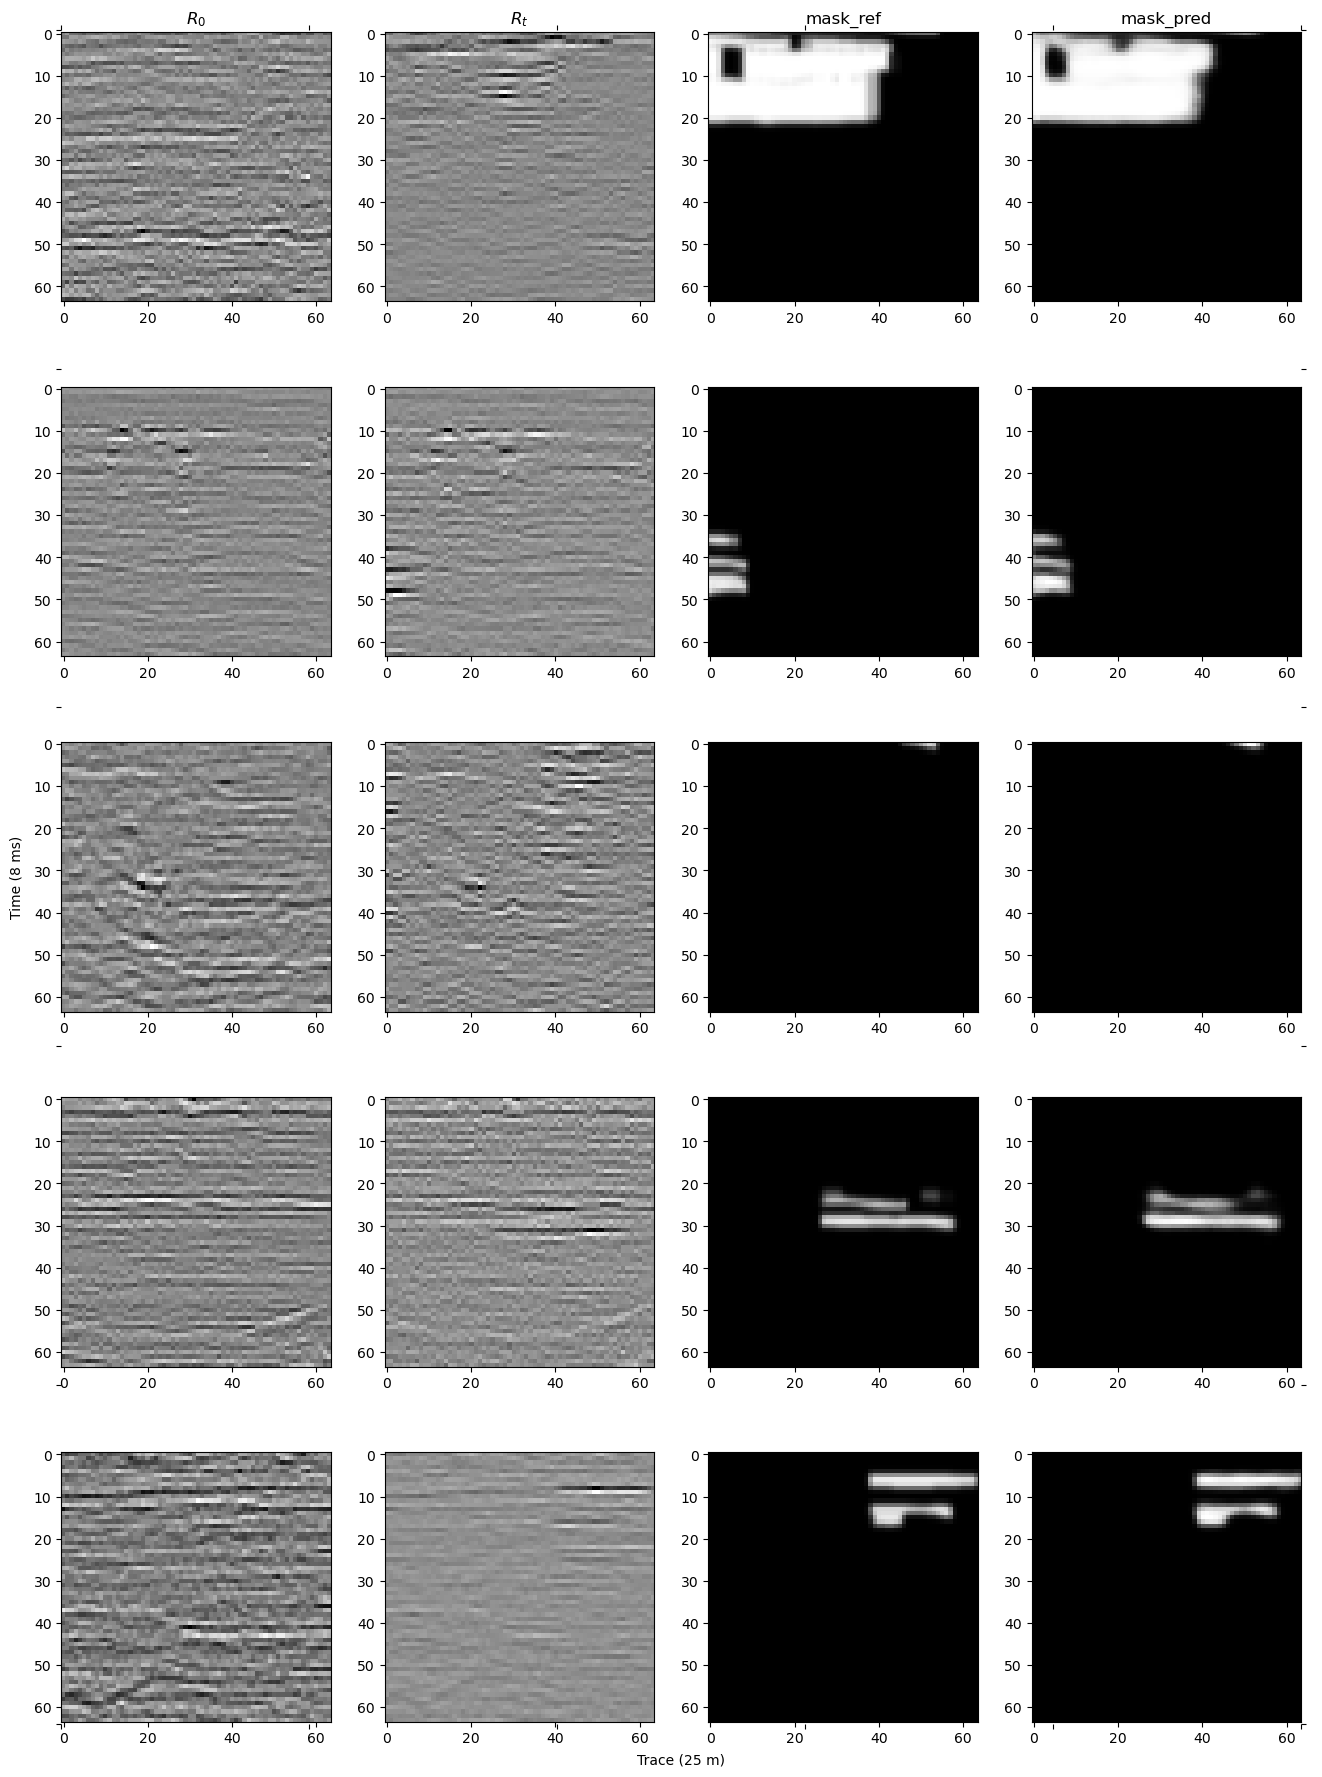

Start validating for epoch No. 120
Mean validating loss for epoch No. 120: 0.05189629644155502
Validating patch samples display at epoch No. 120


<Figure size 640x480 with 0 Axes>

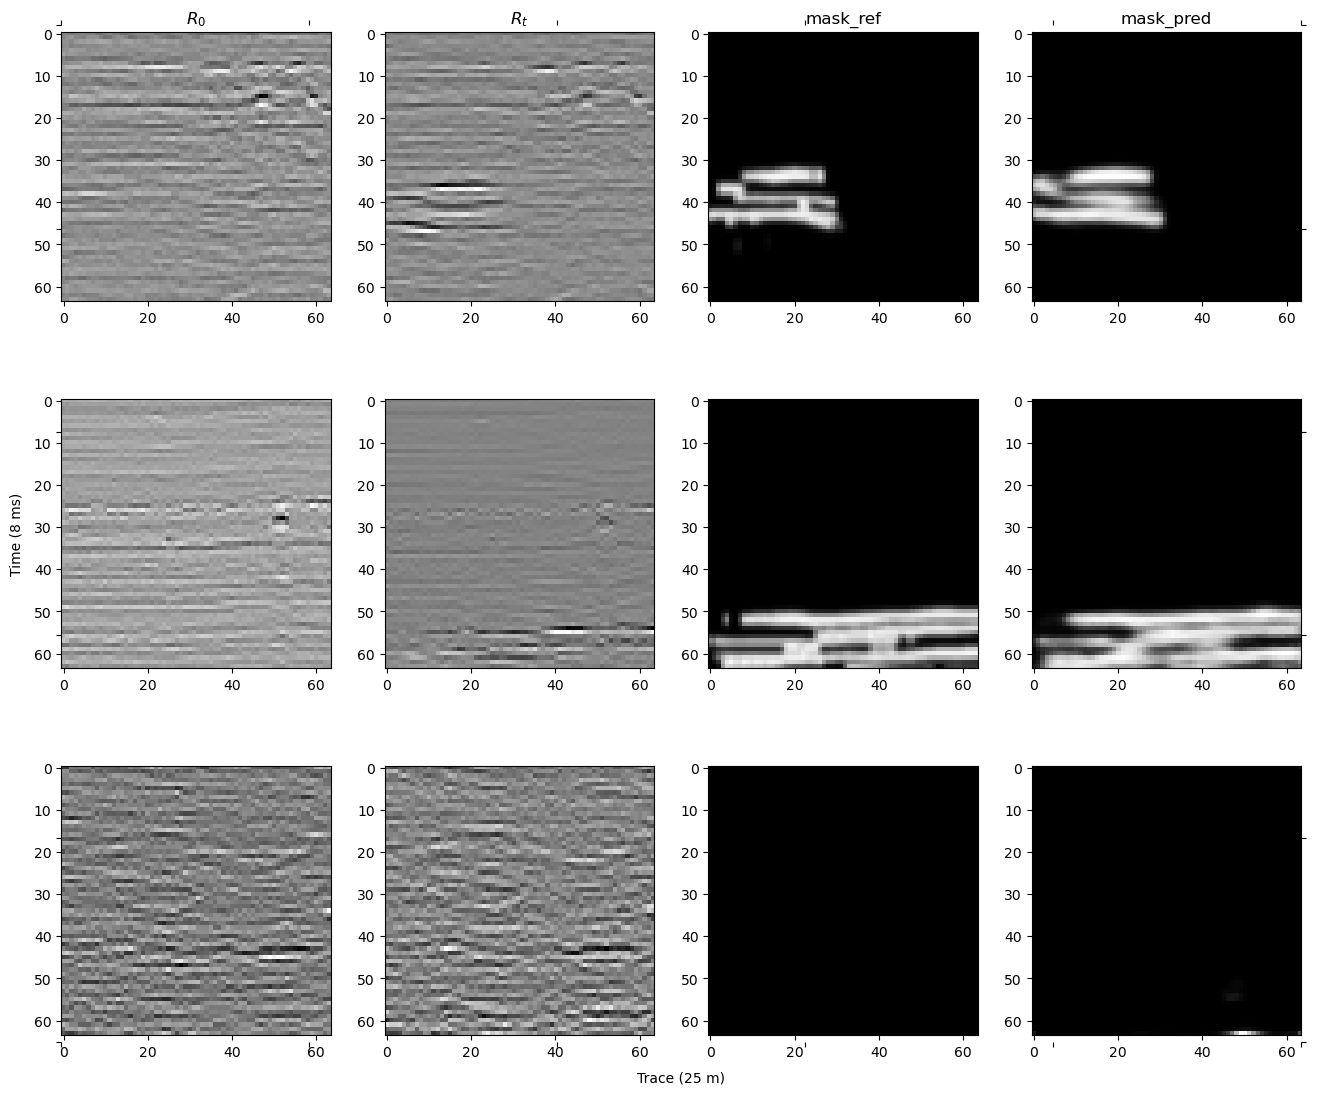

Epoch No.: 121
Batch No. 0--------------------
Batch No. 10--------------------
Batch No. 20--------------------
Batch No. 30--------------------
Batch No. 40--------------------
Mean training loss for epoch No. 121: 0.03153029665350914
Start validating for epoch No. 121
Mean validating loss for epoch No. 121: 0.05227944999933243
Epoch No.: 122
Batch No. 0--------------------
Batch No. 10--------------------
Batch No. 20--------------------
Batch No. 30--------------------
Batch No. 40--------------------
Mean training loss for epoch No. 122: 0.03144196685403586
Start validating for epoch No. 122
Mean validating loss for epoch No. 122: 0.05240973085165024
Epoch No.: 123
Batch No. 0--------------------
Batch No. 10--------------------
Batch No. 20--------------------
Batch No. 30--------------------
Batch No. 40--------------------
Mean training loss for epoch No. 123: 0.031391001865267755
Start validating for epoch No. 123
Mean validating loss for epoch No. 123: 0.052554212510585785
Ep

<Figure size 640x480 with 0 Axes>

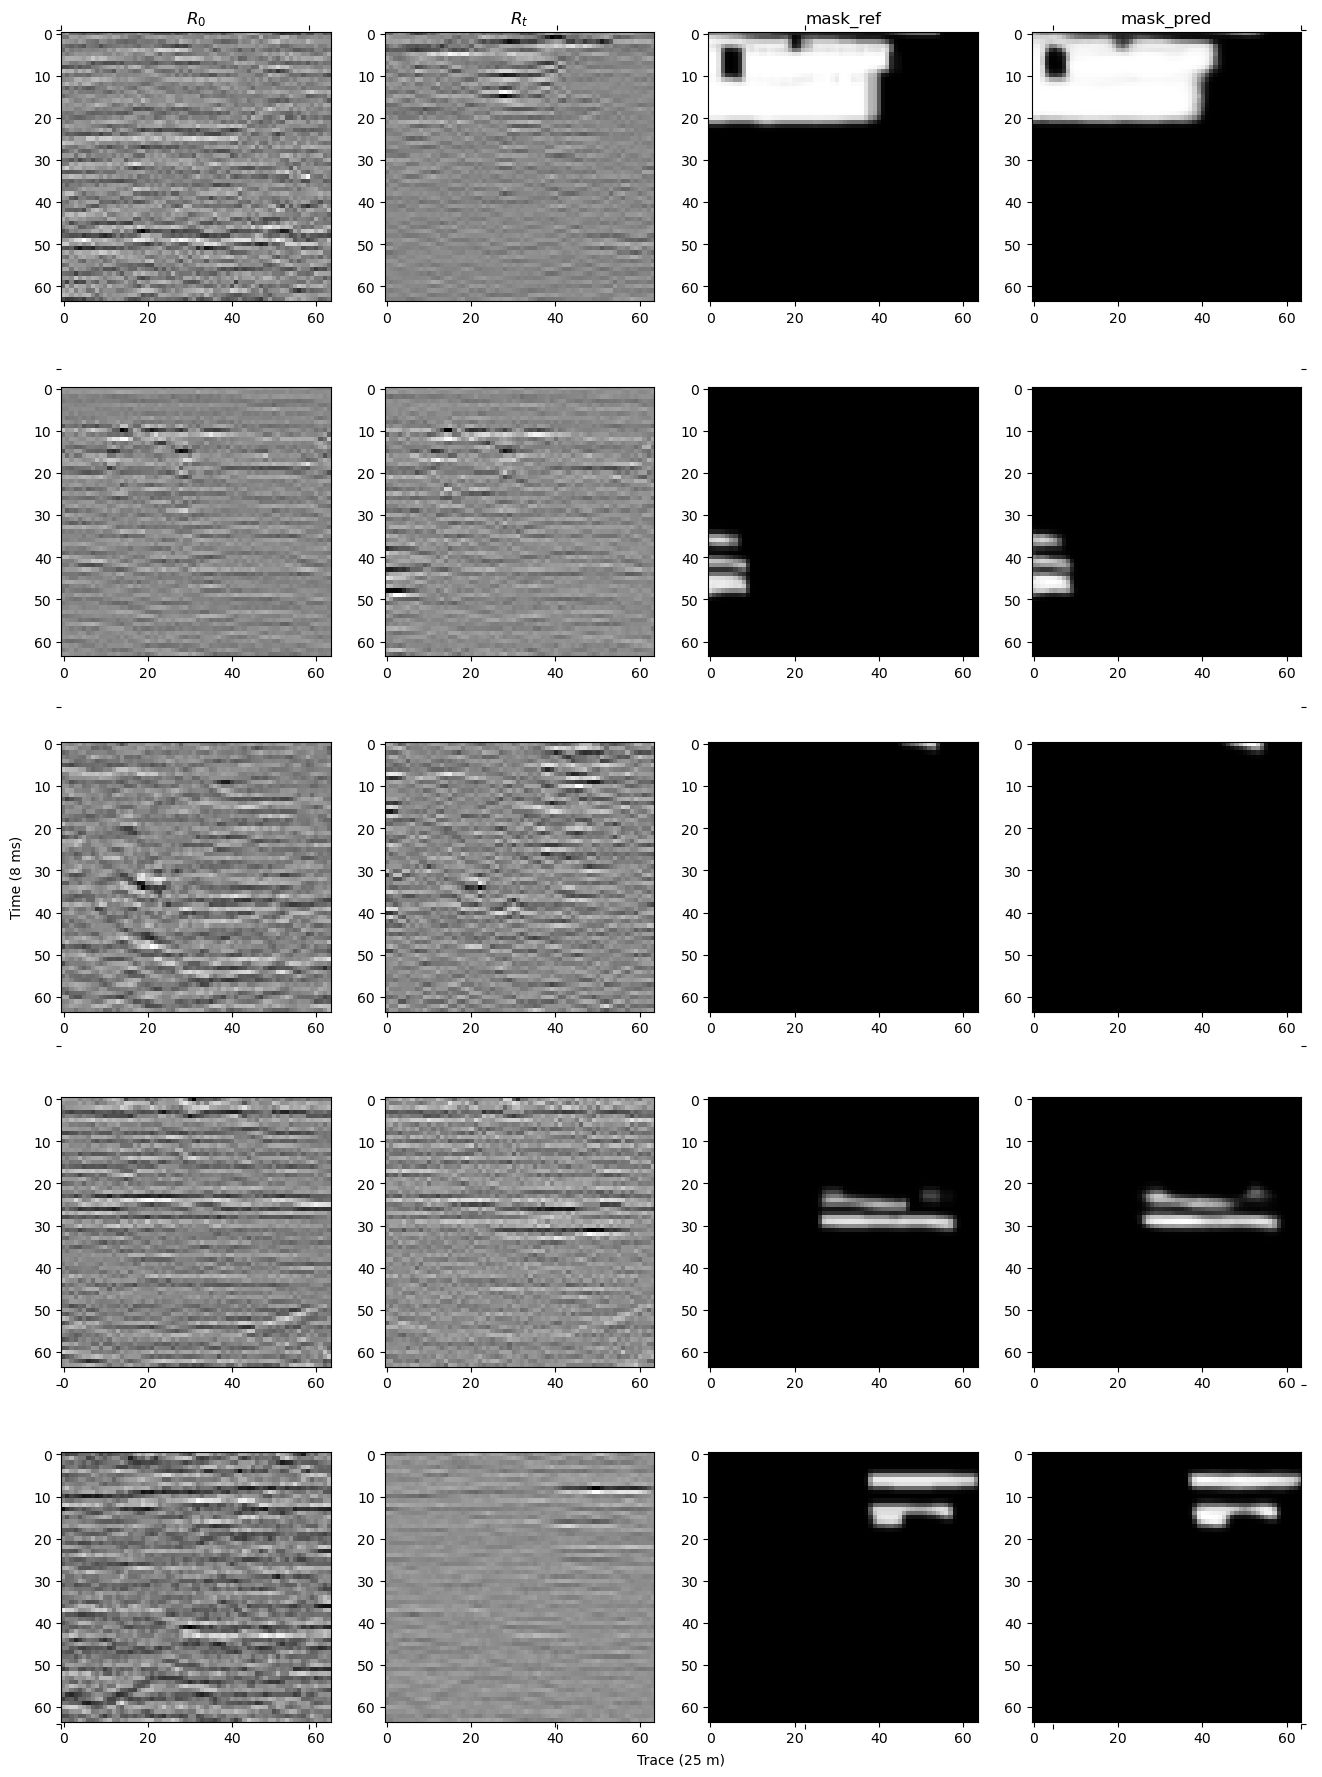

Start validating for epoch No. 140
Mean validating loss for epoch No. 140: 0.05345437675714493
Validating patch samples display at epoch No. 140


<Figure size 640x480 with 0 Axes>

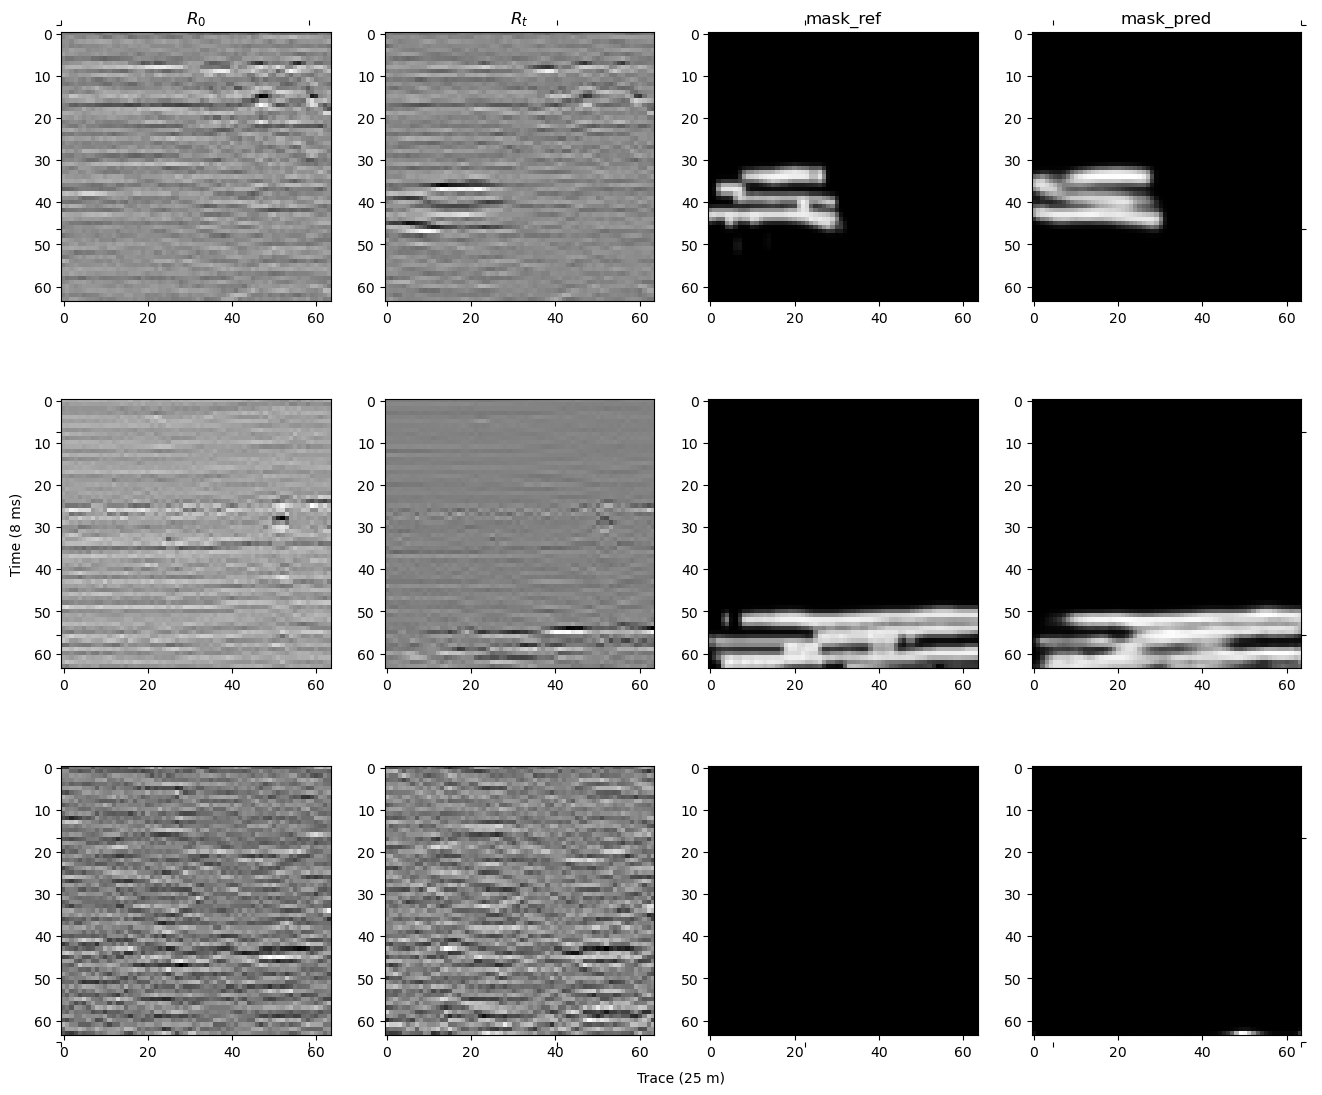

Epoch No.: 141
Batch No. 0--------------------
Batch No. 10--------------------
Batch No. 20--------------------
Batch No. 30--------------------
Batch No. 40--------------------
Mean training loss for epoch No. 141: 0.031466676350682975
Start validating for epoch No. 141
Mean validating loss for epoch No. 141: 0.0516524538397789
Epoch No.: 142
Batch No. 0--------------------
Batch No. 10--------------------
Batch No. 20--------------------
Batch No. 30--------------------
Batch No. 40--------------------
Mean training loss for epoch No. 142: 0.031552464291453364
Start validating for epoch No. 142
Mean validating loss for epoch No. 142: 0.05294273793697357
Epoch No.: 143
Batch No. 0--------------------
Batch No. 10--------------------
Batch No. 20--------------------
Batch No. 30--------------------
Batch No. 40--------------------
Mean training loss for epoch No. 143: 0.0313937596231699
Start validating for epoch No. 143
Mean validating loss for epoch No. 143: 0.05113431438803673
Epoc

<Figure size 640x480 with 0 Axes>

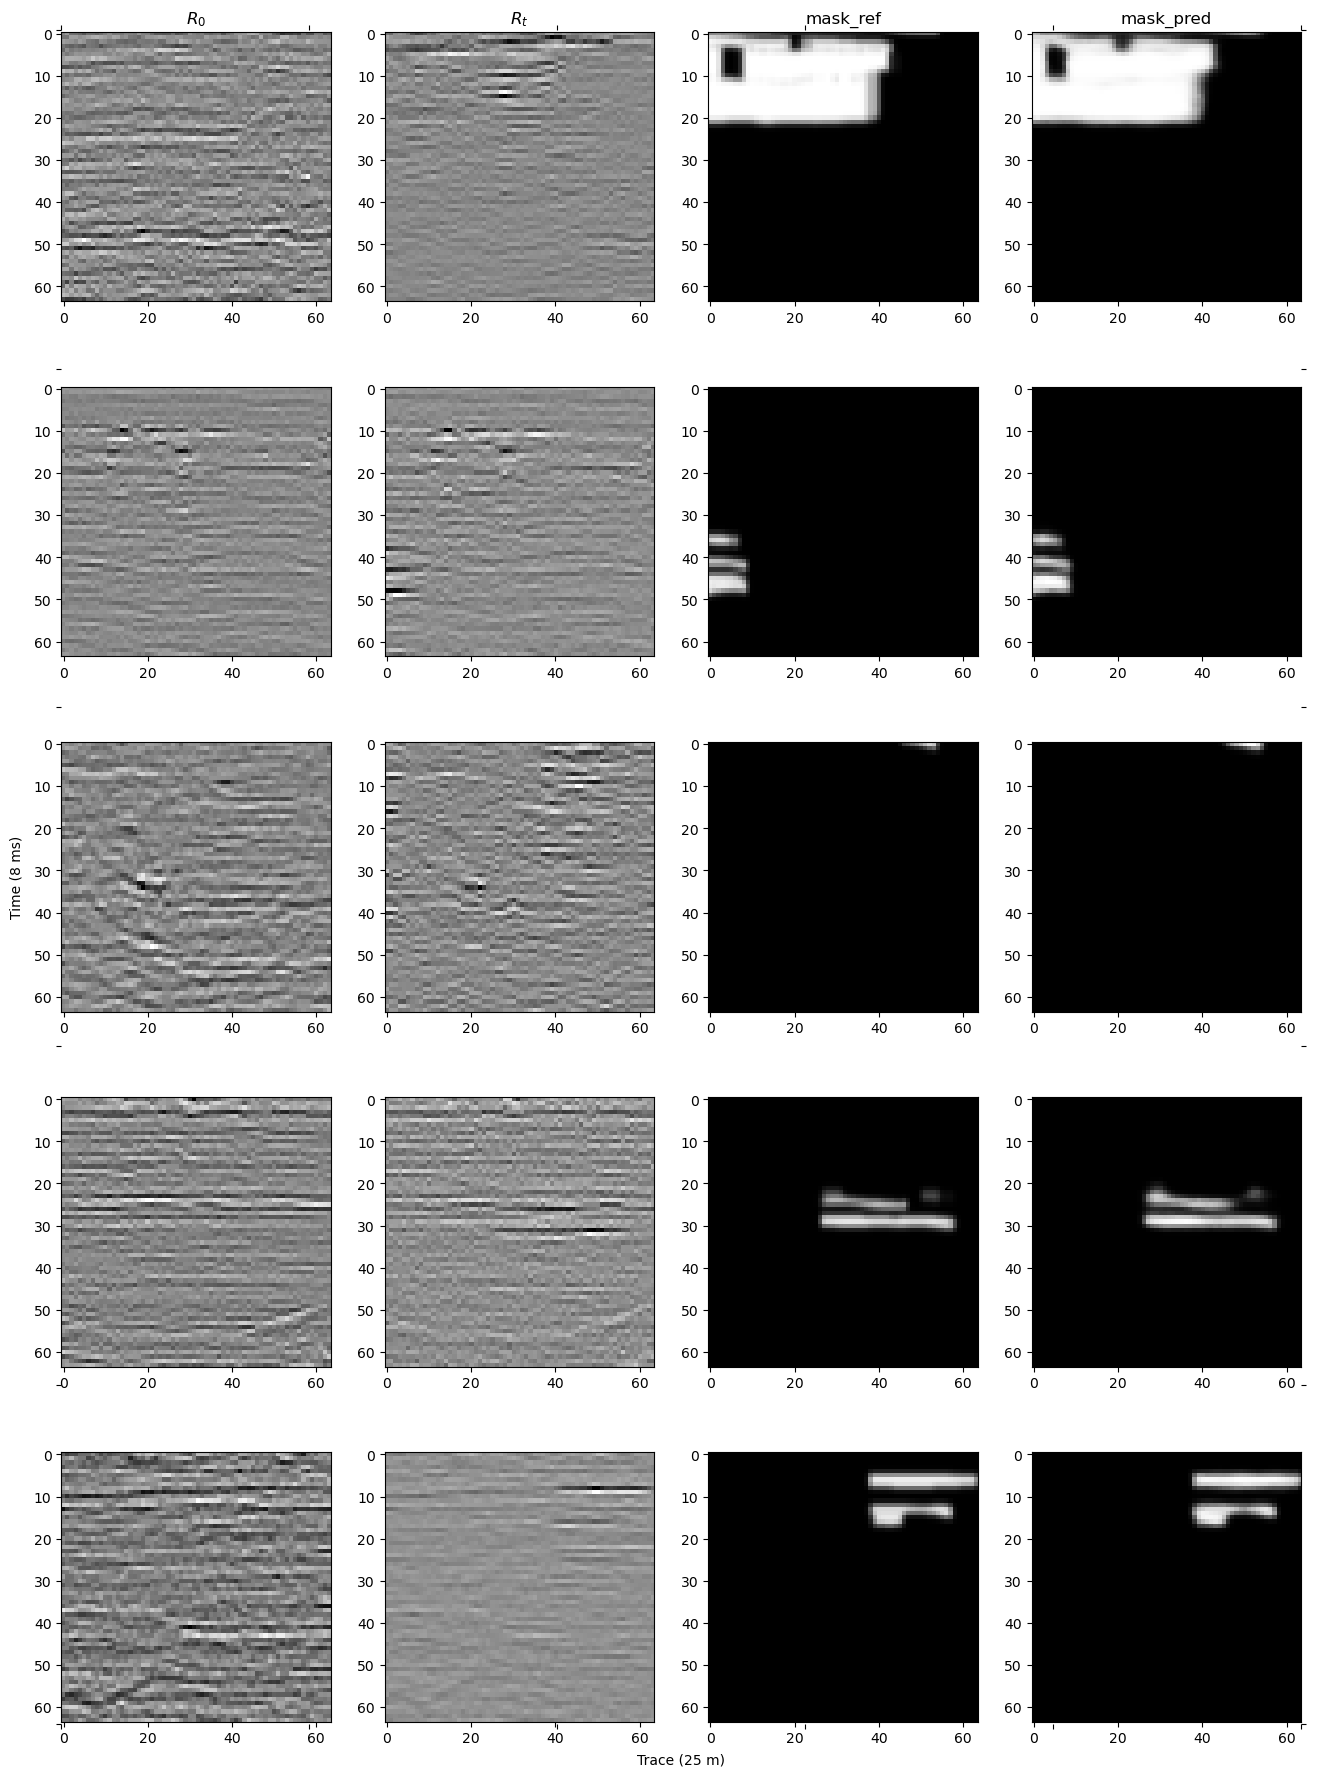

Start validating for epoch No. 160
Mean validating loss for epoch No. 160: 0.051095910370349884
Validating patch samples display at epoch No. 160


<Figure size 640x480 with 0 Axes>

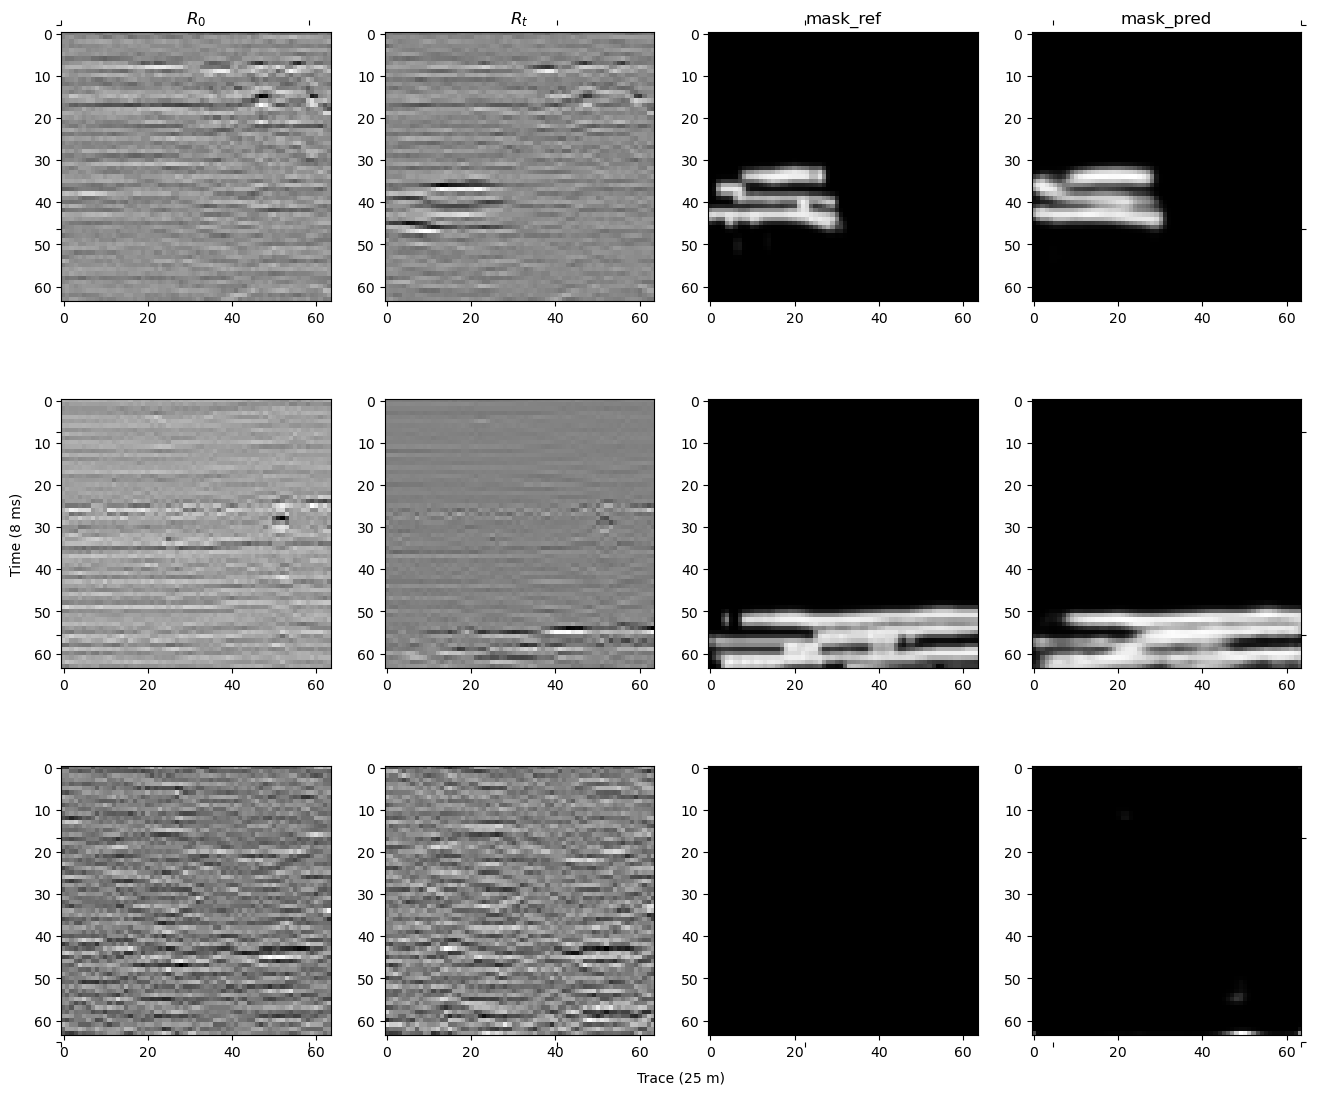

Epoch No.: 161
Batch No. 0--------------------
Batch No. 10--------------------
Batch No. 20--------------------
Batch No. 30--------------------
Batch No. 40--------------------
Mean training loss for epoch No. 161: 0.03115414150059223
Start validating for epoch No. 161
Mean validating loss for epoch No. 161: 0.05190290883183479
Epoch No.: 162
Batch No. 0--------------------
Batch No. 10--------------------
Batch No. 20--------------------
Batch No. 30--------------------
Batch No. 40--------------------
Mean training loss for epoch No. 162: 0.031139256954193114
Start validating for epoch No. 162
Mean validating loss for epoch No. 162: 0.051844630390405655
Epoch No.: 163
Batch No. 0--------------------
Batch No. 10--------------------
Batch No. 20--------------------
Batch No. 30--------------------
Batch No. 40--------------------
Mean training loss for epoch No. 163: 0.031161862313747405
Start validating for epoch No. 163
Mean validating loss for epoch No. 163: 0.0522143580019474
Ep

<Figure size 640x480 with 0 Axes>

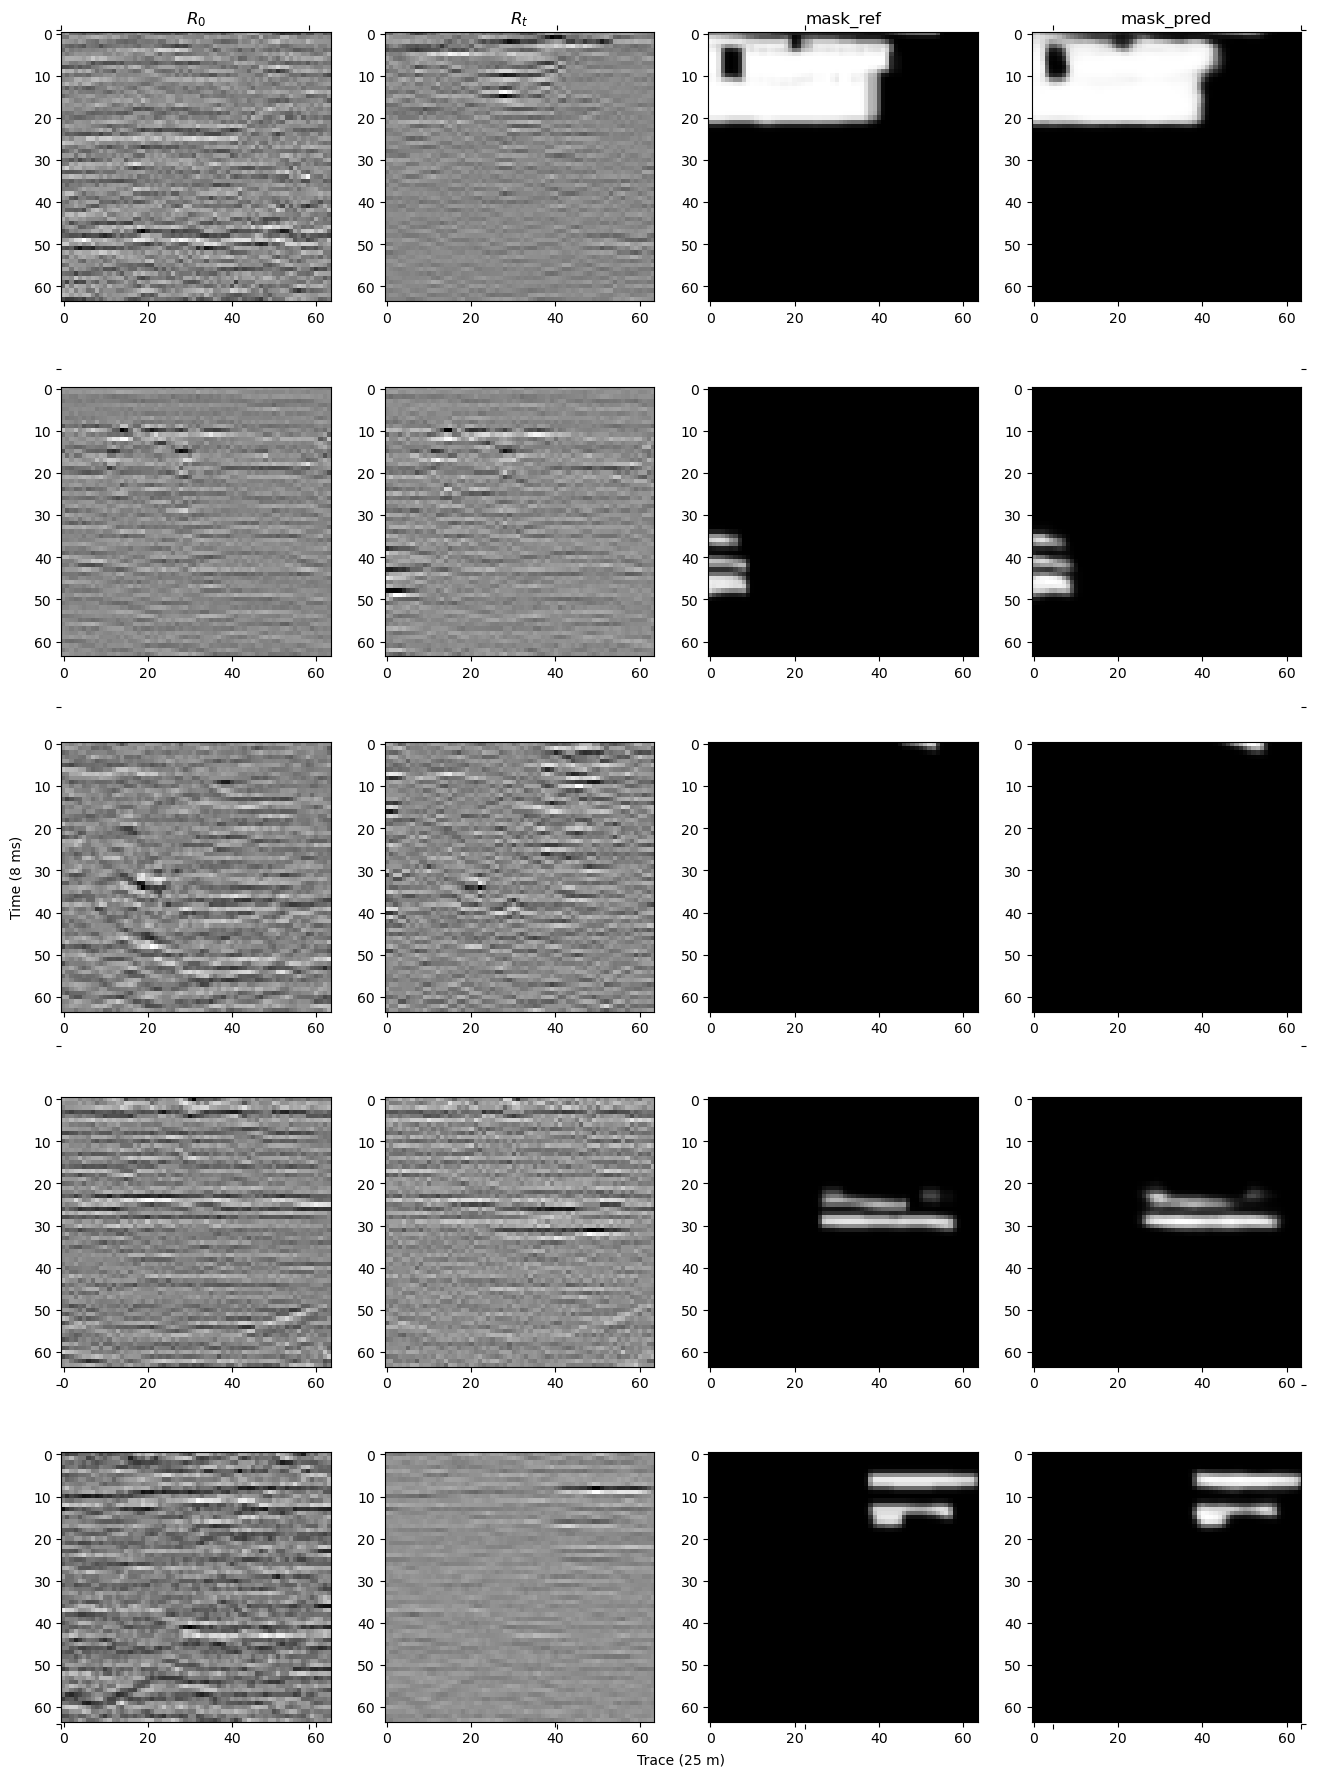

Start validating for epoch No. 180
Mean validating loss for epoch No. 180: 0.049697231501340866
Validating patch samples display at epoch No. 180


<Figure size 640x480 with 0 Axes>

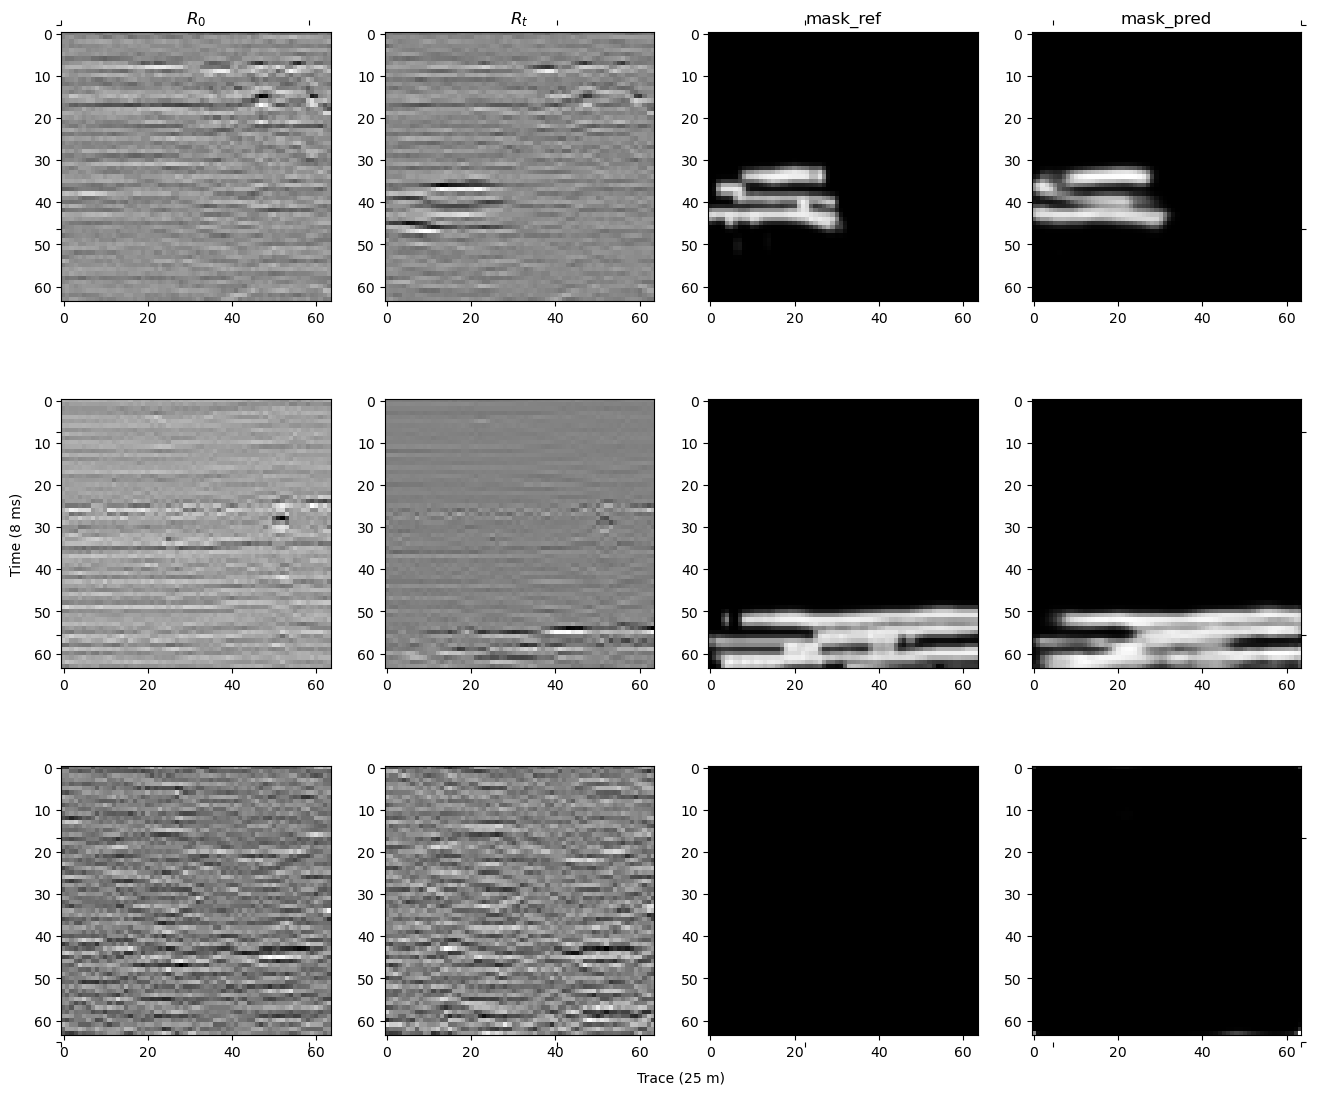

Epoch No.: 181
Batch No. 0--------------------
Batch No. 10--------------------
Batch No. 20--------------------
Batch No. 30--------------------
Batch No. 40--------------------
Mean training loss for epoch No. 181: 0.03141832929104567
Start validating for epoch No. 181
Mean validating loss for epoch No. 181: 0.05011545494198799
Epoch No.: 182
Batch No. 0--------------------
Batch No. 10--------------------
Batch No. 20--------------------
Batch No. 30--------------------
Batch No. 40--------------------
Mean training loss for epoch No. 182: 0.031264348831027744
Start validating for epoch No. 182
Mean validating loss for epoch No. 182: 0.05010053887963295
Epoch No.: 183
Batch No. 0--------------------
Batch No. 10--------------------
Batch No. 20--------------------
Batch No. 30--------------------
Batch No. 40--------------------
Mean training loss for epoch No. 183: 0.0311636870354414
Start validating for epoch No. 183
Mean validating loss for epoch No. 183: 0.05006979778409004
Epoc

<Figure size 640x480 with 0 Axes>

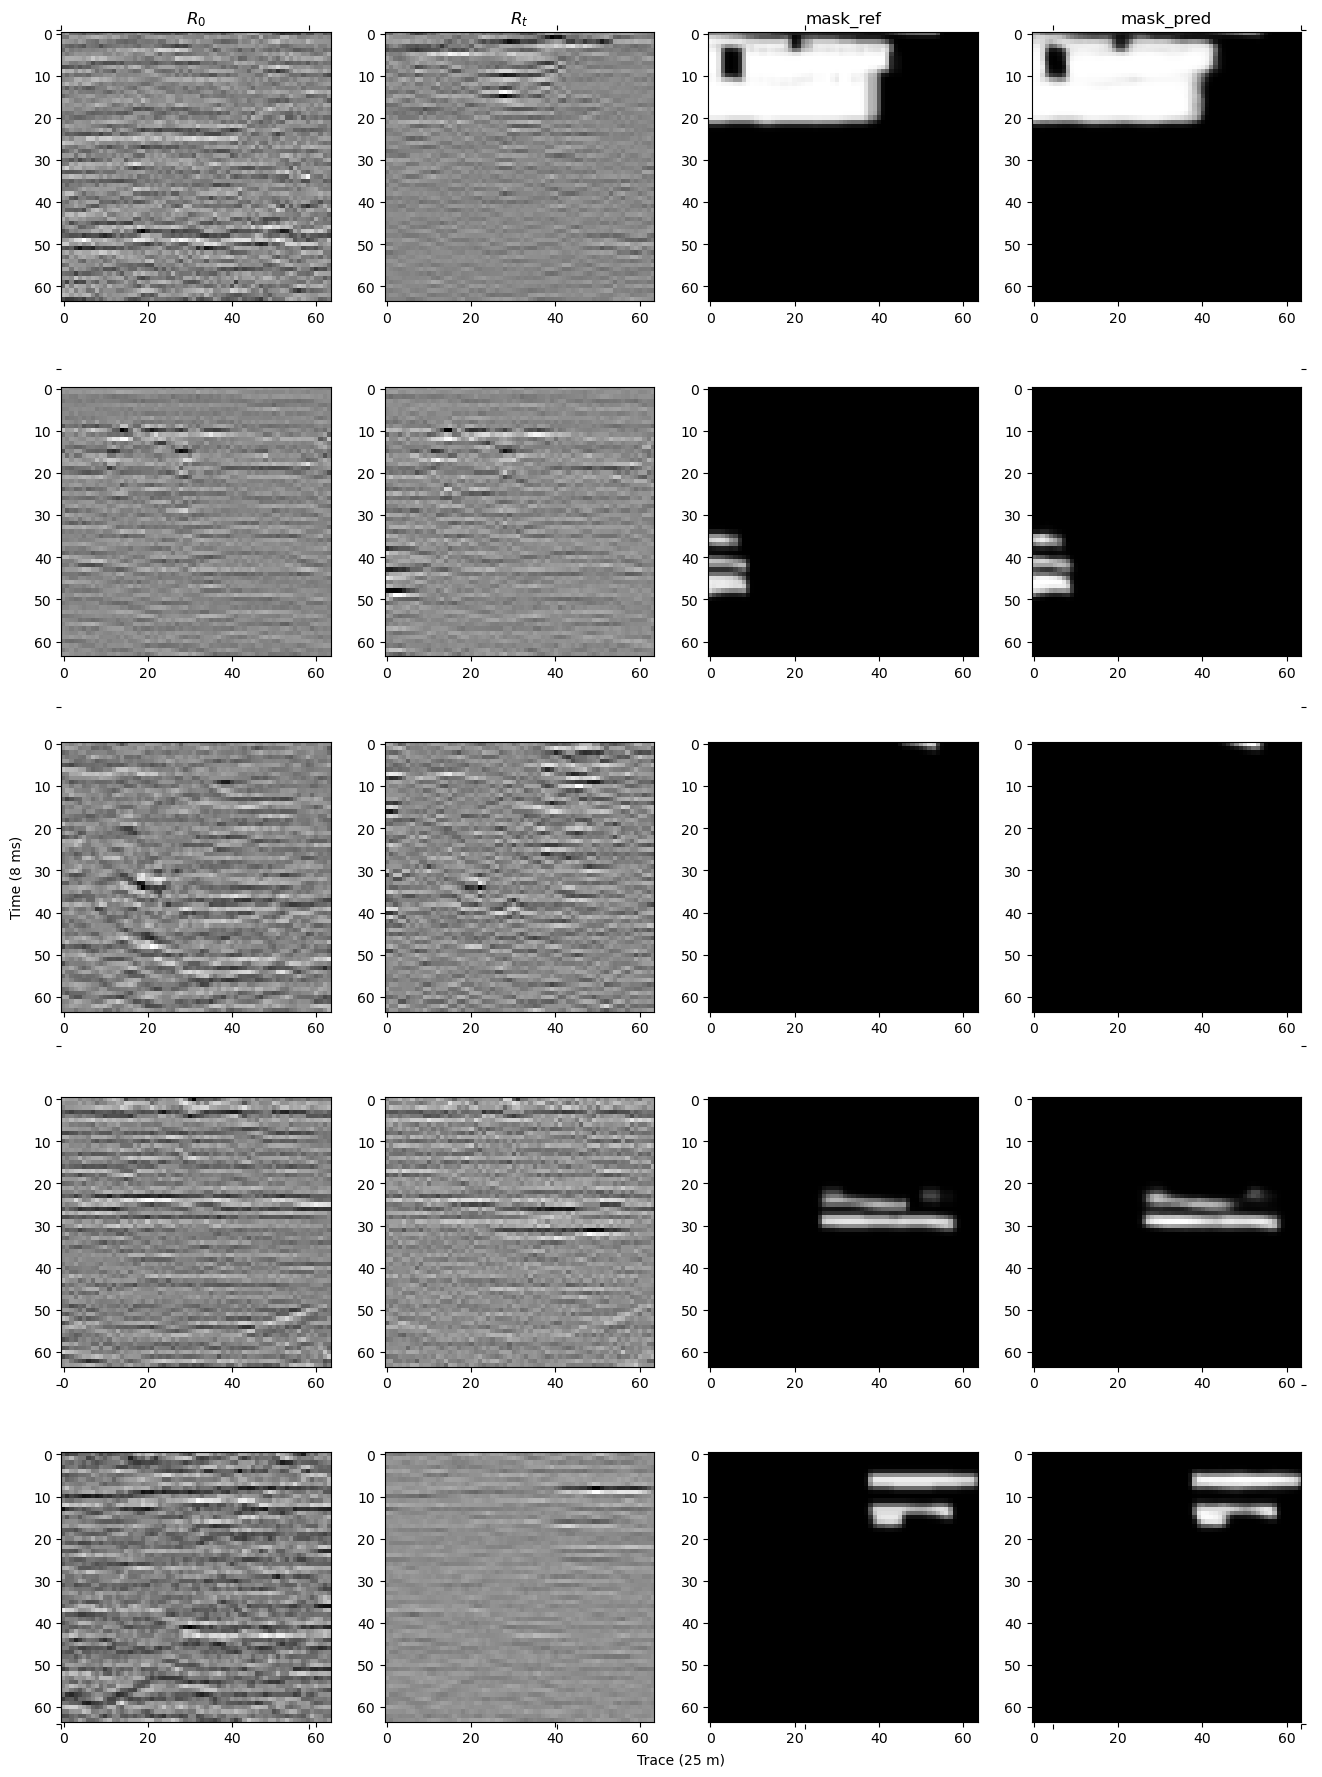

Start validating for epoch No. 199
Mean validating loss for epoch No. 199: 0.05068732053041458
Validating patch samples display at epoch No. 199


<Figure size 640x480 with 0 Axes>

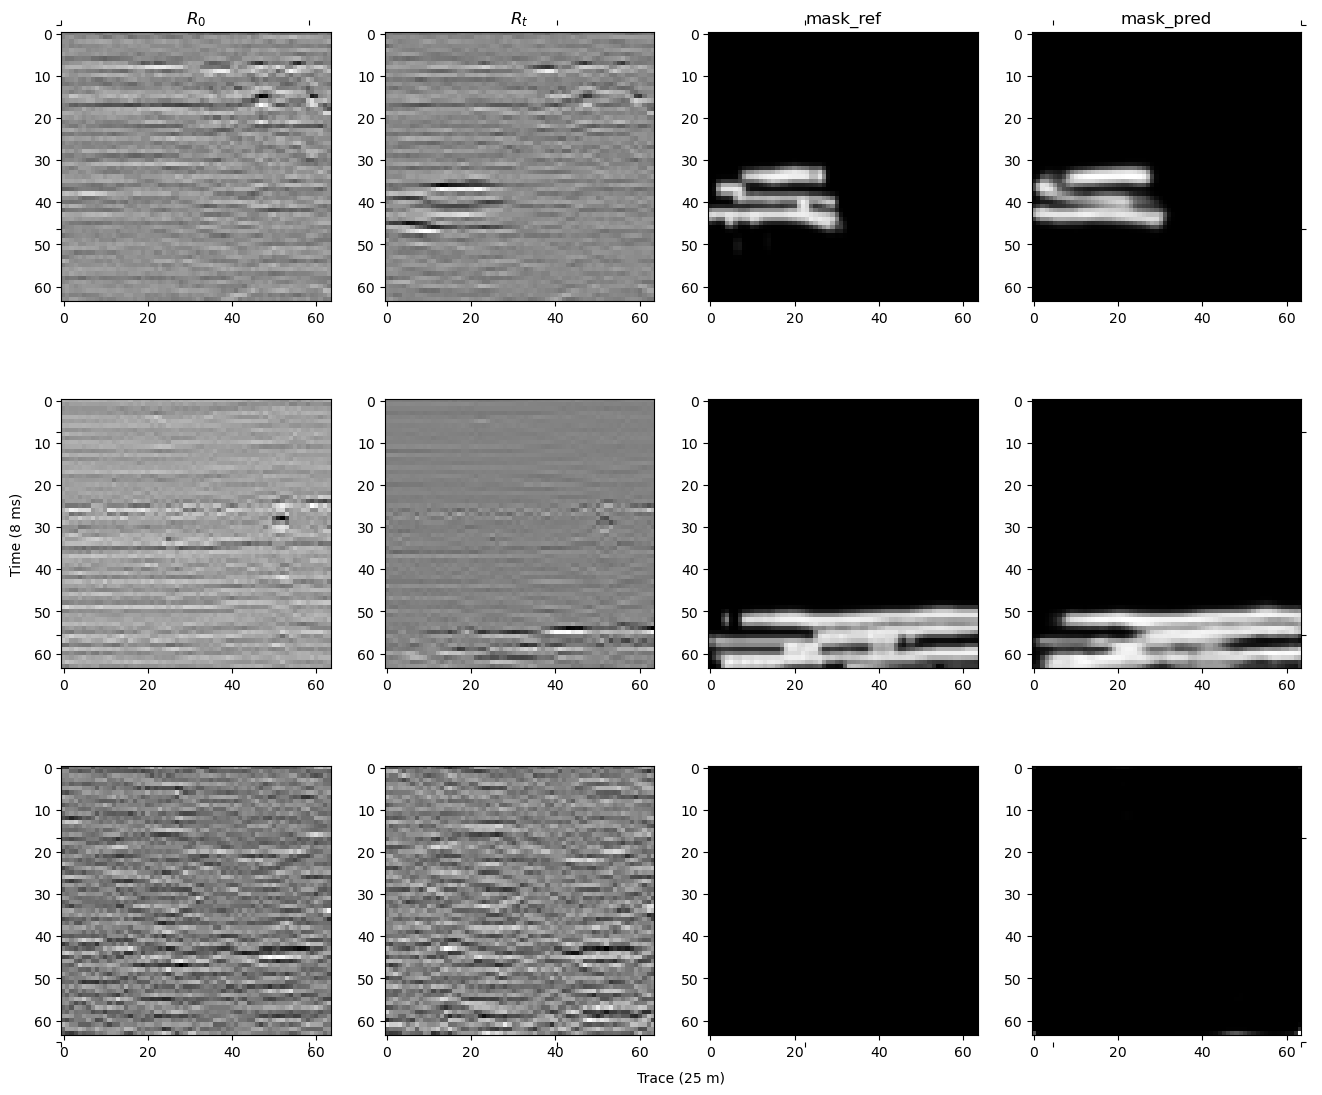

In [14]:
import os
os.makedirs(os.path.dirname(path_net), exist_ok=True)
for run in RunBuilder.get_runs(params):
    # initialize network
    nw = 2
    network = CO2mask()
    
    # inherit from previous train network
    #network.load_state_dict(torch.load(path_bestnet,map_location=cpu_device))
    #network = network.train()

    if cuda_gpu:
        network = torch.nn.DataParallel(network, device_ids=gpus).cuda()
        nw = 0
    # train_set loader
    loader_train = DataLoader(
        train
        ,batch_size = run.batch_size
        ,shuffle = run.shuffle
        ,num_workers = nw
        ,drop_last = False)
    # valid_set loader (load the entire dataset as a single batch)
    loader_valid = DataLoader(
         valid
        ,batch_size = Nvalid
        ,shuffle = False
        ,num_workers = nw
        ,drop_last = False)
    
    # define the initial optimizer as adadelta
    optimizer = optim.Adadelta(network.parameters())

    # initialize training and validation loss lists
    TrLoss_list = []
    VaLoss_list = []
    Bloss = float('inf') # initial smallest loss
    Bloss_epNo = 0 # intial smallest loss corresponding epoch No.
    
    # begin this training run
    M.begin_run(run, network, loader_train)
    for epoch in range(run.epoch_num):
        print(f'Epoch No.: {epoch}')
        # initialize runner
        M.begin_epoch()
        batch_id=0
        Loss = 0
        
        # adjust learning rate
        #adjust_learning_rate(optimizer, epoch, run.lr)
        
        # initialize sampled prediction arrays
        Trpred = np.zeros((ndis_tr,rs[0],rs[1]))
        Vapred = np.zeros((ndis_va,rs[0],rs[1]))
        
        if epoch == run.adadelta_num:
            # redefine the optimizer as adam 
            optimizer = optim.Adam(network.parameters(),run.lr)

        # loop through different batches in training dataset
        Loss = 0 # initial loss
        Np = 0 # number of patches
        C = 0 # batch No.
        for batch in loader_train:
            if C%batch_itv == 0:
                print(f'Batch No. {C}--------------------')
            C += 1
            R0t, Mask, idx = batch
            # find the indices of sampled training patches in current batch for later display
            bs = len(idx)
            Np += bs
            Idx = idx.tolist()
            cp = findtrace(train_id_list,Idx)
            # copy cpu data on GPU
            if cuda_gpu:
                R0t = R0t.cuda()
                Mask = Mask.cuda()
            # forward modeling
            pMask = network(R0t)
            
            # record the sampled training patches for later display
            for c,p in cp:
                Trpred[c] = pMask[p][0].cpu().detach().numpy()
            # validating loss
            loss = F.binary_cross_entropy(pMask, Mask)
            #loss = BBCE(pMask, Mask)
            # backward for gradient
            optimizer.zero_grad()
            loss.backward()
            # update NN
            optimizer.step()
            # track the loss
            Loss = track_loss_out(Loss,loss,bs)

        # record the mean loss for the entire training dataset
        TrLoss_list.append(Loss/Np)
        print(f'Mean training loss for epoch No. {epoch}: {Loss/Np}')
        # display the sampled patch fitting in training dataset
        if (epoch%epoch_itv == 0) or (epoch == run.epoch_num-1):
            print(f'Training patch samples display at epoch No. {epoch}')
            pst.view2d(Trpred)
        
        # save the current-epoch training network
        torch.save(network.module.state_dict(),path_net)
        
        r'''
        (for cpu validating)
        # Load saved validating network on cpu
        networkvalid = CO2mask()
        networkvalid.load_state_dict(torch.load(path_net,map_location=cpu_device))
        '''
        
        networkvalid = network.eval()
        print(f'Start validating for epoch No. {epoch}')
        # loop through different batches in valid dataset
        Loss = 0 # initial loss
        Np = 0 # number of patches
        for batch in loader_valid:
            R0t, Mask, idx = batch
            # find the indices of sampled validating patches in current batch for later display
            bs = len(idx)
            Np += bs
            Idx = idx.tolist()
            cp = findtrace(valid_id_list,Idx)
            # copy cpu data on GPU
            if cuda_gpu:
                R0t = R0t.cuda()
                Mask = Mask.cuda()
            # forward modeling
            with torch.no_grad():
                pMask = networkvalid(R0t)
            # record the sampled validating patches for later display
            for c,p in cp:
                Vapred[c] = pMask[p][0].detach().cpu().numpy()   
            # valid loss
            loss = F.binary_cross_entropy(pMask, Mask)
            #loss = BBCE(pMask, Mask)
            # track the loss
            Loss = track_loss_out(Loss,loss,bs)

        # record the mean loss for the entire validating dataset
        VaLoss_list.append(Loss/Np)
        print(f'Mean validating loss for epoch No. {epoch}: {Loss/Np}')
        if epoch>0:
            if VaLoss_list[-1] < Bloss:
                # save the currently best network (providing smallest validating loss)
                torch.save(network.module.state_dict(),path_bestnet)
                Bloss = VaLoss_list[-1]
                Bloss_epNo = epoch
                
        # display the validating result
        if (epoch%epoch_itv == 0) or (epoch == run.epoch_num-1):    
            print(f'Validating patch samples display at epoch No. {epoch}')
            psv.view2d(Vapred)

In [15]:
te = time.time()

In [16]:
print(f'Training time: {te-ts} s')

Training time: 521.9608228206635 s


(0.0, 0.5)

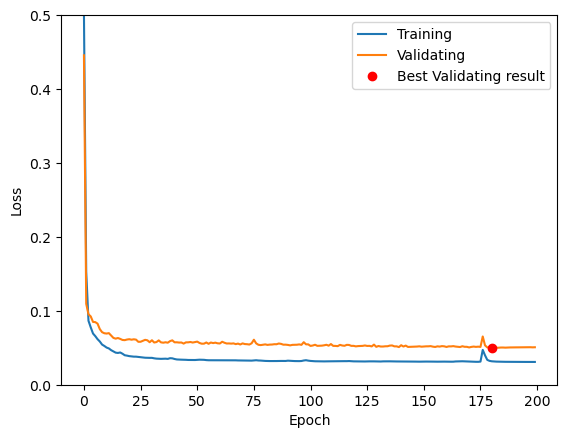

In [17]:
# plot the training and validating loss
epoch = np.arange(run.epoch_num)
fig,ax = plt.subplots(1,1)
ax.plot(epoch,TrLoss_list,label='Training')
ax.plot(epoch,VaLoss_list,label='Validating')
ax.plot(Bloss_epNo,Bloss,'ro',label='Best Validating result')
ax.legend()
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_ylim(0,0.5)

In [18]:
np.array(TrLoss_list,dtype=np.float32).tofile(f'../resources/NNpred2D/train_loss.dat')

In [19]:
np.array(VaLoss_list,dtype=np.float32).tofile(f'../resources/NNpred2D/valid_loss.dat')

## Perform testing

In [20]:
fn = '../define_path.txt'
with open(fn) as f:
    lines = f.readlines()
for idx, line in enumerate(lines):
    if idx == 1:
        dir_co2 = line.split('=')[1][:-1]
    if idx == 15:
        testpath = line.split('=')[1][:-1]

### define the network and basic information for testing

In [21]:
# testing datasets
yearlist = ['1999_b01_t01','2001_b01_t01',
            '2004_b01_t07','2006_b01_t07',
            '2008_b01_t08',
            '2010_b01_t10','2010_b01_t11','2010_b10_t10','2010_b10_t11']

In [22]:
# reference dataset grid path
xydfn = f'{dir_co2}/10p10/data/10p10nea.sgy'
# load the reference dataset head
Dr = dataload(fn=xydfn)
DD = (Dr.nx,Dr.ny,Dr.nt)

Total trace number: 150909
Sample number along each trace: 1001
Sampling interval along each trace: 0.002 s
data arrangement: 269 (number of ensembles) x 561 (trace number per ensemble) x 1001 (sample number per trace)


In [23]:
# network path
path_bestnet = f'../resources/NNpred2D/co2_identify.pt'
gpus = [0]
cuda_gpu = True

In [24]:
# load the network
networktest = CO2mask()
networktest.load_state_dict(torch.load(path_bestnet,map_location=torch.device('cpu')))
networktest = networktest.eval()
if cuda_gpu:
    networktest = torch.nn.DataParallel(networktest, device_ids=gpus).cuda()
    nw = 0
networktest = networktest.eval()

/tmp/ipykernel_1194044/3059158192.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  networktest.load_state_dict(torch.load(path_bestnet,map_location=torch.device('cpu')))


In [25]:
# fixed dataset information file names
pmf = 'pm_info.json'
pdf = 'patch_info.csv'
# batch_size of testing dataset
bs = 1000
# sampling number for patch display
ndis_ts = 3

In [26]:
# reference mask dataset for training and validating
mkfn = f'../resources/label/masks.dat'
# readin CO2 mask
masks = np.fromfile(f'{mkfn}',dtype=np.float32)
masks = np.reshape(masks,DD)
# find the slice indices for display
MI = np.argmax(np.sum(masks,axis=(1,2)))
MX = np.argmax(np.sum(masks,axis=(0,2)))
MT = np.argmax(np.sum(masks,axis=(0,1)))
MIXT = (MI,MX,MT)

### start to test dataset for all years

Testing year: 1999_b01_t01
Testing dataset size: 18168
test_id_list for 1999_b01_t01: [ 4542  9084 13626]


<Figure size 640x480 with 0 Axes>

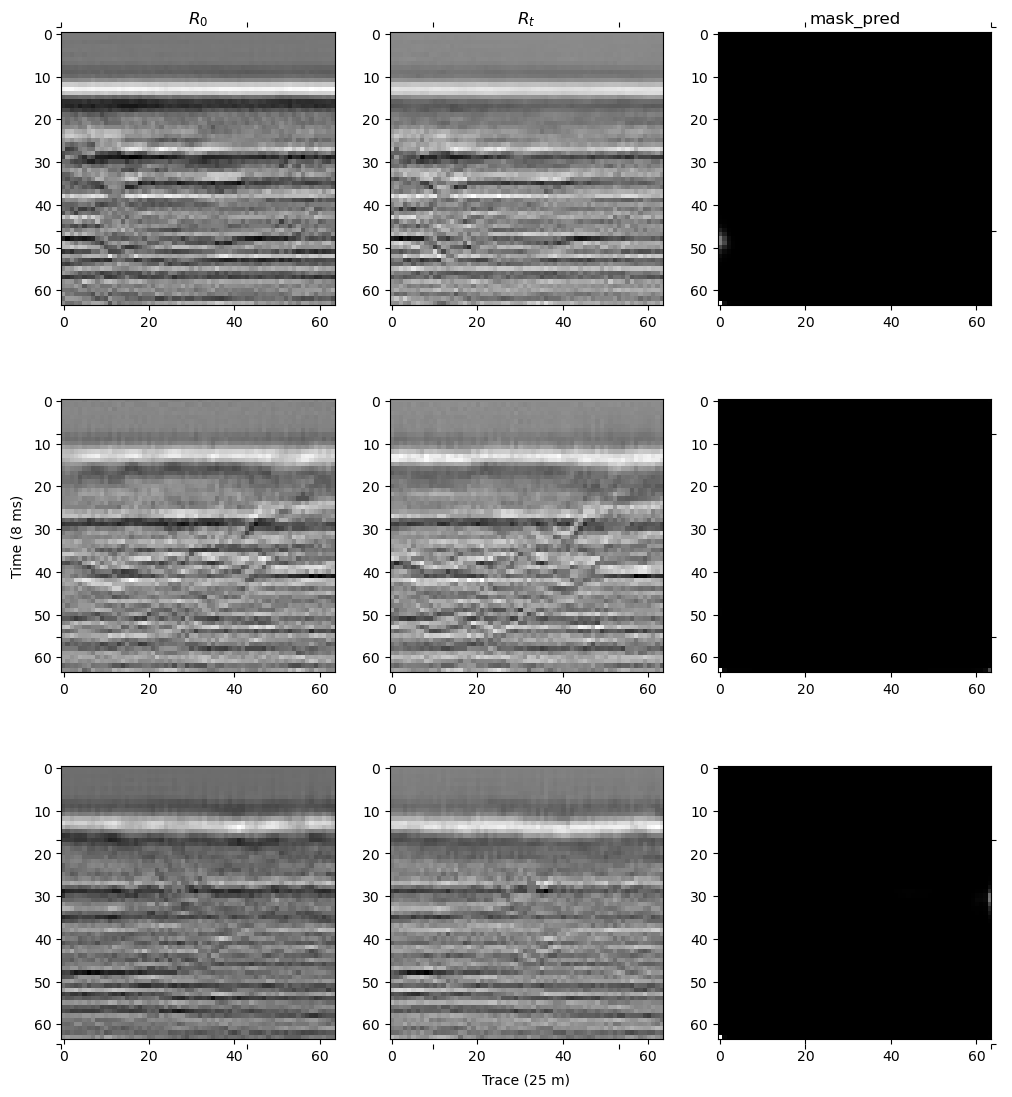

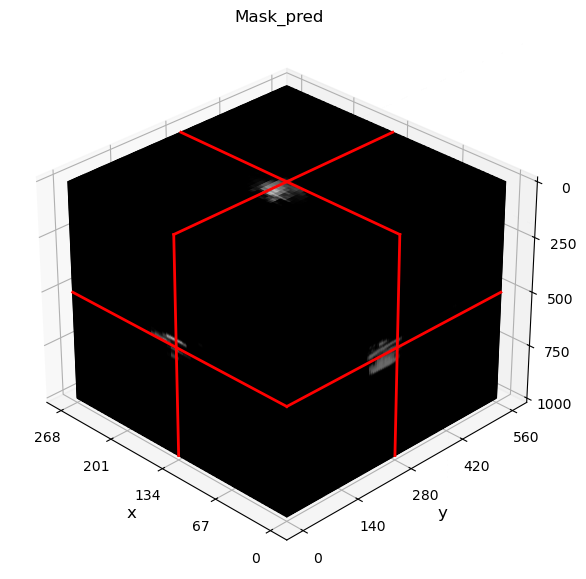

Horizontal slice Artifact above 600 ms for 1999_b01_t01:


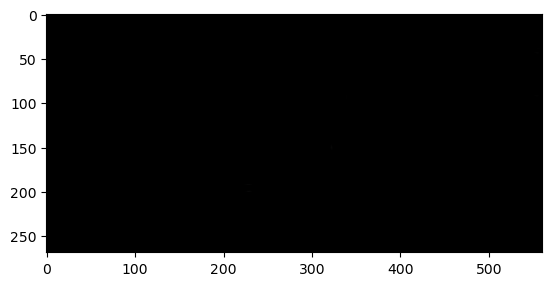

Horizontal slice Artifact below 1200 ms for 1999_b01_t01:


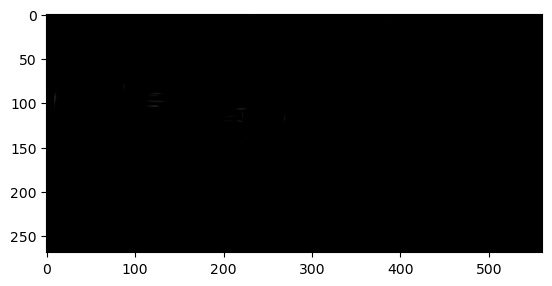

Inline assemble No. 134 for 1999_b01_t01:


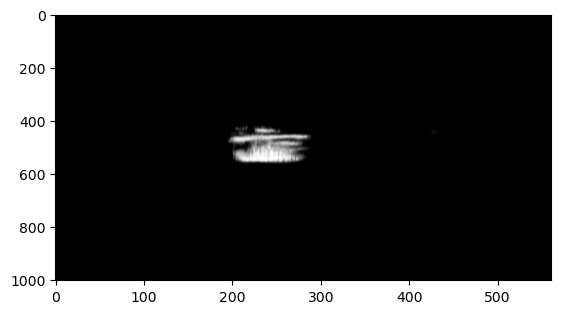

Testing year: 2001_b01_t01
Testing dataset size: 18168
test_id_list for 2001_b01_t01: [ 4542  9084 13626]


<Figure size 640x480 with 0 Axes>

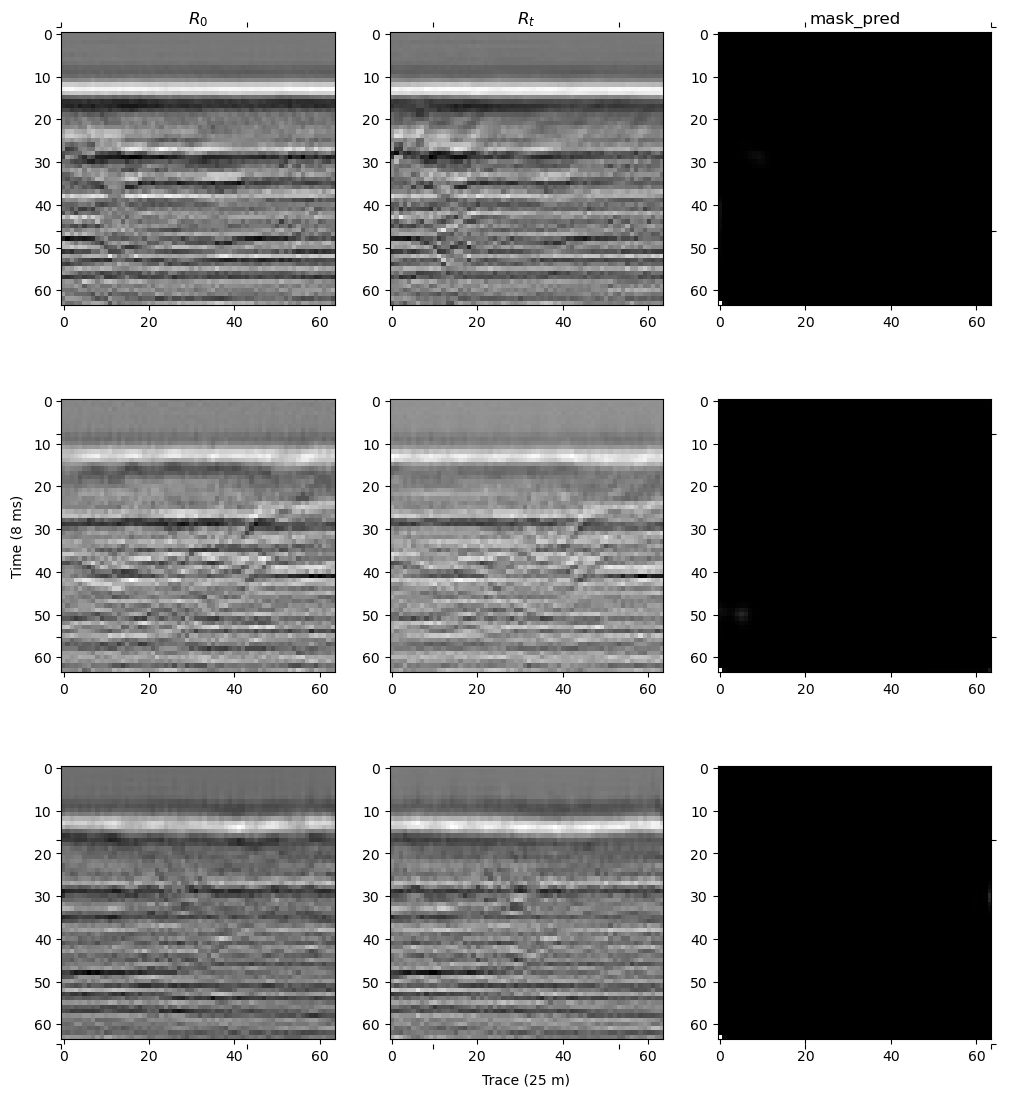

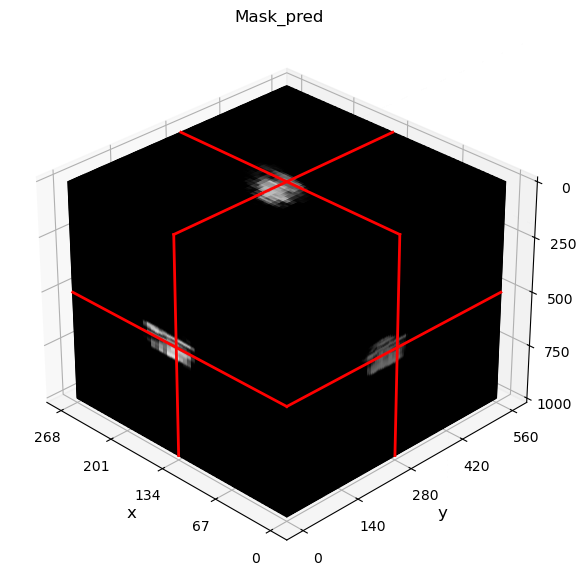

Horizontal slice Artifact above 600 ms for 2001_b01_t01:


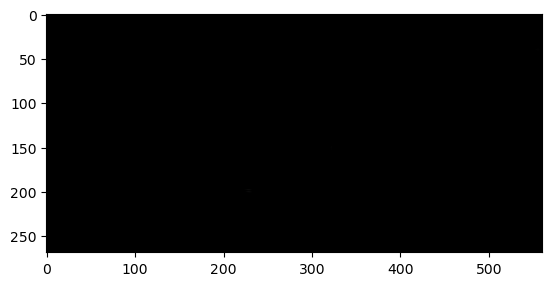

Horizontal slice Artifact below 1200 ms for 2001_b01_t01:


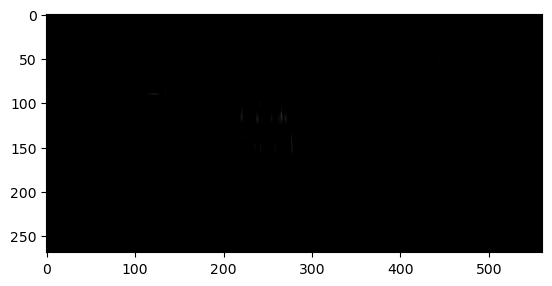

Inline assemble No. 134 for 2001_b01_t01:


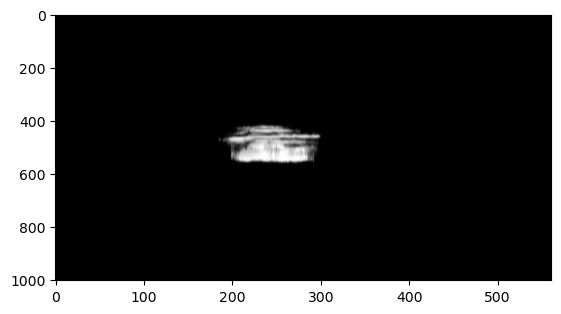

Testing year: 2004_b01_t07
Testing dataset size: 18168
test_id_list for 2004_b01_t07: [ 4542  9084 13626]


<Figure size 640x480 with 0 Axes>

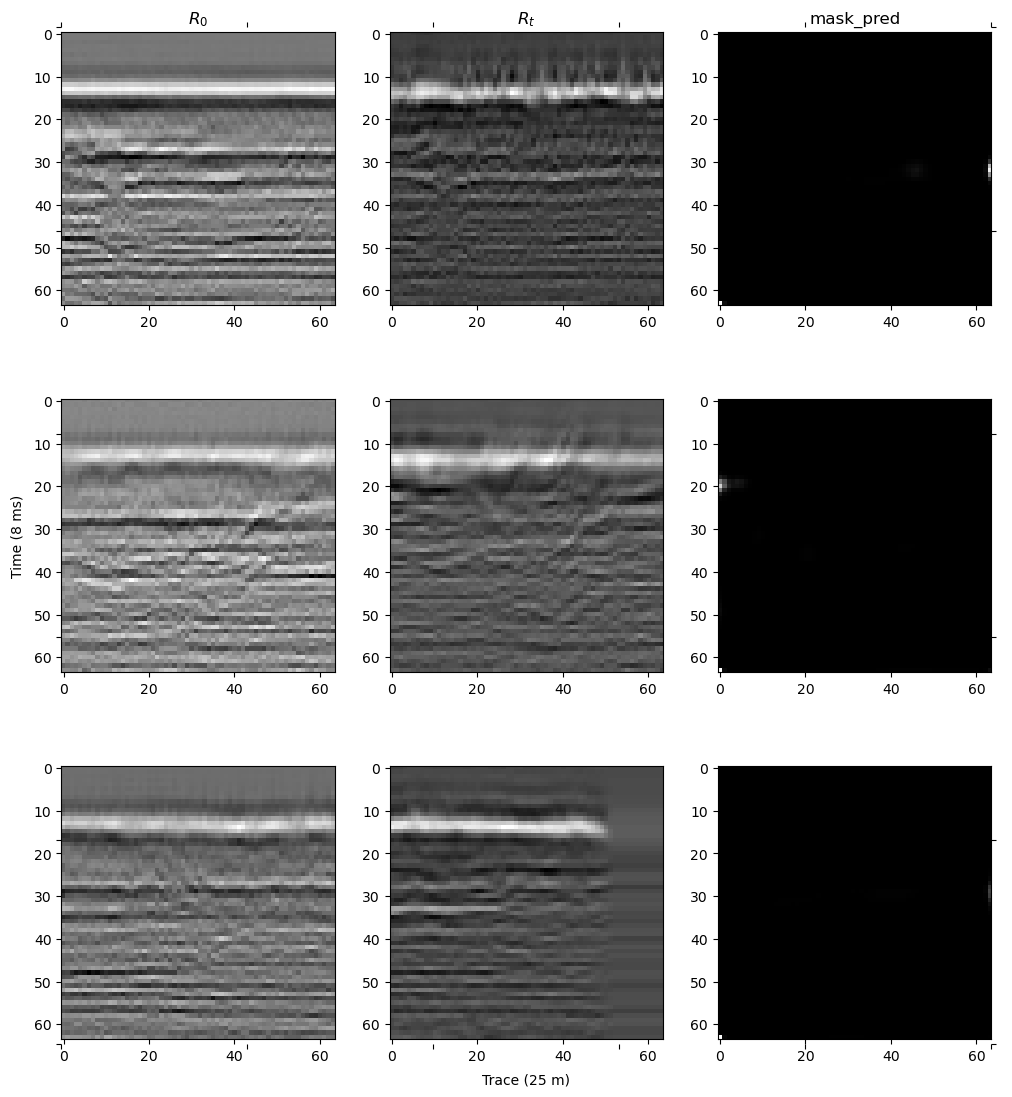

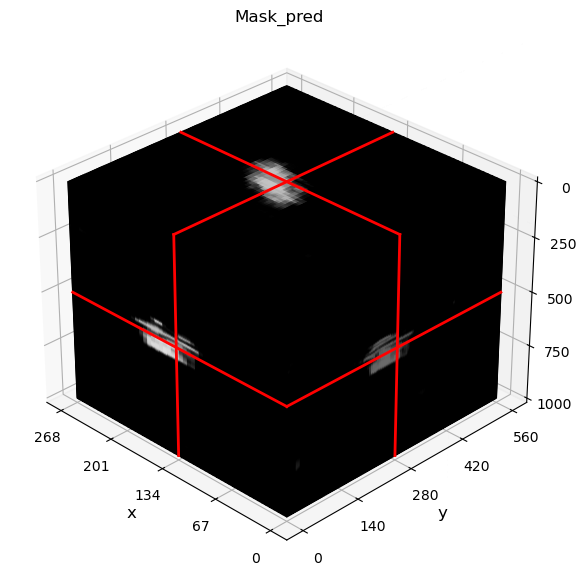

Horizontal slice Artifact above 600 ms for 2004_b01_t07:


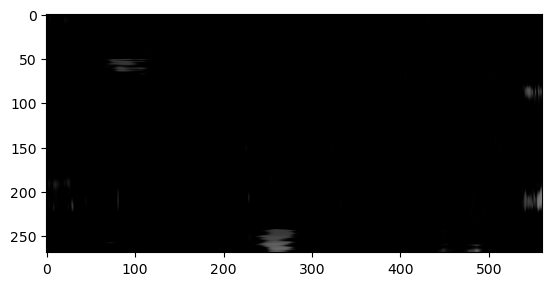

Horizontal slice Artifact below 1200 ms for 2004_b01_t07:


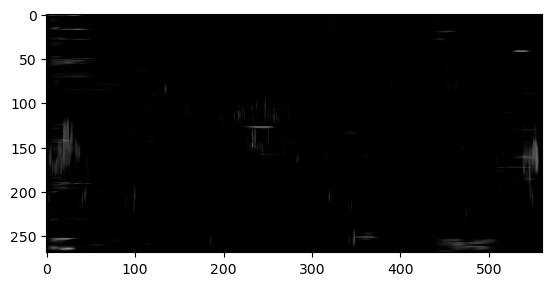

Inline assemble No. 134 for 2004_b01_t07:


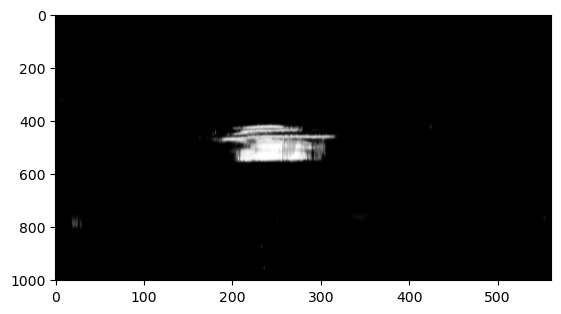

Testing year: 2006_b01_t07
Testing dataset size: 18168
test_id_list for 2006_b01_t07: [ 4542  9084 13626]


<Figure size 640x480 with 0 Axes>

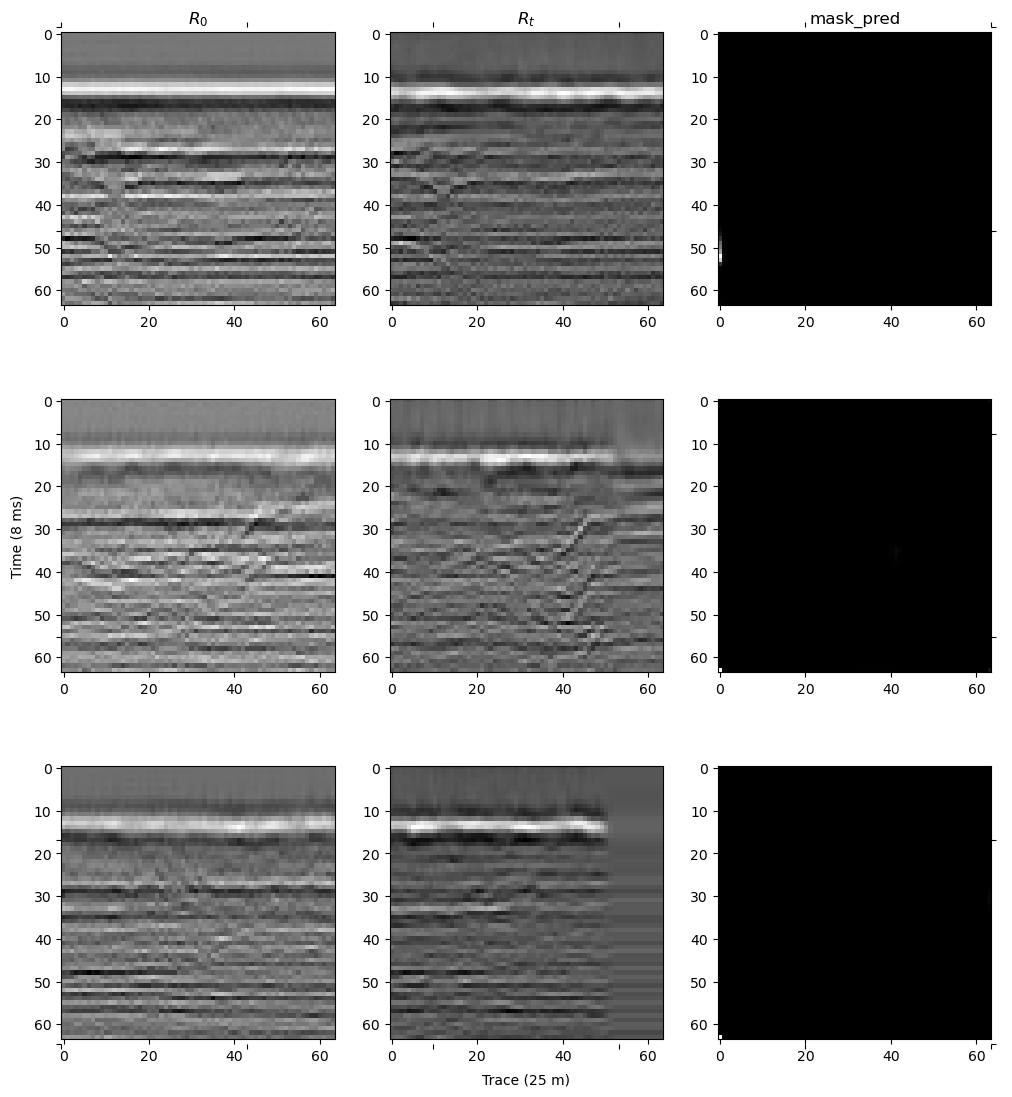

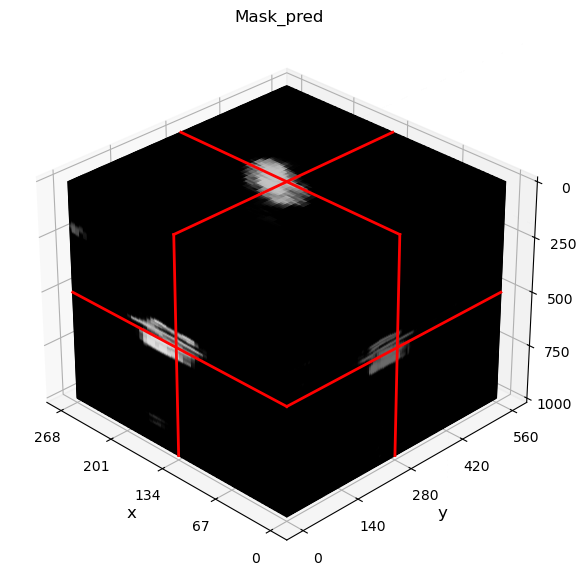

Horizontal slice Artifact above 600 ms for 2006_b01_t07:


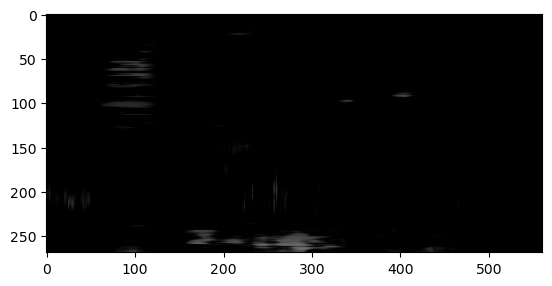

Horizontal slice Artifact below 1200 ms for 2006_b01_t07:


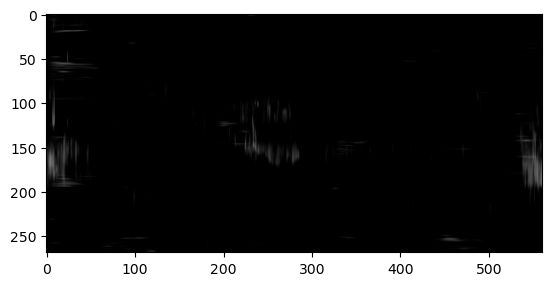

Inline assemble No. 134 for 2006_b01_t07:


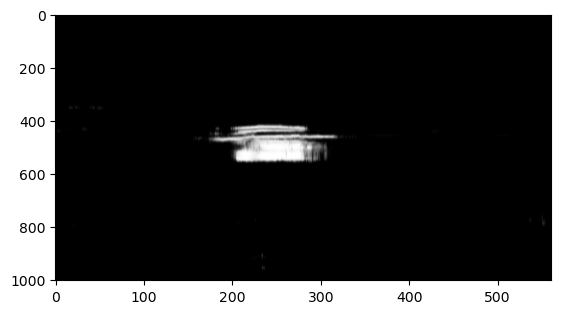

Testing year: 2008_b01_t08
Testing dataset size: 18168
test_id_list for 2008_b01_t08: [ 4542  9084 13626]


<Figure size 640x480 with 0 Axes>

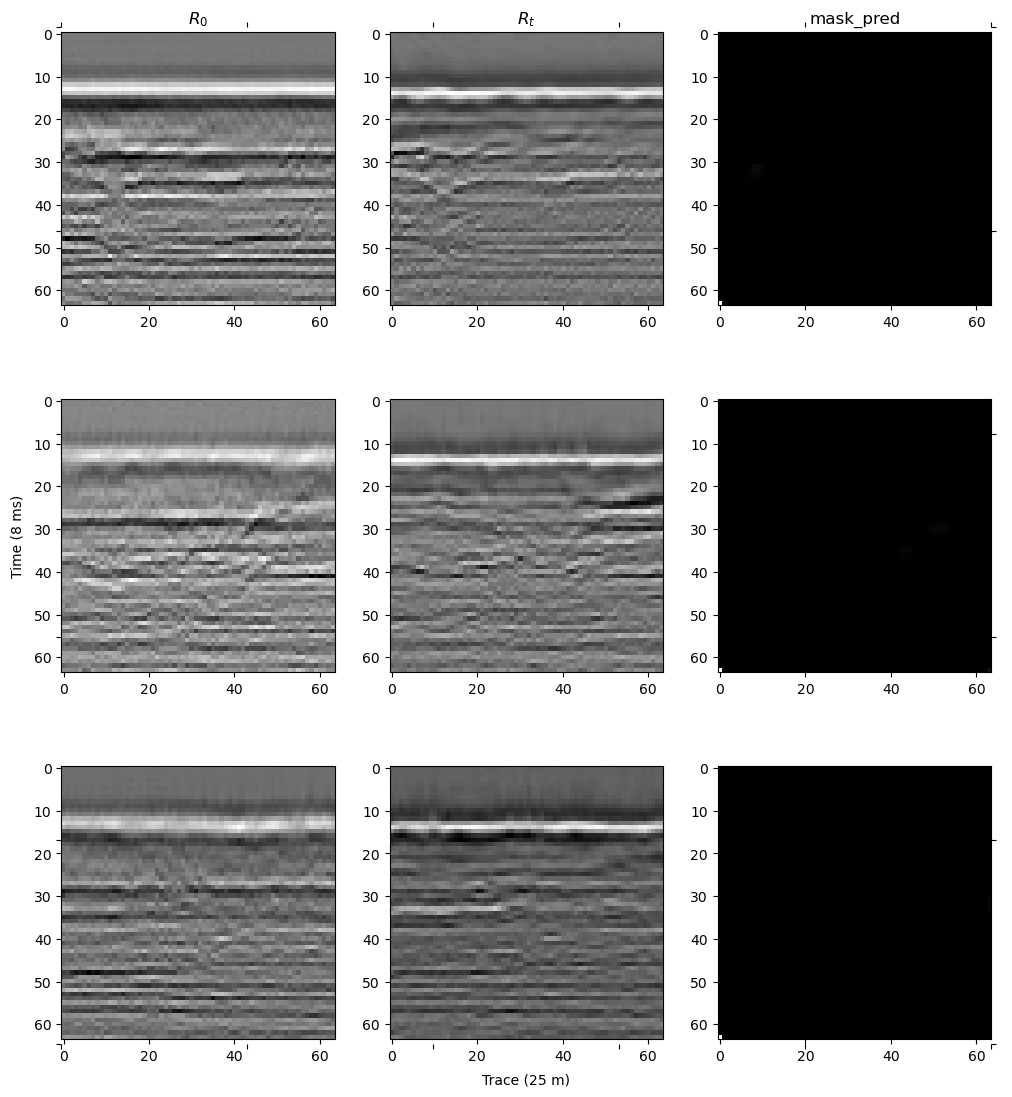

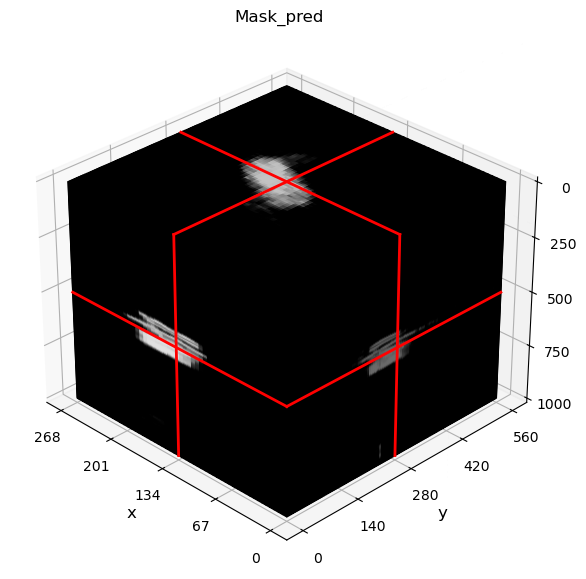

Horizontal slice Artifact above 600 ms for 2008_b01_t08:


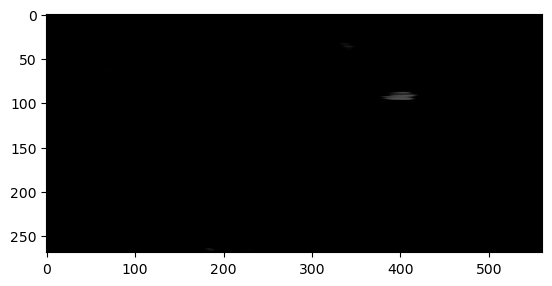

Horizontal slice Artifact below 1200 ms for 2008_b01_t08:


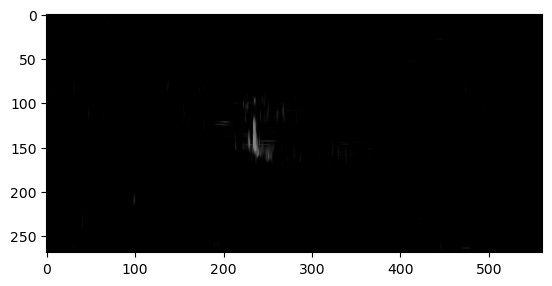

Inline assemble No. 134 for 2008_b01_t08:


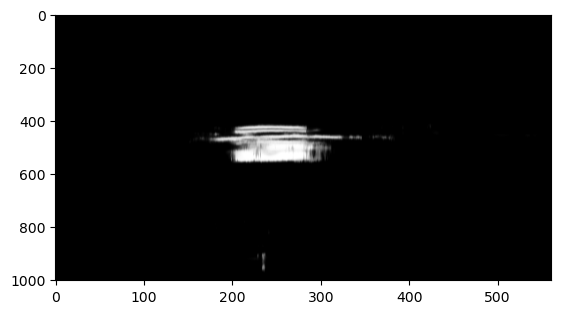

Testing year: 2010_b01_t10
Testing dataset size: 18168
test_id_list for 2010_b01_t10: [ 4542  9084 13626]


<Figure size 640x480 with 0 Axes>

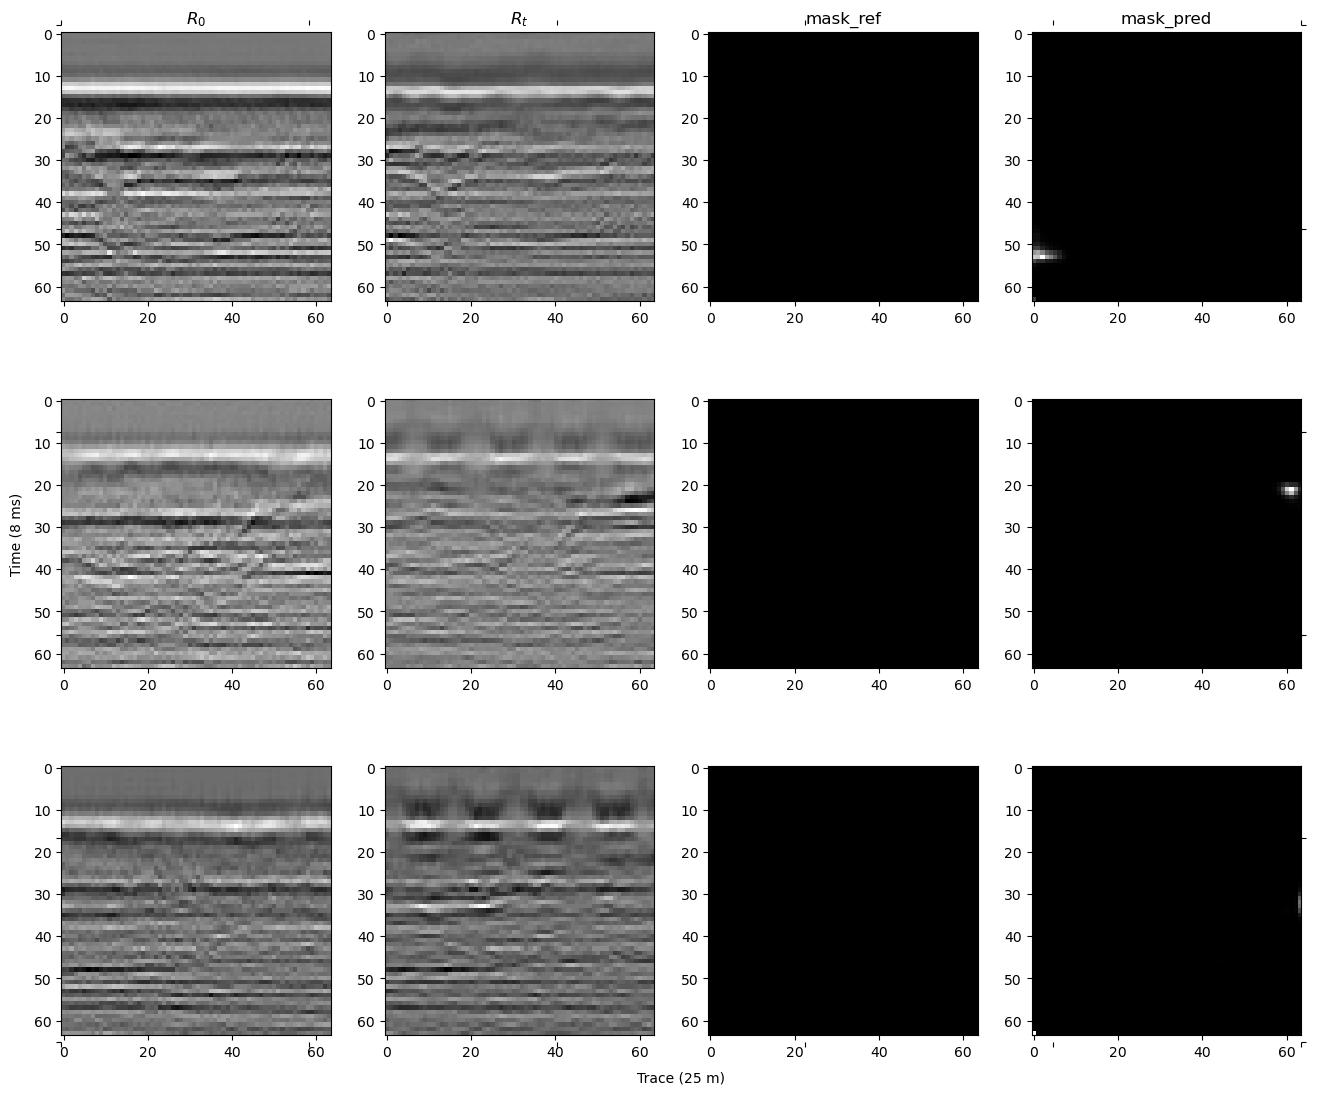

The prediction BCE loss for 2010_b01_t10 is 0.007472691126167774!


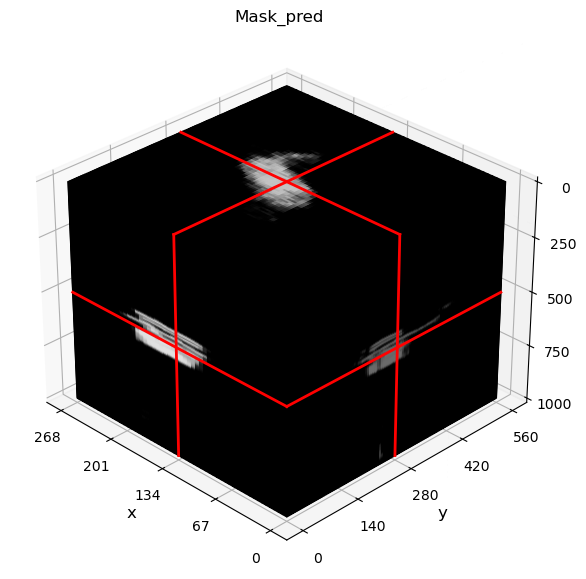

Horizontal slice Artifact above 600 ms for 2010_b01_t10:


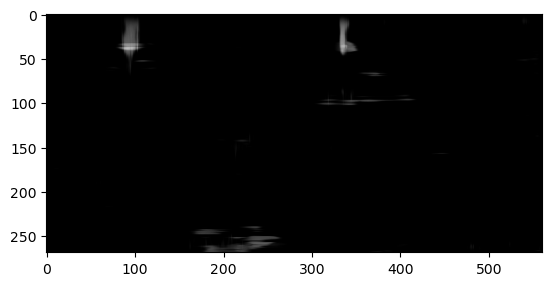

Horizontal slice Artifact below 1200 ms for 2010_b01_t10:


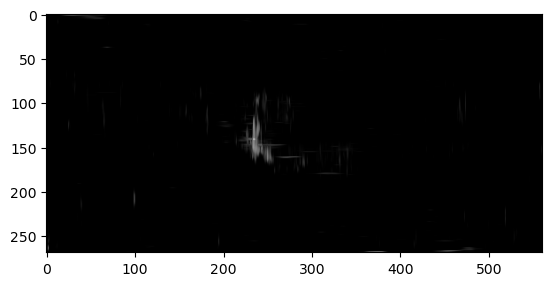

Inline assemble No. 134 for 2010_b01_t10:


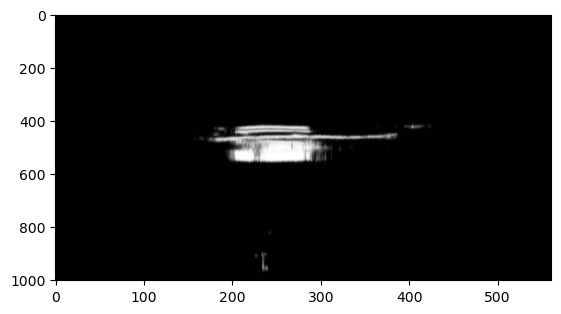

Reference Inline assemble No. 134 for 2010_b01_t10:


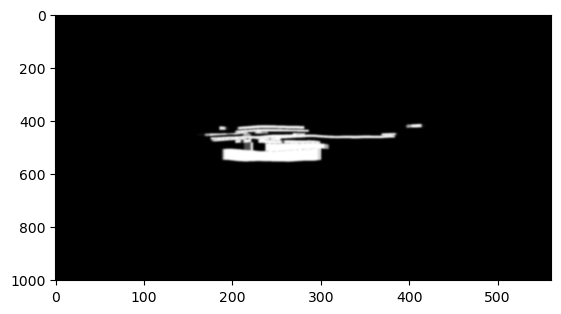

Testing year: 2010_b01_t11
Testing dataset size: 18168
test_id_list for 2010_b01_t11: [ 4542  9084 13626]


<Figure size 640x480 with 0 Axes>

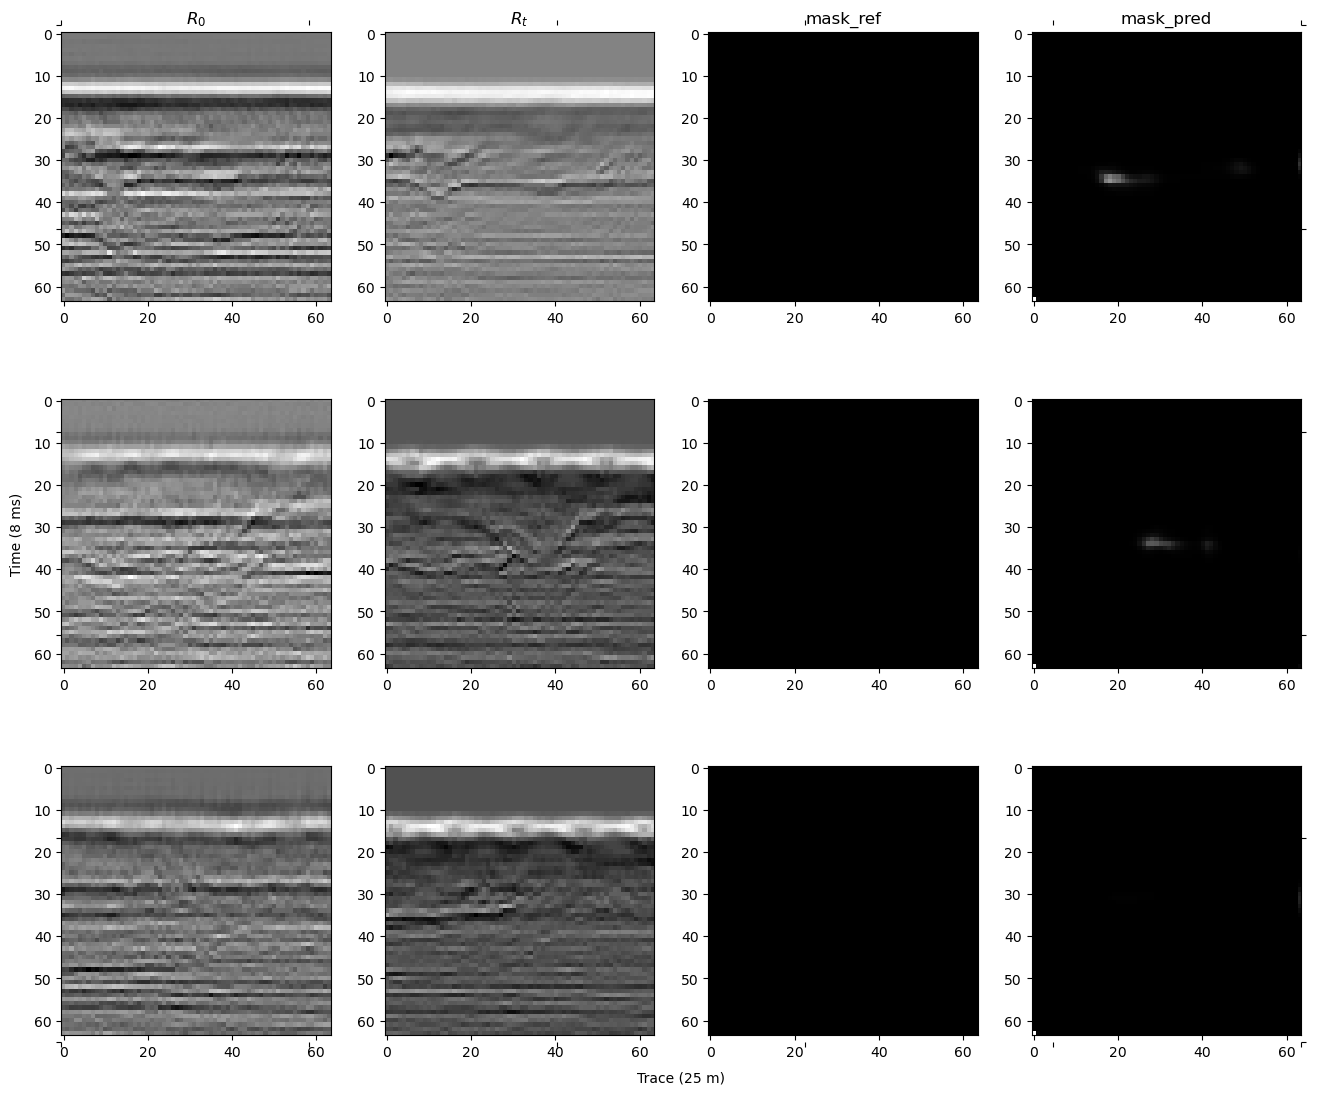

The prediction BCE loss for 2010_b01_t11 is 0.008224455639719963!


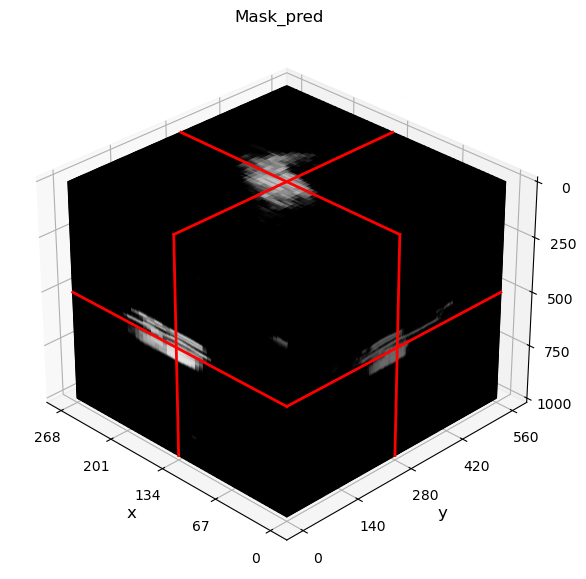

Horizontal slice Artifact above 600 ms for 2010_b01_t11:


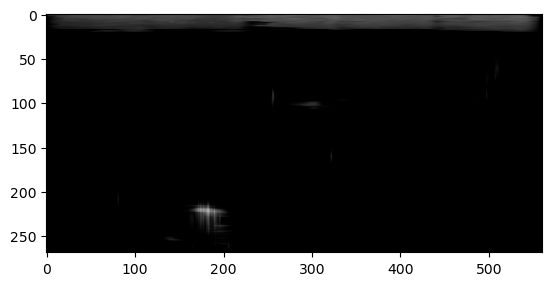

Horizontal slice Artifact below 1200 ms for 2010_b01_t11:


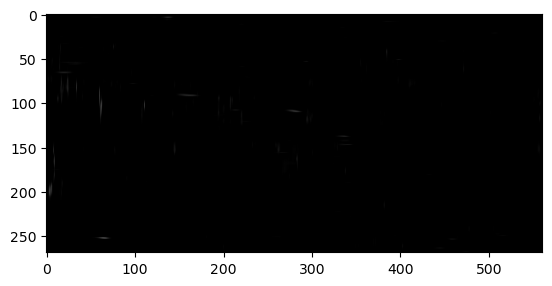

Inline assemble No. 134 for 2010_b01_t11:


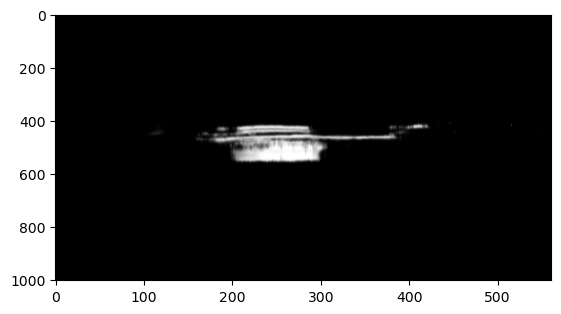

Reference Inline assemble No. 134 for 2010_b01_t11:


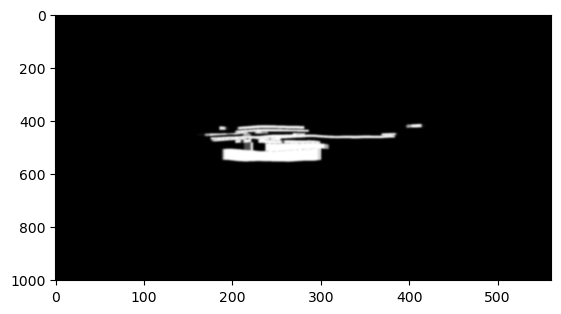

Testing year: 2010_b10_t10
Testing dataset size: 18168
test_id_list for 2010_b10_t10: [ 4542  9084 13626]


<Figure size 640x480 with 0 Axes>

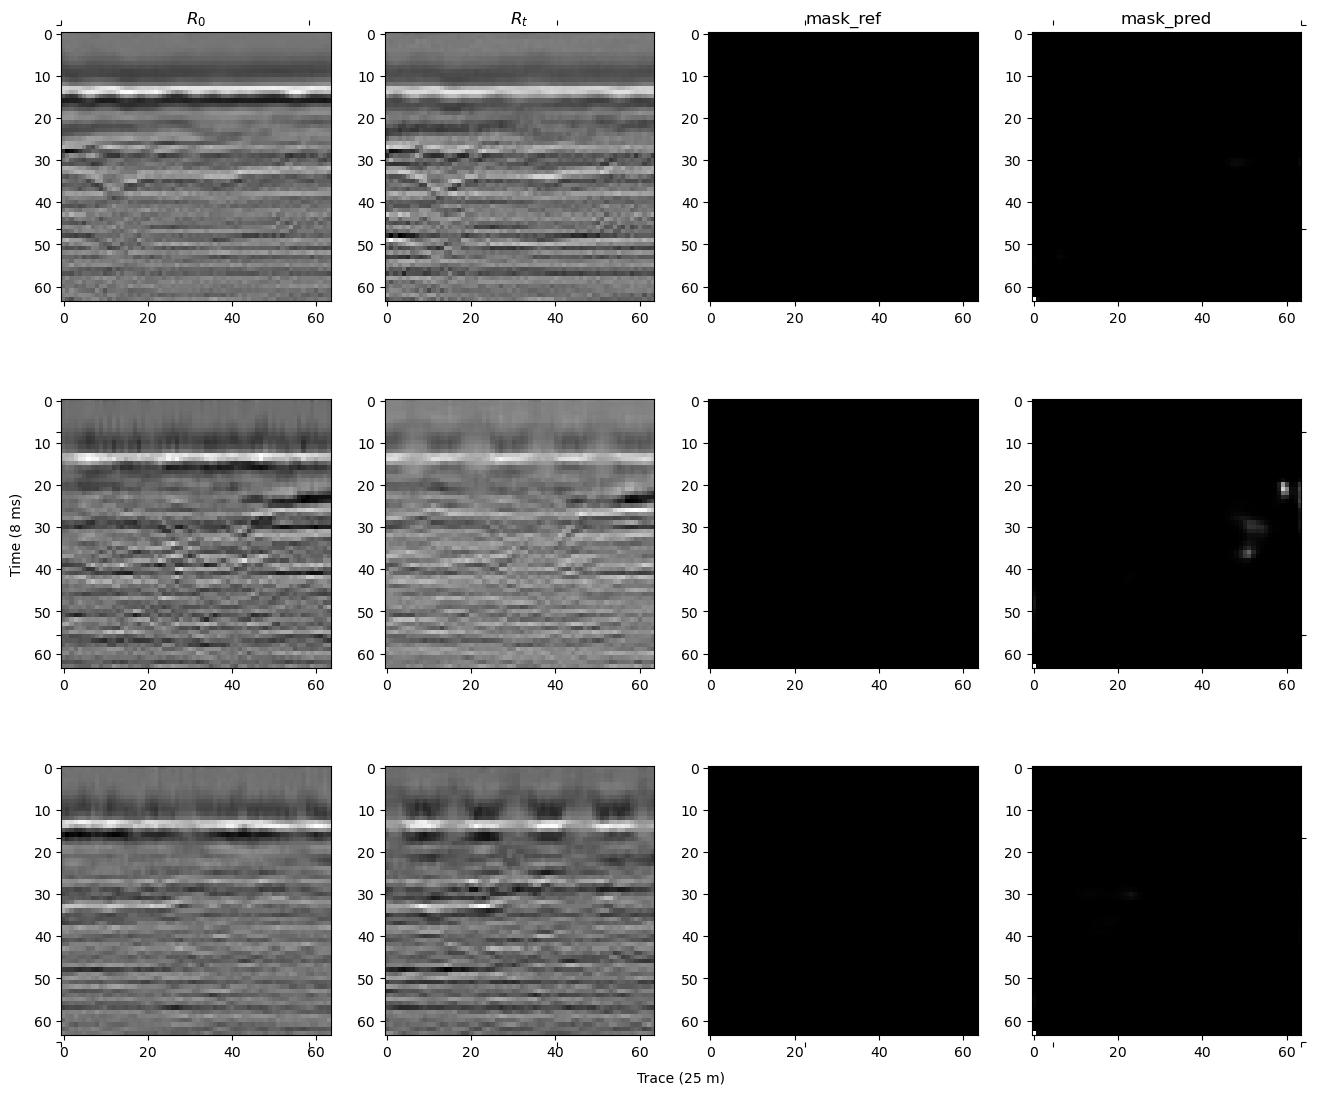

The prediction BCE loss for 2010_b10_t10 is 0.007211277261376381!


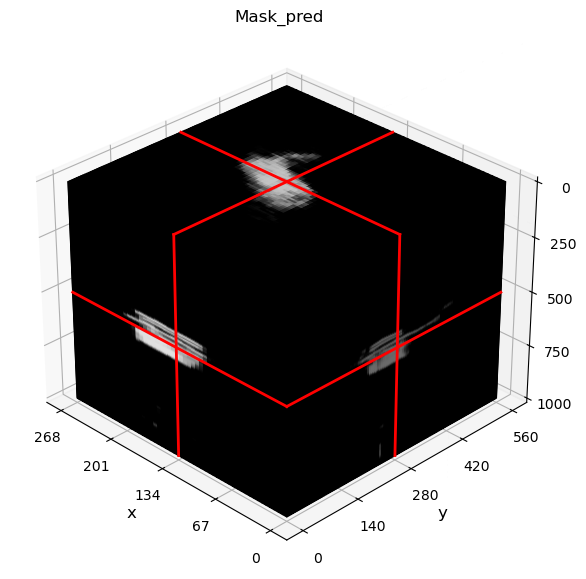

Horizontal slice Artifact above 600 ms for 2010_b10_t10:


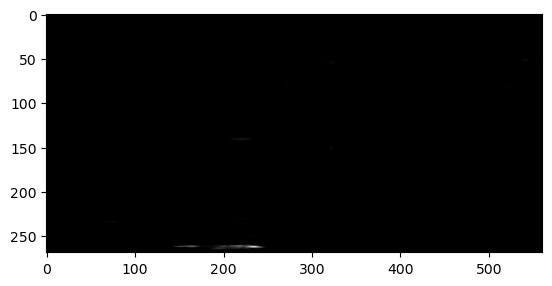

Horizontal slice Artifact below 1200 ms for 2010_b10_t10:


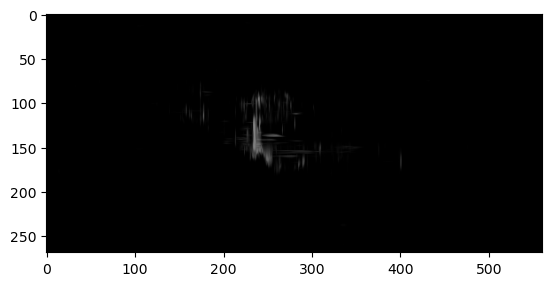

Inline assemble No. 134 for 2010_b10_t10:


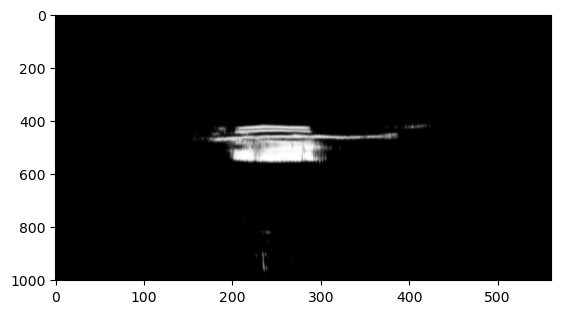

Reference Inline assemble No. 134 for 2010_b10_t10:


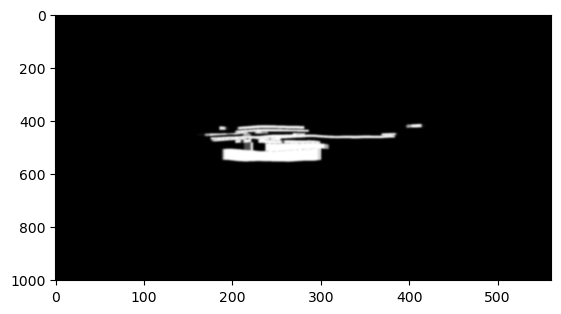

Testing year: 2010_b10_t11
Testing dataset size: 18168
test_id_list for 2010_b10_t11: [ 4542  9084 13626]


<Figure size 640x480 with 0 Axes>

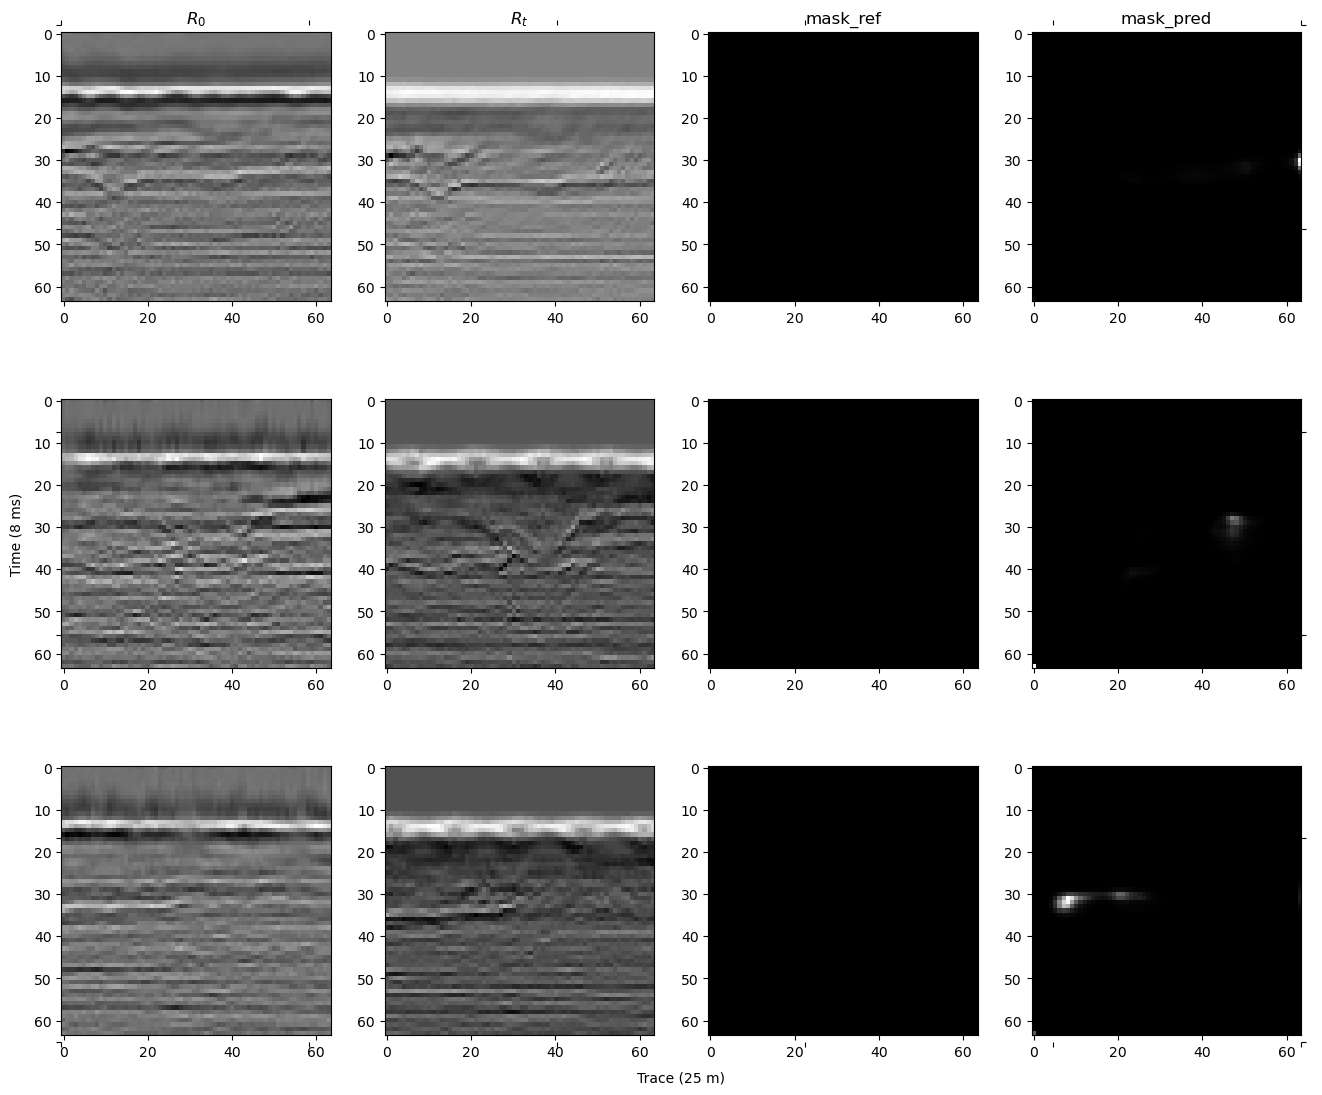

The prediction BCE loss for 2010_b10_t11 is 0.008195105008780956!


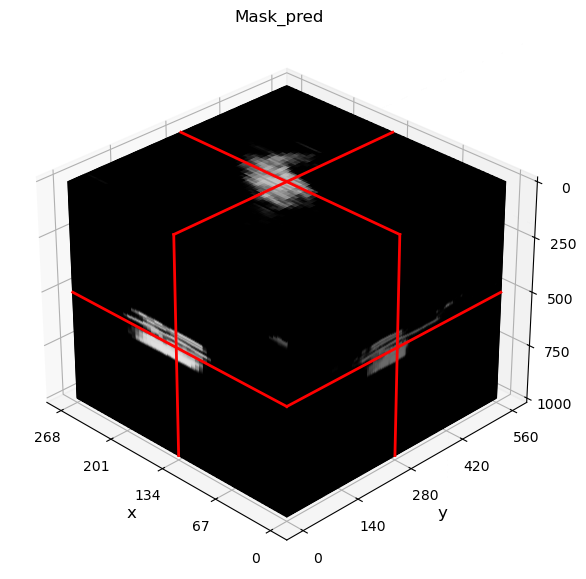

Horizontal slice Artifact above 600 ms for 2010_b10_t11:


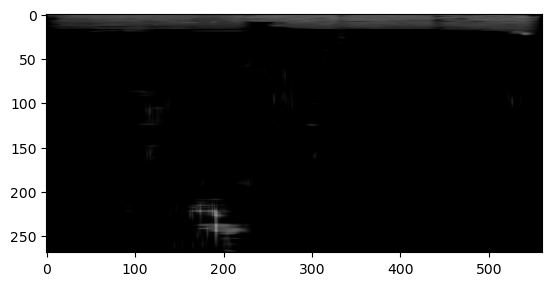

Horizontal slice Artifact below 1200 ms for 2010_b10_t11:


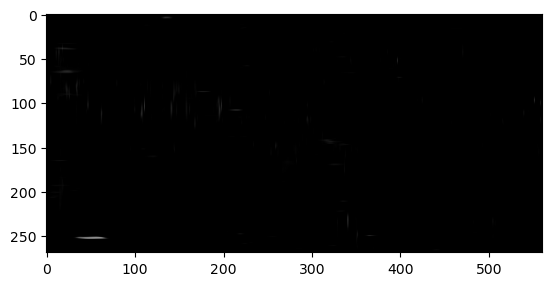

Inline assemble No. 134 for 2010_b10_t11:


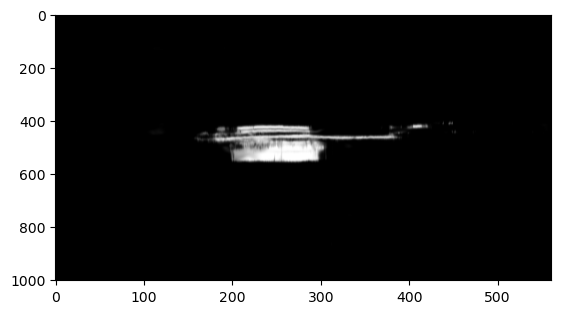

Reference Inline assemble No. 134 for 2010_b10_t11:


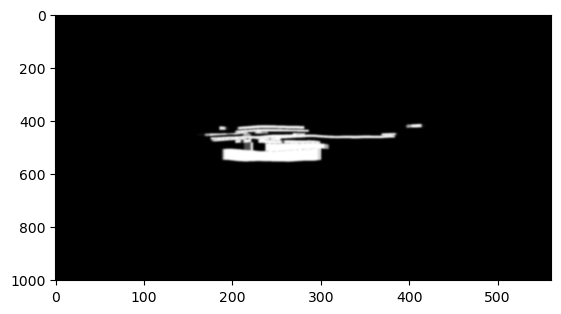

In [27]:
for year in yearlist:
    print(f'Testing year: {year}')
    # load test dataset
    root_test = f'{testpath}/{year}/test'
    if year[:4] == '2010':
        maskyear = True
    else:
        maskyear = False
    test = dataset_patch(root_test,pmf,pdf,mask=maskyear)
    Ntest = len(test)
    print(f'Testing dataset size: {Ntest}')
    # define the sampled patches in test dataset for display
    #test_id_list = np.random.choice(len(test),size=ndis_ts,replace=False)
    test_id_list = np.linspace(0,Ntest,ndis_ts+2,dtype=np.int16)[1:-1]
    pss = patch_show(test,test_id_list)
    print(f'test_id_list for {year}: {test_id_list}')
    
    # display the test patches
    #pss.view2d()
    
    # patch size
    rs = test.nsz
    # loop through different batches in testing dataset
    loader_test = DataLoader(
         test
        ,batch_size = bs
        ,drop_last = False)
    # allocate memory for testing batches
    Tepred = np.zeros((ndis_ts,rs[0],rs[1]))
    teMasks = torch.zeros((Ntest,1,rs[0],rs[1]),dtype=torch.float32)
    Np = 0 # current accumulative number of patches
    for batch in loader_test:
        if test.mask:
            R0t, _, idx = batch
        else:
            R0t, idx = batch
        # copy cpu data on GPU
        if cuda_gpu:
            R0t = R0t.cuda()
        # forward modeling
        bs = len(idx)
        Np += bs
        # find the indices of sampled testing patches in current batch for later display
        Idx = idx.tolist()
        cp = findtrace(test_id_list,Idx)
        # forward modeling
        with torch.no_grad():
            pMask = networktest(R0t)
        # record the sampled testing patches for later display
        for c,p in cp:
            Tepred[c] = pMask[p][0].cpu().detach().numpy()
        # save pMask for final combination
        teMasks[Np-bs:Np] = pMask.detach()

    # display the sampled patch fitting in validating dataset
    pss.view2d(Tepred)
    # combine pMask
    teMasks = teMasks.squeeze()
    pMask_cb = patch_combine_2D(teMasks,test,ixswitch=8070)
    # save pMask
    pMask_cb.tofile(f'{root_test}/tsMask.dat')
    teMasks.numpy().tofile(f'{root_test}/ts_patchMask.dat')
    if year[:4] == '2010':
        # calculate BCE loss for 2010 data
        pMask_cb[pMask_cb>1.0] = 1.0
        tmp = F.binary_cross_entropy(torch.tensor(pMask_cb),torch.tensor(masks))
        np.array(tmp).tofile(f'{root_test}/BCE_loss.dat')
        print(f'The prediction BCE loss for {year} is {tmp}!')
    # display the combined prediction in 3D
    fig = plt.figure(figsize=(9,7))
    ax = fig.add_subplot(1,1,1,projection='3d')
    _ = show3D(pMask_cb,ax=ax,xyzi=(test.DD[0]//2,test.DD[1]//2,test.DD[2]//2),
               clim=[0,1],rcstride=(5,5),tl=f'Mask_pred')
    plt.show()
    # display the combined prediction in slices
    print(f'Horizontal slice Artifact above 600 ms for {year}:')
    plt.imshow(np.max(pMask_cb[:,:,:300],axis=2),vmin=0,vmax=1,aspect=1,cmap='gray')
    plt.show()
    print(f'Horizontal slice Artifact below 1200 ms for {year}:')
    plt.imshow(np.max(pMask_cb[:,:,600:],axis=2),vmin=0,vmax=1,aspect=1,cmap='gray')
    plt.show()
    print(f'Inline assemble No. 134 for {year}:')
    plt.imshow(pMask_cb[134,:,:].T,vmin=0,vmax=1,aspect=0.3,cmap='gray')
    plt.show()
    if year[:4] == '2010':
        print(f'Reference Inline assemble No. 134 for {year}:')
        plt.imshow(masks[134,:,:].T,vmin=0,vmax=1,aspect=0.3,cmap='gray')
        plt.show()